In [5]:
pip install ipython

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [2]:
#autoreload all the modules (no need to rerun the module importation statement to implement the changes)
%load_ext autoreload
%autoreload 2

In [3]:
import glob
import pandas as pd

#beacuse of k-nn
from warnings import simplefilter
simplefilter(action='ignore', category = FutureWarning)

#Numpy version check
import numpy as np
np.__version__
#delete the comment before pip if the version is not 1.21.4
#pip install --upgrade numpy==1.21.4 --user

'1.21.4'

In [6]:
from Modules import data_manipulation_module as dmm 

In [7]:
#Saving the files names
KT_csv_files = glob.glob('/tf/notebooks/DatasCSV/KT/*.csv')
NP_csv_files = glob.glob('/tf/notebooks/DatasCSV/NP/*.csv')
SU_csv_files = glob.glob('/tf/notebooks/DatasCSV/SU/*.csv')

KT_csv_files = sorted(KT_csv_files)
NP_csv_files = sorted(NP_csv_files)
SU_csv_files = sorted(SU_csv_files)

In [8]:
#Loading the datas into dataframes
KT_df_list = []
NP_df_list = []
SU_df_list = []

#Append_dataframe(csv_files, df_list)
dmm.Append_dataframe(KT_csv_files, KT_df_list)
dmm.Append_dataframe(NP_csv_files, NP_df_list)
dmm.Append_dataframe(SU_csv_files, SU_df_list)

In [9]:
NP_df_list[0]

,Left_MTM_pos_x,Left_MTM_pos_y,Left_MTM_pos_z,Left_MTM_rotM_1,Left_MTM_rotM_2,Left_MTM_rotM_3,Left_MTM_rotM_4,Left_MTM_rotM_5,Left_MTM_rotM_6,Left_MTM_rotM_7,...,PSM2_rotM_7,PSM2_rotM_8,PSM2_rotM_9,PSM2_linV_x,PSM2_linV_y,PSM2_linV_z,PSM2_rotV_alpha,PSM2_rotV_beta,PSM2_rotV_gamma,PSM2_gripper_angleV
0,0.118529,-0.015860,0.367277,0.482652,-0.326916,-0.812538,0.642312,0.762788,0.074571,0.594823,...,-0.583559,0.578939,0.569462,-0.013975,-0.002687,0.006508,-0.021289,-0.230186,0.452584,-1.198475
1,0.117837,-0.016283,0.367878,0.470070,-0.331100,-0.818200,0.649242,0.757665,0.066332,0.597381,...,-0.585849,0.583027,0.562902,-0.006929,-0.003082,0.006237,-0.019702,-0.142757,0.343896,-1.202884
2,0.117591,-0.016579,0.368282,0.464992,-0.333945,-0.819944,0.652489,0.755208,0.062384,0.597824,...,-0.586203,0.584588,0.560911,-0.007013,-0.007571,0.011385,-0.058685,-0.138019,0.321906,-1.201741
3,0.117164,-0.017204,0.369130,0.457999,-0.337982,-0.822223,0.657503,0.751245,0.057376,0.597736,...,-0.586036,0.587470,0.558068,-0.000156,-0.008891,0.010383,-0.064197,-0.068266,0.171226,-1.198312
4,0.116830,-0.017850,0.369779,0.457318,-0.342555,-0.820707,0.656666,0.752381,0.051810,0.599175,...,-0.587479,0.583116,0.561108,-0.000627,-0.011057,0.008655,-0.058588,0.077483,-0.011222,-1.195536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3433,0.142431,-0.019635,0.426738,0.857629,-0.247396,-0.450902,0.299046,0.953128,0.045724,0.417392,...,-0.417144,0.192595,0.888198,-0.000274,-0.002466,-0.001380,-2.250799,1.036829,4.962650,-0.540414
3434,0.142378,-0.019676,0.426621,0.861480,-0.264215,-0.433691,0.312973,0.948748,0.043565,0.398884,...,-0.397702,0.195262,0.896495,-0.000363,0.001951,-0.006721,0.063972,0.508576,-0.221638,-0.391330
3435,0.142191,-0.019512,0.425955,0.863868,-0.297715,-0.406378,0.342397,0.938687,0.040040,0.368470,...,-0.365923,0.194084,0.910181,-0.000650,-0.000191,-0.007957,0.166514,0.675894,-0.078584,-0.081241
3436,0.142137,-0.019330,0.425178,0.871721,-0.299333,-0.388004,0.338906,0.940116,0.036006,0.352910,...,-0.350691,0.183105,0.918415,-0.000539,0.005146,-0.012726,0.200262,0.397835,-0.071289,0.174962


In [10]:
#Reading the target variables
KT_class = pd.read_csv('/tf/notebooks/Class/meta_file_Knot_Tying.txt', sep = " ")
NP_class = pd.read_csv('/tf/notebooks/Class/meta_file_Needle_Passing.txt', sep = " ")
SU_class = pd.read_csv('/tf/notebooks/Class/meta_file_Suturing.txt', sep = " ")

In [11]:
NP_class

,file,Experience,GRS,OSATS_1,OSATS_2,OSATS_3,OSATS_4,OSATS_5,OSATS_6
0,Needle_Passing_B001,N,8,1,1,1,2,1,2
1,Needle_Passing_B002,N,8,1,1,1,2,1,2
2,Needle_Passing_B003,N,14,2,2,2,3,2,3
3,Needle_Passing_B004,N,19,3,3,3,4,3,3
4,Needle_Passing_C001,I,11,1,2,1,3,2,2
5,Needle_Passing_C002,I,9,1,1,1,3,1,2
6,Needle_Passing_C003,I,7,1,1,1,2,1,1
7,Needle_Passing_C004,I,12,1,2,1,3,2,3
8,Needle_Passing_C005,I,12,1,2,1,3,2,3
9,Needle_Passing_D001,E,9,1,1,1,2,1,3


In [12]:
#Selecting the GRS as the target variable
#If the GRS score is below 16 (with a maximum possible score of 30), the participant is classified as 0, indicating the novice class
#Conversely, a score of 16 or higher results in a classification of 1, indicating the expert class
KT_class["GRS"] = np.where(KT_class["GRS"] < 16, 0, 1)
NP_class["GRS"] = np.where(NP_class["GRS"] < 16, 0, 1)
SU_class["GRS"] = np.where(SU_class["GRS"] < 16, 0, 1)

In [13]:
NP_class

,file,Experience,GRS,OSATS_1,OSATS_2,OSATS_3,OSATS_4,OSATS_5,OSATS_6
0,Needle_Passing_B001,N,0,1,1,1,2,1,2
1,Needle_Passing_B002,N,0,1,1,1,2,1,2
2,Needle_Passing_B003,N,0,2,2,2,3,2,3
3,Needle_Passing_B004,N,1,3,3,3,4,3,3
4,Needle_Passing_C001,I,0,1,2,1,3,2,2
5,Needle_Passing_C002,I,0,1,1,1,3,1,2
6,Needle_Passing_C003,I,0,1,1,1,2,1,1
7,Needle_Passing_C004,I,0,1,2,1,3,2,3
8,Needle_Passing_C005,I,0,1,2,1,3,2,3
9,Needle_Passing_D001,E,0,1,1,1,2,1,3


In [ ]:
##################################################### ApEn #####################################################################

In [ ]:
#The data transformation is necessary because DT, LR, SVM, and k-NN are not inherently capable of handling time series data.

In [14]:
pip install antropy

You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [15]:
import antropy as ant

In [16]:
#Copying the header from the previous dataframes and using this dataframe to create the new dataframes for storing non-time series datas
header = []
for col in NP_df_list[0].columns:
    header.append(col)
    
NP_ApEn = pd.DataFrame(columns = header)
KT_ApEn = pd.DataFrame(columns = header)
SU_ApEn = pd.DataFrame(columns = header)

In [17]:
NP_ApEn

,Left_MTM_pos_x,Left_MTM_pos_y,Left_MTM_pos_z,Left_MTM_rotM_1,Left_MTM_rotM_2,Left_MTM_rotM_3,Left_MTM_rotM_4,Left_MTM_rotM_5,Left_MTM_rotM_6,Left_MTM_rotM_7,...,PSM2_rotM_7,PSM2_rotM_8,PSM2_rotM_9,PSM2_linV_x,PSM2_linV_y,PSM2_linV_z,PSM2_rotV_alpha,PSM2_rotV_beta,PSM2_rotV_gamma,PSM2_gripper_angleV


In [18]:
#This may require a considerable amount of time to execute.
#Approximate_entropy(df_list, return_ApEn)
NP_ApEn = dmm.Approximate_entropy(NP_df_list, NP_ApEn)
KT_ApEn = dmm.Approximate_entropy(KT_df_list, KT_ApEn)
SU_ApEn = dmm.Approximate_entropy(SU_df_list, SU_ApEn)

In [19]:
NP_ApEn

,Left_MTM_pos_x,Left_MTM_pos_y,Left_MTM_pos_z,Left_MTM_rotM_1,Left_MTM_rotM_2,Left_MTM_rotM_3,Left_MTM_rotM_4,Left_MTM_rotM_5,Left_MTM_rotM_6,Left_MTM_rotM_7,...,PSM2_rotM_7,PSM2_rotM_8,PSM2_rotM_9,PSM2_linV_x,PSM2_linV_y,PSM2_linV_z,PSM2_rotV_alpha,PSM2_rotV_beta,PSM2_rotV_gamma,PSM2_gripper_angleV
0,0.021581,0.062559,0.053012,0.092588,0.062895,0.068726,0.059909,0.088228,0.081238,0.066128,...,0.065488,0.075070,0.059681,0.732999,1.208920,0.904717,0.616807,0.738739,0.724599,0.085272
1,0.018301,0.048855,0.066997,0.081292,0.049594,0.058125,0.081853,0.125634,0.041325,0.068509,...,0.072184,0.109265,0.048677,0.805213,1.393819,1.021814,0.661695,0.826756,0.850841,0.092814
2,0.017062,0.034285,0.050091,0.090927,0.042602,0.044813,0.059407,0.065024,0.041050,0.057862,...,0.058468,0.079402,0.045094,0.666166,1.156758,0.878582,0.591494,0.704599,0.722512,0.074574
3,0.016960,0.035250,0.052214,0.068528,0.043870,0.043340,0.057483,0.080129,0.054492,0.058163,...,0.064207,0.080209,0.043045,0.661404,1.200872,0.919277,0.583398,0.827422,0.858693,0.091654
4,0.045285,0.108991,0.078415,0.100494,0.109792,0.101714,0.099112,0.112471,0.126343,0.110857,...,0.110809,0.118512,0.097439,0.780823,0.985863,0.896066,0.661680,0.763072,0.822013,0.177383
5,0.038617,0.088400,0.087747,0.129408,0.129907,0.071676,0.169942,0.112923,0.134438,0.095495,...,0.092128,0.161128,0.117518,0.827321,0.938197,0.953662,0.646297,0.793605,0.747914,0.153384
6,0.055420,0.108276,0.102436,0.116066,0.130886,0.103499,0.128211,0.114363,0.124599,0.109815,...,0.106301,0.137893,0.129720,0.901021,1.159424,1.002441,0.729317,0.892801,0.921744,0.176688
7,0.042135,0.117298,0.098930,0.118714,0.184580,0.116713,0.152339,0.195153,0.176316,0.189251,...,0.182332,0.224687,0.151644,0.874065,1.067392,0.985414,0.785635,0.940112,0.833762,0.177122
8,0.035933,0.095180,0.098367,0.137302,0.138604,0.117165,0.184623,0.200175,0.147337,0.149167,...,0.142568,0.237896,0.105356,0.856949,1.040684,0.922642,0.685228,0.804335,0.800947,0.137511
9,0.028763,0.109362,0.092713,0.041033,0.087670,0.057467,0.090280,0.118648,0.051785,0.067198,...,0.063516,0.104758,0.050572,0.697475,0.986123,0.826972,0.557129,0.754630,0.730662,0.182707


In [20]:
#Appending the target variables to the data
#Target_append(df_class, return_ApEn)
NP_ApEn = dmm.Target_append(NP_class, NP_ApEn)
KT_ApEn = dmm.Target_append(KT_class, KT_ApEn)
SU_ApEn = dmm.Target_append(SU_class, SU_ApEn)

In [21]:
NP_ApEn

,Left_MTM_pos_x,Left_MTM_pos_y,Left_MTM_pos_z,Left_MTM_rotM_1,Left_MTM_rotM_2,Left_MTM_rotM_3,Left_MTM_rotM_4,Left_MTM_rotM_5,Left_MTM_rotM_6,Left_MTM_rotM_7,...,PSM2_rotM_8,PSM2_rotM_9,PSM2_linV_x,PSM2_linV_y,PSM2_linV_z,PSM2_rotV_alpha,PSM2_rotV_beta,PSM2_rotV_gamma,PSM2_gripper_angleV,GRS
0,0.021581,0.062559,0.053012,0.092588,0.062895,0.068726,0.059909,0.088228,0.081238,0.066128,...,0.075070,0.059681,0.732999,1.208920,0.904717,0.616807,0.738739,0.724599,0.085272,0
1,0.018301,0.048855,0.066997,0.081292,0.049594,0.058125,0.081853,0.125634,0.041325,0.068509,...,0.109265,0.048677,0.805213,1.393819,1.021814,0.661695,0.826756,0.850841,0.092814,0
2,0.017062,0.034285,0.050091,0.090927,0.042602,0.044813,0.059407,0.065024,0.041050,0.057862,...,0.079402,0.045094,0.666166,1.156758,0.878582,0.591494,0.704599,0.722512,0.074574,0
3,0.016960,0.035250,0.052214,0.068528,0.043870,0.043340,0.057483,0.080129,0.054492,0.058163,...,0.080209,0.043045,0.661404,1.200872,0.919277,0.583398,0.827422,0.858693,0.091654,1
4,0.045285,0.108991,0.078415,0.100494,0.109792,0.101714,0.099112,0.112471,0.126343,0.110857,...,0.118512,0.097439,0.780823,0.985863,0.896066,0.661680,0.763072,0.822013,0.177383,0
5,0.038617,0.088400,0.087747,0.129408,0.129907,0.071676,0.169942,0.112923,0.134438,0.095495,...,0.161128,0.117518,0.827321,0.938197,0.953662,0.646297,0.793605,0.747914,0.153384,0
6,0.055420,0.108276,0.102436,0.116066,0.130886,0.103499,0.128211,0.114363,0.124599,0.109815,...,0.137893,0.129720,0.901021,1.159424,1.002441,0.729317,0.892801,0.921744,0.176688,0
7,0.042135,0.117298,0.098930,0.118714,0.184580,0.116713,0.152339,0.195153,0.176316,0.189251,...,0.224687,0.151644,0.874065,1.067392,0.985414,0.785635,0.940112,0.833762,0.177122,0
8,0.035933,0.095180,0.098367,0.137302,0.138604,0.117165,0.184623,0.200175,0.147337,0.149167,...,0.237896,0.105356,0.856949,1.040684,0.922642,0.685228,0.804335,0.800947,0.137511,0
9,0.028763,0.109362,0.092713,0.041033,0.087670,0.057467,0.090280,0.118648,0.051785,0.067198,...,0.104758,0.050572,0.697475,0.986123,0.826972,0.557129,0.754630,0.730662,0.182707,0


In [ ]:
################################################### Train-test dataset ####################################################

In [22]:
#Features and target variable
#Features_target(df)
NP_X_ApEn, NP_Y_ApEn = dmm.Features_target(NP_ApEn)
KT_X_ApEn, KT_Y_ApEn = dmm.Features_target(KT_ApEn)
SU_X_ApEn, SU_Y_ApEn = dmm.Features_target(SU_ApEn)

In [23]:
#Train, test set
#0.2 means the test_size (20-80:test-train)
#train_test(X, Y, t_size)
NP_X_train_ApEn, NP_X_test_ApEn, NP_Y_train_ApEn, NP_Y_test_ApEn = dmm.Train_test(NP_X_ApEn, NP_Y_ApEn, 0.2)
KT_X_train_ApEn, KT_X_test_ApEn, KT_Y_train_ApEn, KT_Y_test_ApEn = dmm.Train_test(KT_X_ApEn, KT_Y_ApEn, 0.2)
SU_X_train_ApEn, SU_X_test_ApEn, SU_Y_train_ApEn, SU_Y_test_ApEn = dmm.Train_test(SU_X_ApEn, SU_Y_ApEn, 0.2)

In [ ]:
####################################################### Decision Tree #############################################################

In [138]:
from Modules import decision_tree_module as dtm
from Modules import validation_and_results_module as vrm
from Modules import plots

In [116]:
#Creating the Decision Tree model
#Decision_tree(criterion, splitter, max_depth, max_features)
    #criterion: “gini”, “entropy”, “log_loss”       ; default: "gini"
    #splitter: “best”, “random”                     ; default: "best"
    #max_depth: None, int                           ; default: None
    #max_features: None, int, float, “sqrt”, “log2” ; default: None
NP_DT_model_ApEn = dtm.Decision_tree("entropy", "random", 5, 5)
KT_DT_model_ApEn = dtm.Decision_tree("entropy", "random", 5, 5)
SU_DT_model_ApEn = dtm.Decision_tree("entropy", "random", 5, 5)

In [121]:
#Parameter values that are equal to the default are not displayed, even if they are correctly specified
NP_DT_model_ApEn

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=5,
                       random_state=0, splitter='random')

In [120]:
#Visualizing the classification report of the model
#Model_classification_report(model, X_train, X_test, Y_train, Y_test)
vrm.Model_classification_report(NP_DT_model_ApEn, NP_X_train_ApEn, NP_X_test_ApEn, NP_Y_train_ApEn, NP_Y_test_ApEn)

                 Classification Report
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.50      0.67         2

    accuracy                           0.83         6
   macro avg       0.90      0.75      0.78         6
weighted avg       0.87      0.83      0.81         6



In [119]:
#Checking the results
model = DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features=5, random_state=0, splitter='random')
model.fit(NP_X_train_ApEn, NP_Y_train_ApEn)
model.score(NP_X_test_ApEn, NP_Y_test_ApEn)

0.8333333333333334

In [139]:
#Calculating the accuracy with cross-validation
#Cross_validation(model, X, Y, cv)
#cv: int, "LOOCV"
NP_DT_model_cv_ApEn = vrm.Cross_validation(NP_DT_model_ApEn, NP_X_ApEn, NP_Y_ApEn, 20)
NP_DT_model_cv_ApEn

'The specified cv value is too big! The maximum cv value: 9'

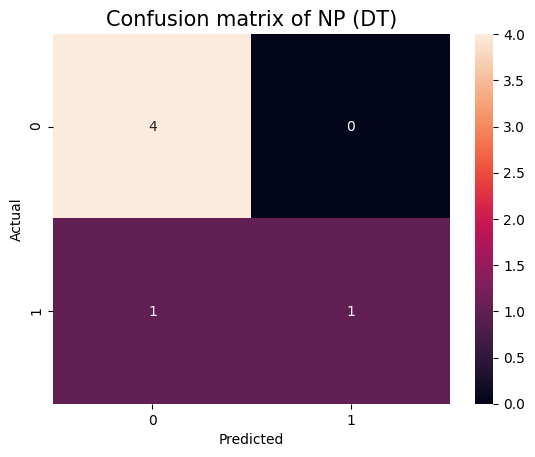

In [145]:
#Plotting the confusion matrix
#Confusion_matrix(Y_test, y_pred, title)
plots.Confusion_matrix("Confusion matrix of NP (DT)", NP_DT_model_ApEn, NP_X_train_ApEn, NP_X_test_ApEn, NP_Y_train_ApEn, NP_Y_test_ApEn)

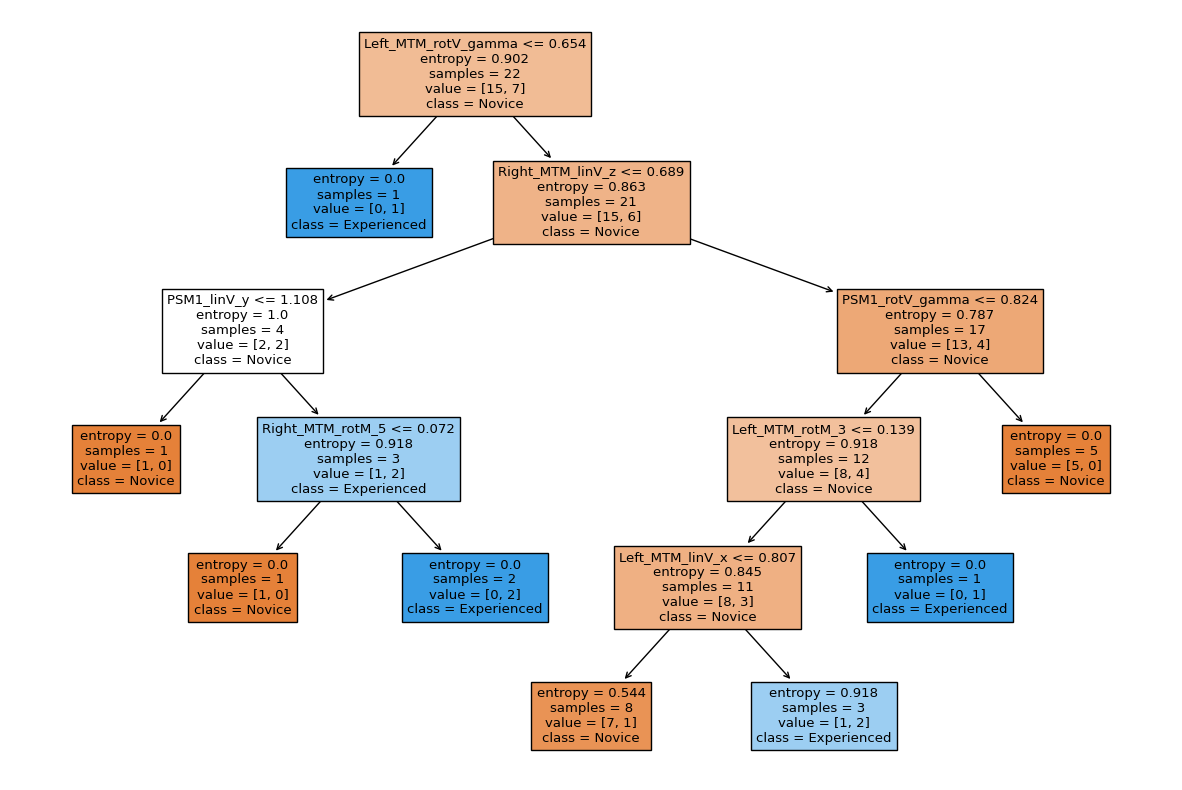

In [151]:
#Visualizing the Decision Tree model
#Decision_tree_visualization(model, header)
dtm.Decision_tree_visualization(NP_DT_model_ApEn, header)

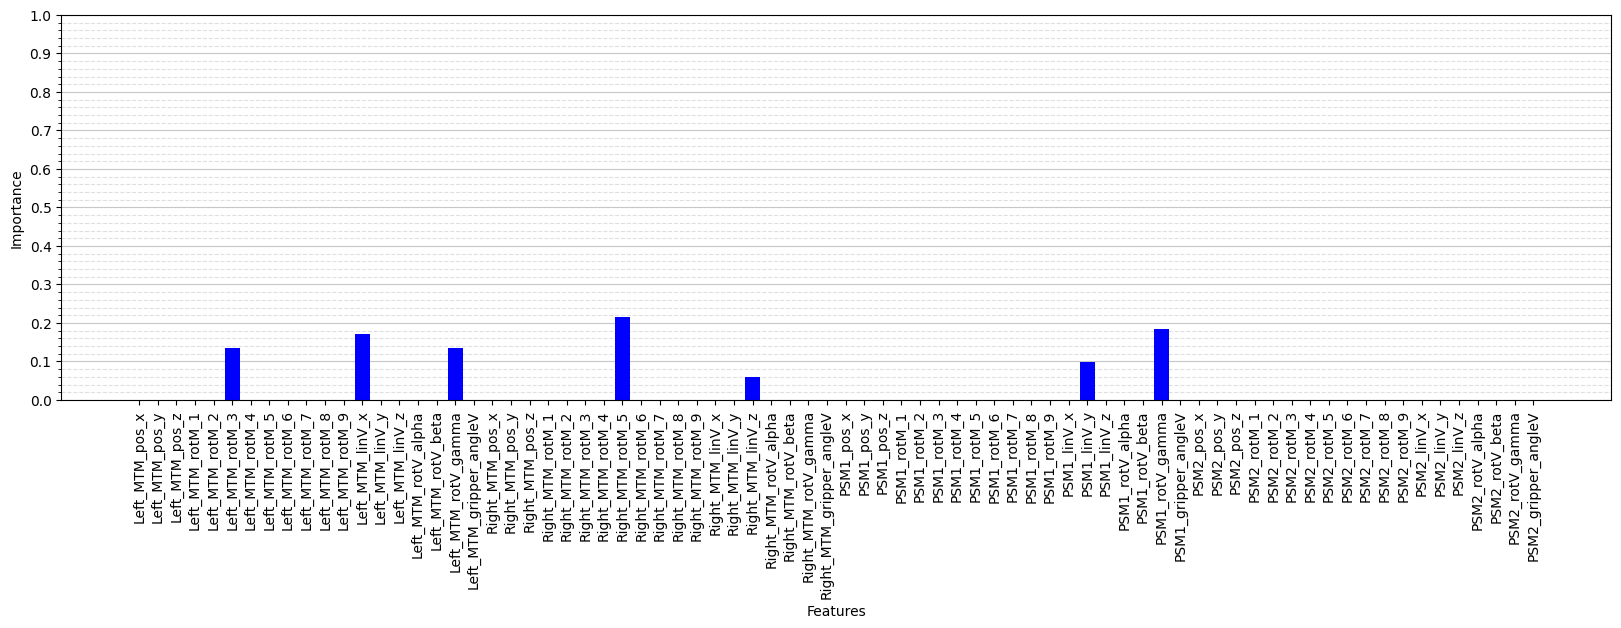

In [154]:
#Calculating the features importance of the DT model
#Decision_tree_feature_importance(model, color, header)
dtm.Decision_tree_feature_importance(NP_DT_model_ApEn, "blue", header)

In [ ]:
#################################################### Logistic Regression ##########################################################

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
def Logistic_regression(X, Y, X_train, X_test, Y_train, Y_test):
    LogR_model = LogisticRegression(random_state = 0)
    
    LogR_model.fit(X_train, Y_train)

    y_pred = LogR_model.predict(X_test)
    
    accuracy, kf_score_mean, loocv_score_mean = Validation(LogR_model, y_pred, X, Y, Y_test)
    
    return LogR_model, y_pred, accuracy, kf_score_mean, loocv_score_mean

In [66]:
NP_LogR_model_ApEn, NP_LogR_y_pred_ApEn, \
NP_LogR_accuracy_ApEn, NP_LogR_kf_ApEn, NP_LogR_loocv_ApEn = \
    Logistic_regression(NP_X_ApEn, NP_Y_ApEn, NP_X_train_ApEn, NP_X_test_ApEn, NP_Y_train_ApEn, NP_Y_test_ApEn)

KT_LogR_model_ApEn, KT_LogR_y_pred_ApEn, \
KT_LogR_accuracy_ApEn, KT_LogR_kf_ApEn, KT_LogR_loocv_ApEn = \
    Logistic_regression(KT_X_ApEn, KT_Y_ApEn, KT_X_train_ApEn, KT_X_test_ApEn, KT_Y_train_ApEn, KT_Y_test_ApEn)

SU_LogR_model_ApEn, SU_LogR_y_pred_ApEn, \
SU_LogR_accuracy_ApEn, SU_LogR_kf_ApEn, SU_LogR_loocv_ApEn = \
    Logistic_regression(SU_X_ApEn, SU_Y_ApEn, SU_X_train_ApEn, SU_X_test_ApEn, SU_Y_train_ApEn, SU_Y_test_ApEn)

In [67]:
#Results
Results("Logistic Regression:", NP_LogR_accuracy_ApEn, NP_LogR_kf_ApEn, NP_LogR_loocv_ApEn, \
       KT_LogR_accuracy_ApEn, KT_LogR_kf_ApEn, KT_LogR_loocv_ApEn, \
       SU_LogR_accuracy_ApEn, SU_LogR_kf_ApEn, SU_LogR_loocv_ApEn)

Logistic Regression:
	 NP
		 Accuracy: 0.6666666666666666
		 5-fold cross-validation: 0.6799999999999999
		 LOOCV: 0.6785714285714286
	 KT
		 Accuracy: 0.25
		 5-fold cross-validation: 0.6642857142857143
		 LOOCV: 0.7222222222222222
	 SU
		 Accuracy: 0.75
		 5-fold cross-validation: 0.7678571428571429
		 LOOCV: 0.7435897435897436


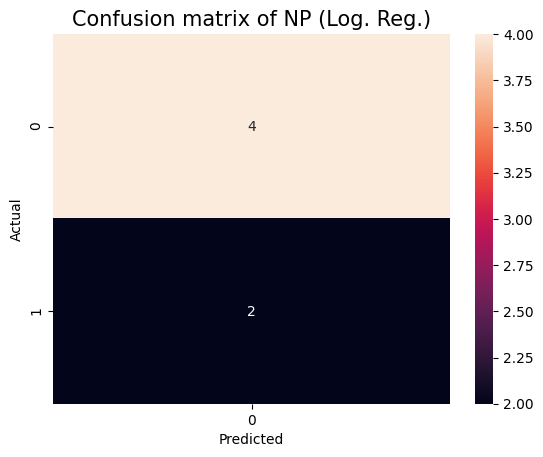

In [68]:
#NP: Confusion matrix
Confusion_matrix(NP_Y_test_ApEn, NP_LogR_y_pred_ApEn, 'Confusion matrix of NP (Log. Reg.)')

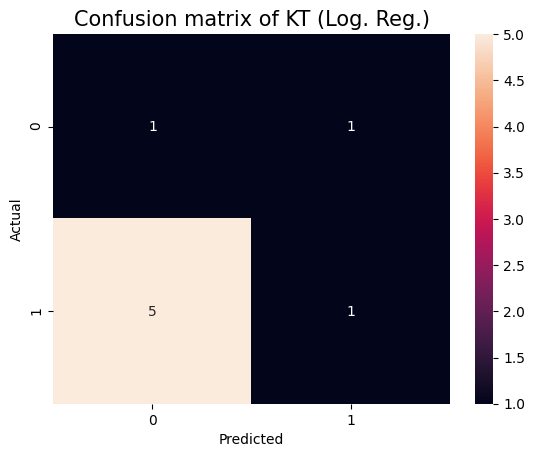

In [69]:
#KT: Confusion matrix
Confusion_matrix(KT_Y_test_ApEn, KT_LogR_y_pred_ApEn, 'Confusion matrix of KT (Log. Reg.)')

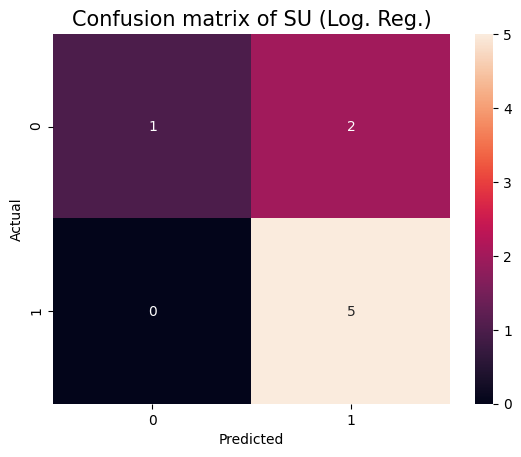

In [70]:
#SU: Confusion matrix
Confusion_matrix(SU_Y_test_ApEn, SU_LogR_y_pred_ApEn, 'Confusion matrix of SU (Log. Reg.)')

In [ ]:
########################################################### k-NN ##################################################################

In [71]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
def kNN(X, Y, X_train, X_test, Y_train, Y_test):
    kNN_model = KNeighborsClassifier(n_neighbors=1)
    
    kNN_model.fit(X_train, Y_train)
    
    y_pred = kNN_model.predict(X_test)
    
    accuracy, kf_score_mean, loocv_score_mean = Validation(kNN_model, y_pred, X, Y, Y_test)
    
    return kNN_model, y_pred,  accuracy, kf_score_mean, loocv_score_mean

In [73]:
NP_kNN_model_ApEn, NP_kNN_y_pred_ApEn, \
NP_kNN_accuracy_ApEn, NP_kNN_kf_ApEn, NP_kNN_loocv_ApEn = \
    kNN(NP_X_ApEn, NP_Y_ApEn, NP_X_train_ApEn, NP_X_test_ApEn, NP_Y_train_ApEn, NP_Y_test_ApEn)

KT_kNN_model_ApEn, KT_kNN_y_pred_ApEn, \
KT_kNN_accuracy_ApEn, KT_kNN_kf_ApEn, KT_kNN_loocv_ApEn = \
    kNN(KT_X_ApEn, KT_Y_ApEn, KT_X_train_ApEn, KT_X_test_ApEn, KT_Y_train_ApEn, KT_Y_test_ApEn)

SU_kNN_model_ApEn, SU_kNN_y_pred_ApEn, \
SU_kNN_accuracy_ApEn, SU_kNN_kf_ApEn, SU_kNN_loocv_ApEn = \
    kNN(SU_X_ApEn, SU_Y_ApEn, SU_X_train_ApEn, SU_X_test_ApEn, SU_Y_train_ApEn, SU_Y_test_ApEn)

In [74]:
Results("k-NN:", NP_kNN_accuracy_ApEn, NP_kNN_kf_ApEn, NP_kNN_loocv_ApEn, \
       KT_kNN_accuracy_ApEn, KT_kNN_kf_ApEn, KT_kNN_loocv_ApEn, \
       SU_kNN_accuracy_ApEn, SU_kNN_kf_ApEn, SU_kNN_loocv_ApEn)

k-NN:
	 NP
		 Accuracy: 0.8333333333333334
		 5-fold cross-validation: 0.6666666666666667
		 LOOCV: 0.7142857142857143
	 KT
		 Accuracy: 0.625
		 5-fold cross-validation: 0.7785714285714287
		 LOOCV: 0.8055555555555556
	 SU
		 Accuracy: 0.875
		 5-fold cross-validation: 0.8178571428571428
		 LOOCV: 0.7948717948717948


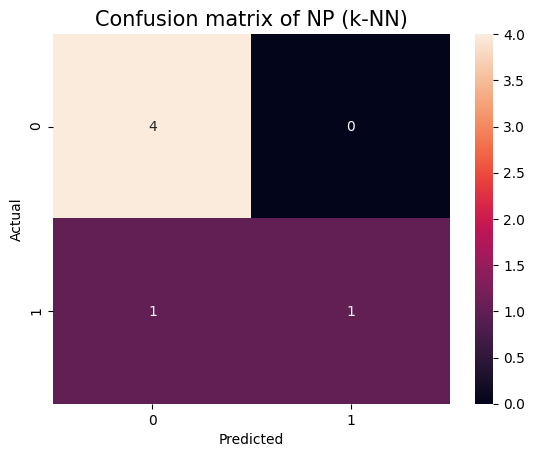

In [75]:
#NP: Confusion matrix
Confusion_matrix(NP_Y_test_ApEn, NP_kNN_y_pred_ApEn, 'Confusion matrix of NP (k-NN)')

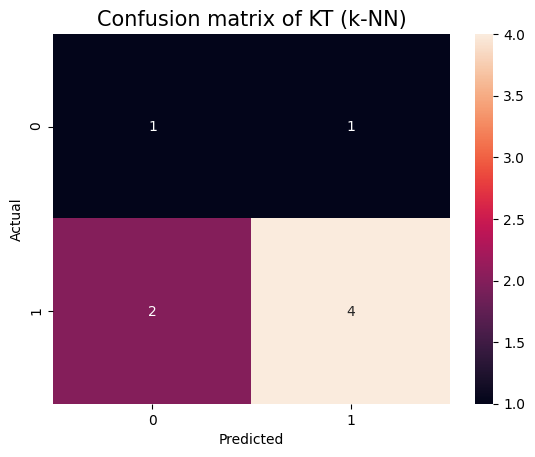

In [76]:
#KT: Confusion matrix
Confusion_matrix(KT_Y_test_ApEn, KT_kNN_y_pred_ApEn, 'Confusion matrix of KT (k-NN)')

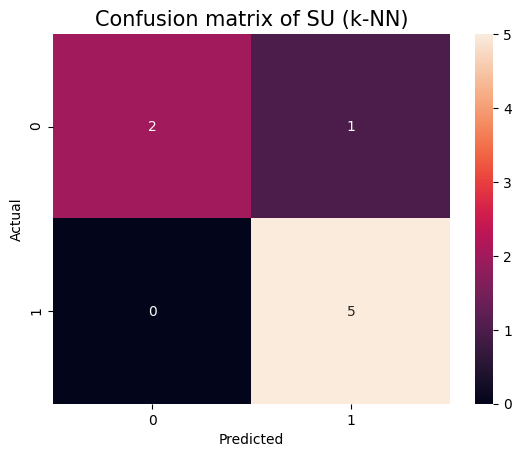

In [77]:
#SU: Confusion matrix
Confusion_matrix(SU_Y_test_ApEn, SU_kNN_y_pred_ApEn, 'Confusion matrix of SU (k-NN)')

In [78]:
#Investigation of different numbers of neighbors
#k: neighbors

def kNN_best_k(X_train, X_test, Y_train, Y_test, X, Y):
    accuracy = []
    kFold = []
    loocv = []

    for k in range(1,10):
        knn_model = KNeighborsClassifier(n_neighbors = k)
    
        knn_model.fit(X_train, Y_train)
    
        y_pred = knn_model.predict(X_test)
        
        accuracy.append(metrics.accuracy_score(Y_test, y_pred))
        kFold.append(cross_val_score(knn_model, X, Y, cv = 5).mean())
        loocv.append(cross_val_score(knn_model, X, Y, cv = LeaveOneOut()).mean())
        
    return accuracy, kFold, loocv

In [79]:
NP_kNN_accuracies_ApEn, NP_kNN_kFolds_ApEn, NP_kNN_loocvs_ApEn = \
    kNN_best_k(NP_X_train_ApEn, NP_X_test_ApEn, NP_Y_train_ApEn, NP_Y_test_ApEn, NP_X_ApEn, NP_Y_ApEn)

In [80]:
def kNN_best_k_plot(accuracies, title):
    plt.grid(which='major', linestyle='-', alpha = 0.7, axis = 'both')
    plt.grid(which='minor', linestyle='--', alpha = 0.4, axis = 'y')
    plt.minorticks_on()
    plt.tick_params('x', which='minor', bottom=False, top=False)
    
    plt.plot(range(1,10), accuracies, color = "blue")
    plt.xticks(range(1,10))
    plt.ylim(0.5, 1.0)
    
    plt.xlabel('Number of neighbors')
    plt.ylabel('Accuracy') 
    plt.title(title, fontsize = 15)

    plt.show()

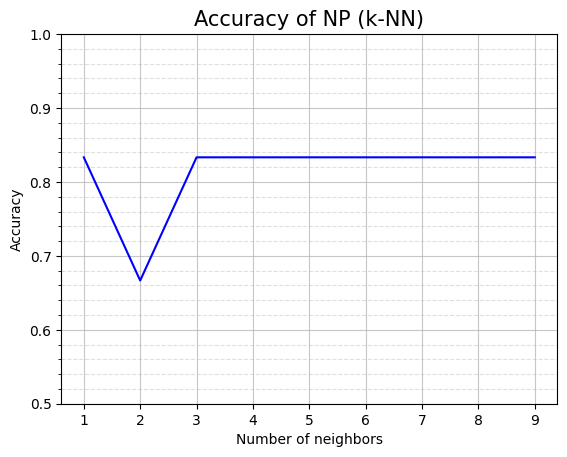

In [81]:
#NP: accuracy
kNN_best_k_plot(NP_kNN_accuracies_ApEn, 'Accuracy of NP (k-NN)')

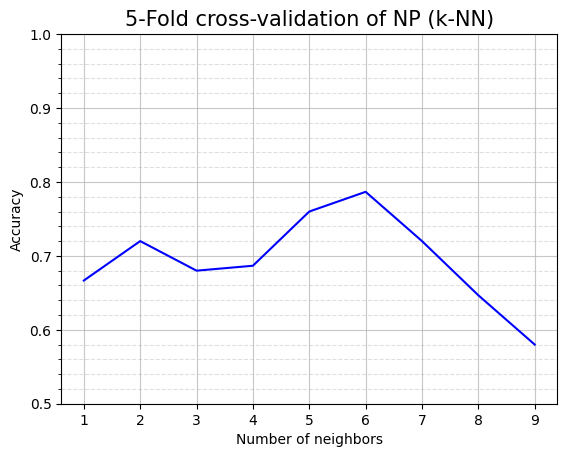

In [82]:
#NP: K-Fold cross-validation
kNN_best_k_plot(NP_kNN_kFolds_ApEn, '5-Fold cross-validation of NP (k-NN)')

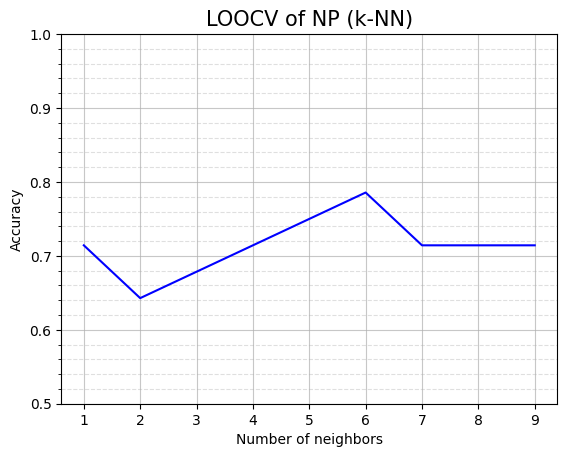

In [83]:
#NP: LOOCV
kNN_best_k_plot(NP_kNN_loocvs_ApEn, 'LOOCV of NP (k-NN)')

In [ ]:
############################################################ SVM ##################################################################

In [84]:
from sklearn import svm

In [85]:
def SVM(X, Y, X_train, X_test, Y_train, Y_test):
    SVM_model = svm.SVC(kernel = 'linear', random_state = 0)
    
    SVM_model.fit(X_train, Y_train)
    
    y_pred = SVM_model.predict(X_test)
    
    accuracy, kf_score_mean, loocv_score_mean = Validation(SVM_model, y_pred, X, Y, Y_test)
    
    return SVM_model, y_pred, accuracy, kf_score_mean, loocv_score_mean

In [86]:
NP_SVM_model_ApEn, NP_SVM_y_pred_ApEn, \
NP_SVM_accuracy_ApEn, NP_SVM_kf_ApEn, NP_SVM_loocv_ApEn = \
    SVM(NP_X_ApEn, NP_Y_ApEn, NP_X_train_ApEn, NP_X_test_ApEn, NP_Y_train_ApEn, NP_Y_test_ApEn)

KT_SVM_model_ApEn, KT_SVM_y_pred_ApEn, \
KT_SVM_accuracy_ApEn, KT_SVM_kf_ApEn, KT_SVM_loocv_ApEn = \
    SVM(KT_X_ApEn, KT_Y_ApEn, KT_X_train_ApEn, KT_X_test_ApEn, KT_Y_train_ApEn, KT_Y_test_ApEn)

SU_SVM_model_ApEn, SU_SVM_y_pred_ApEn, \
SU_SVM_accuracy_ApEn, SU_SVM_kf_ApEn, SU_SVM_loocv_ApEn = \
    SVM(SU_X_ApEn, SU_Y_ApEn, SU_X_train_ApEn, SU_X_test_ApEn, SU_Y_train_ApEn, SU_Y_test_ApEn)

In [87]:
Results("SVM:", NP_SVM_accuracy_ApEn, NP_SVM_kf_ApEn, NP_SVM_loocv_ApEn, \
       KT_SVM_accuracy_ApEn, KT_SVM_kf_ApEn, KT_SVM_loocv_ApEn, \
       SU_SVM_accuracy_ApEn, SU_SVM_kf_ApEn, SU_SVM_loocv_ApEn)

SVM:
	 NP
		 Accuracy: 0.6666666666666666
		 5-fold cross-validation: 0.6799999999999999
		 LOOCV: 0.6785714285714286
	 KT
		 Accuracy: 0.25
		 5-fold cross-validation: 0.7178571428571429
		 LOOCV: 0.75
	 SU
		 Accuracy: 0.75
		 5-fold cross-validation: 0.7428571428571429
		 LOOCV: 0.7692307692307693


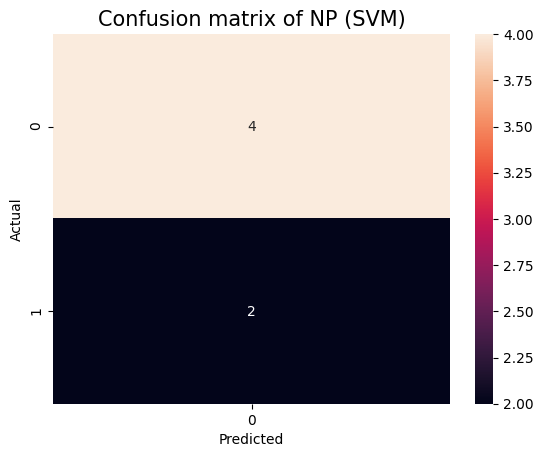

In [88]:
#NP: Confusion matrix
Confusion_matrix(NP_Y_test_ApEn, NP_SVM_y_pred_ApEn, 'Confusion matrix of NP (SVM)')

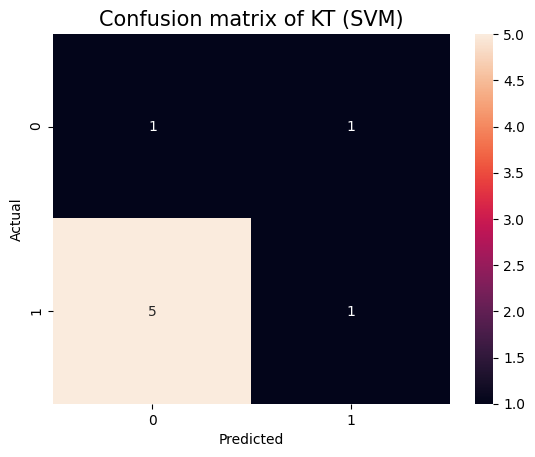

In [89]:
#KT: Confusion matrix
Confusion_matrix(KT_Y_test_ApEn, KT_SVM_y_pred_ApEn, 'Confusion matrix of KT (SVM)')

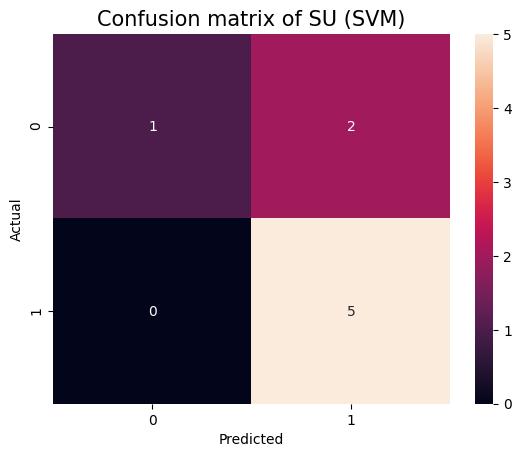

In [90]:
#SU: Confusion matrix
Confusion_matrix(SU_Y_test_ApEn, SU_SVM_y_pred_ApEn, 'Confusion matrix of SU (SVM)')

In [ ]:
############################################# Best accuracy and best parameters ###################################################

In [26]:
from pandas import option_context
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import LeaveOneOut, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier

In [27]:
#Counting the zeros and ones in the target variable. (0, 1 = classes)
def least_populated_class_calculation(Y):
    zero_count = 0
    one_count = 0
    
    for i in Y:
        if(i == 0):
            zero_count = zero_count + 1
        else:
            one_count = one_count + 1
            
    if(zero_count < one_count):
        return zero_count
    else:
        return one_count

In [28]:
#The maximum value for cross-validation (cv) cannot exceed the number of zeros or ones in the target variable.
#Minimum cross-validation value: 2.
def cv_exeption_handling(cv, Y):
    least_populated_class_members = least_populated_class_calculation(Y)
    if(cv > least_populated_class_members):
        print("The specified cv value is too big! The maximum cv value: " + str(least_populated_class_members))
        return "not Ok"
    elif(cv < 2):
        print("The specified cv value is too small! The minimum cv value: 2")
        return "not Ok"
    else:
        return "Ok"

In [29]:
#Setting model parameters.
def set_model_param(Y, cv):
    if(isinstance(cv, int)):
        if(cv_exeption_handling(cv, Y) != "Ok"):
            return None
        else:
            #maximum number of neighbors: 
                #Y size / cv = value
                #if the value is an integer -> Y size - value = max_neighbors
                #if the value not an integer -> Y size - (value + 1) = max_neighbors
            length = len(Y)
            max_neighbors_temp = length / cv

            if((max_neighbors_temp - int(max_neighbors_temp)) == 0.0):
                max_neighbors = int(length - max_neighbors_temp)
            else:
                max_neighbors = length - (int(max_neighbors_temp) + 1)
            
    else:
        #For LOOCV (Leave-One-Out cross-validation), the maximum number of neighbors is (Y size - 1).
        max_neighbors = len(Y) - 1
        
    model = {
        'decision_tree': {
            'model': DecisionTreeClassifier(),
            'params': {
                'criterion':  ['gini', 'entropy'],
                'max_depth':  [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                'max_features': [None, 'sqrt', 'log2', 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                'splitter': ['best', 'random'],
                'random_state': [0]
            }
        },
        'k-NN': {
            'model': KNeighborsClassifier(),
            'params': {
                #+1: to included the last value in the range.
                'n_neighbors' : range(1, max_neighbors + 1),
                'weights' : ['uniform', 'distance'],
                'metric' : ['euclidean', 'manhattan', 'minkowski']
            }
        },
        'SVM': {
            'model': svm.SVC(),
            'params': {
                'C': [1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1],
                'kernel' : ['poly', 'rbf', 'sigmoid', 'linear'],
                'gamma': ['auto', 'scale', 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001],
                'random_state' : [0]
            }
        }
    }
    
    return model

In [30]:
#Setting the solver and penalty for logistic regression.
#The single-element penalty also needs to be a list because GridSearchCV only accepts lists as input.
LogReg_solver_penalty_pairs = {
    'newton-cg': {
        'solver' : ['newton-cg'],
        'penalty' : ['l2']
    },
    'lbfgs': {
        'solver' : ['lbfgs'],
        'penalty' : ['l2']
    },
     'liblinear': {
        'solver' : ['liblinear'],
        'penalty' : ['l1', 'l2']
    },
     'sag': {
        'solver' : ['sag'],
        'penalty' : ['l2']
    },
     'saga': {
        'solver' : ['saga'],
        'penalty' : ['l1', 'l2']
    }
}

In [31]:
#Setting LR parameters
def LogReg_param(solver, penalties): 
    model = {
        'logistic_regression': {
            'model': LogisticRegression(),
            'params': {
                'penalty' : penalties,
                'solver' : solver,
                'C':  [0.1, 0.5, 1, 5, 10, 50,  100, 500, 1000],
                #The maximum iteration value had to be increased (to 10000) due to convergence warnings.
                'max_iter': [10000],
                'random_state' : [0]
            }
        }
    }
    
    return model

In [32]:
#Querying the number of CPUs.
import os
n_cpu = os.cpu_count()
print(n_cpu)

62


In [33]:
def gridSearch(model, X, Y, cv):
    scores = []
    
    #n_jobs = -1 --> Utilizing all available CPU resources.
    for model_name, model_params in model.items():
        grid =  GridSearchCV(model_params['model'], model_params['params'], cv = cv, return_train_score = False, n_jobs = -1)
        grid.fit(X, Y)
        # TODO check
        
        if(isinstance(cv, int)):
            scores.append({
                'model': model_name,
                'best_accuracy': grid.best_score_,
                'best_params': grid.best_params_,
                'cv': cv
            })
        else:
            scores.append({
                'model': model_name,
                'best_accuracy': grid.best_score_,
                'best_params': grid.best_params_,
                'cv': 'LOOCV'
            })

    best_df = pd.DataFrame(scores, columns = ['model','best_accuracy','best_params', 'cv'])
    return best_df

In [34]:
def LogReg_gridSearch(X, Y, cv):
    if(isinstance(cv, int)):
        if(cv_exeption_handling(cv, Y) != "Ok"):
            return None
        
    df = pd.DataFrame()

    for name, params in LogReg_solver_penalty_pairs.items():    
        seged_LogReg_model = \
            LogReg_param(LogReg_solver_penalty_pairs[name]['solver'], LogReg_solver_penalty_pairs[name]['penalty'])
        df = df.append(gridSearch(seged_LogReg_model, X, Y, cv))
    
    best_value = 0
    
    for i in range(len(df)):
        score = df.iloc[i, 1]
        if(score > best_value):
            best_value = score
            best_df = pd.DataFrame(columns = ['model','best_accuracy','best_params', 'cv'])
            series = pd.Series(df.iloc[i,:], index = ['model','best_accuracy','best_params', 'cv'])
            best_df = best_df.append(series, ignore_index = True)
            
    return best_df

In [35]:
def best_results(X, Y, cv):
    model = set_model_param(Y, cv)
    if(model != None):
        best_df = gridSearch(model, X, Y, cv)

        best_LogReg_df = LogReg_gridSearch(X, Y, cv)
        best_df = best_df.append(best_LogReg_df, ignore_index=True)

        return best_df

In [36]:
def best_results_display(printMessage, best_df):
    if(isinstance(printMessage, str) and printMessage != ""):
        print(printMessage)
        
    with option_context('display.max_colwidth', 200):
        display(best_df)

In [42]:
def gs(model, X_train, Y_train, cv):
    scores = []
    
    #n_jobs = -1 --> Utilizing all available CPU resources.
    for model_name, model_params in model.items():
        grid =  GridSearchCV(model_params['model'], model_params['params'], cv = cv, return_train_score = False, n_jobs = -1)
        grid.fit(X_train, Y_train)
        # TODO check
        
    return grid

In [44]:
model = set_model_param(NP_Y_train_ApEn, LeaveOneOut())
NP_grid = gs(model, NP_X_train_ApEn, NP_Y_train_ApEn, LeaveOneOut())

In [52]:
print(NP_grid.best_params_)
best_rf_params = NP_grid.best_params_

{'C': 1000, 'gamma': 'auto', 'kernel': 'rbf', 'random_state': 0}


In [53]:
final_model = svm.SVC(**best_rf_params)
final_model.fit(NP_X_train_ApEn, NP_Y_train_ApEn)

SVC(C=1000, gamma='auto', random_state=0)

In [55]:
score = final_model.score(NP_X_test_ApEn, NP_Y_test_ApEn)
print('Accuracy: ', score)

Accuracy:  0.8333333333333334


In [61]:
model_4 = svm.SVC(**best_rf_params)

kf_score = cross_val_score(model_4, NP_X_train_ApEn, NP_Y_train_ApEn, cv = LeaveOneOut())
kf_score_mean = kf_score.mean()
kf_score_mean

0.7272727272727273

In [57]:
from sklearn.metrics import classification_report

In [58]:
y_hat_test = final_model.predict(NP_X_test_ApEn)
    
# Classification Report
print('                 Classification Report')
print('-------------------------------------------------------')
print(classification_report(NP_Y_test_ApEn, y_hat_test))

                 Classification Report
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.50      0.67         2

    accuracy                           0.83         6
   macro avg       0.90      0.75      0.78         6
weighted avg       0.87      0.83      0.81         6



In [37]:
NP_LOOCV_best_ApEn = best_results(NP_X_train_ApEn, NP_Y_train_ApEn, LeaveOneOut())

In [38]:
best_results_display("Best LOOCV accuracy for NP: ", NP_LOOCV_best_ApEn)

Best LOOCV accuracy for NP: 


,model,best_accuracy,best_params,cv
0,decision_tree,0.954545,"{'criterion': 'gini', 'max_depth': None, 'max_features': 0.5, 'random_state': 0, 'splitter': 'best'}",LOOCV
1,k-NN,0.727273,"{'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}",LOOCV
2,SVM,0.727273,"{'C': 1000, 'gamma': 'auto', 'kernel': 'rbf', 'random_state': 0}",LOOCV
3,logistic_regression,0.772727,"{'C': 500, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'sag'}",LOOCV


In [40]:
model_4 = DecisionTreeClassifier(criterion = 'gini', max_depth = None, max_features = 0.5, random_state = 0, splitter ='best')

kf_score = cross_val_score(model_4, NP_X_train_ApEn, NP_Y_train_ApEn, cv = LeaveOneOut())
kf_score_mean = kf_score.mean()
kf_score_mean

0.9545454545454546

In [102]:
NP_LOOCV_best_ApEn = best_results(NP_X_ApEn, NP_Y_ApEn, LeaveOneOut())

In [103]:
best_results_display("Best LOOCV accuracy for NP: ", NP_LOOCV_best_ApEn)

Best LOOCV accuracy for NP: 


,model,best_accuracy,best_params,cv
0,decision_tree,0.857143,"{'criterion': 'gini', 'max_depth': None, 'max_features': 0.5, 'random_state': 0, 'splitter': 'best'}",LOOCV
1,k-NN,0.785714,"{'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}",LOOCV
2,SVM,0.750000,"{'C': 1000, 'gamma': 0.5, 'kernel': 'rbf', 'random_state': 0}",LOOCV
3,logistic_regression,0.750000,"{'C': 50, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",LOOCV


In [53]:
KT_LOOCV_best_ApEn = best_results(KT_X_ApEn, KT_Y_ApEn, LeaveOneOut())

In [54]:
best_results_display("Best LOOCV accuracy for KT: ", KT_LOOCV_best_ApEn)

Best LOOCV accuracy for KT: 


,model,best_accuracy,best_params,cv
0,decision_tree,0.833333,"{'criterion': 'gini', 'max_depth': None, 'max_features': None, 'random_state': 0, 'splitter': 'random'}",LOOCV
1,k-NN,0.833333,"{'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}",LOOCV
2,SVM,0.805556,"{'C': 1000, 'gamma': 'scale', 'kernel': 'poly', 'random_state': 0}",LOOCV
3,logistic_regression,0.777778,"{'C': 1000, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",LOOCV


In [175]:
SU_LOOCV_best_ApEn = best_results(SU_X_ApEn, SU_Y_ApEn, LeaveOneOut())

In [176]:
best_results_display("Best LOOCV accuracy for SU: ", SU_LOOCV_best_ApEn)

Best LOOCV accuracy for SU: 


,model,best_accuracy,best_params,cv
0,decision_tree,0.923077,"{'criterion': 'gini', 'max_depth': None, 'max_features': 0.6, 'random_state': 0, 'splitter': 'best'}",LOOCV
1,k-NN,0.923077,"{'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}",LOOCV
2,SVM,0.871795,"{'C': 0.1, 'gamma': 0.5, 'kernel': 'poly', 'random_state': 0}",LOOCV
3,logistic_regression,0.846154,"{'C': 50, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear'}",LOOCV


In [57]:
NP_best_ApEn = best_results(NP_X_ApEn, NP_Y_ApEn, 1)

The specified cv value is too small! The minimum cv value: 2


In [58]:
NP_best_ApEn = best_results(NP_X_ApEn, NP_Y_ApEn, 10)

The specified cv value is too big! The maximum cv value: 9


In [59]:
KT_best_ApEn = best_results(KT_X_ApEn, KT_Y_ApEn, 18)

The specified cv value is too big! The maximum cv value: 17


In [60]:
SU_best_ApEn = best_results(SU_X_ApEn, SU_Y_ApEn, 12)

The specified cv value is too big! The maximum cv value: 11


In [ ]:
########################################### GridSearch with multiple cross-validation values ######################################

In [104]:
def multiple_cv_gridSearch(cv_start, cv_end, X, Y):
    if(cv_end <= cv_start):
        print("Incorrect interval! cv_start:" + str(cv_start) + " > cv_end:" +  str(cv_end) + "!")
        return None
    elif(cv_exeption_handling(cv_start, Y) != "Ok" or cv_exeption_handling(cv_end, Y) != "Ok"):
        return None
        
    else:
        #end(6) + 1 - start(2) = 5 <- 2,3,4,5,6
        cv_values = cv_end + 1 - cv_start
        cv_list = [None]* cv_values
        best_list = []

        for j in range(0, cv_values):
            cv_list[j] = j + cv_start

        length = len(Y)

        for i in range(len(cv_list)):
            max_neighbors_temp = length / cv_list[i]

            if((max_neighbors_temp - int(max_neighbors_temp)) == 0.0):
                max_neighbors = int(length - max_neighbors_temp)
            else:
                max_neighbors = length - (int(max_neighbors_temp) + 1)

            models = {
                'decision_tree': {
                    'model': DecisionTreeClassifier(),
                    'params': {
                        'criterion':  ['gini', 'entropy'],
                        'max_depth':  [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                        'max_features': [None, 'sqrt', 'log2', 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                        'splitter': ['best', 'random'],
                        'random_state': [0]
                    }
                },
                'k-NN': {
                    'model': KNeighborsClassifier(),
                    'params': {
                        #+1 mert az utolsó érték nincs benne a range-be
                        'n_neighbors' : range(1,max_neighbors + 1),
                        'weights' : ['uniform', 'distance'],
                        'metric' : ['euclidean', 'manhattan', 'minkowski']
                    }
                },
                'SVM': {
                    'model': svm.SVC(),
                    'params': {
                        'C': [1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1],
                        'kernel' : ['poly', 'rbf', 'sigmoid', 'linear'],
                        'gamma': ['auto', 'scale', 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001],
                        'random_state' : [0]
                    }
                }
            }

            scores = []

            for model_name, model_params in models.items():
                grid = GridSearchCV(model_params['model'], model_params['params'], cv=cv_list[i], return_train_score=False)
                grid.fit(X, Y)
                
                scores.append({
                    'model': model_name,
                    'best_accuracy': grid.best_score_,
                    'best_params': grid.best_params_,
                    'cv': cv_list[i]
                })

            best_df = pd.DataFrame(scores,columns=['model','best_accuracy', 'best_params', 'cv'])

            best_list.append(best_df)
            
            best_LogReg_df = LogReg_gridSearch(X, Y, cv_list[i])
            best_list[i] = best_list[i].append(best_LogReg_df, ignore_index=True)

        return best_list

In [105]:
def best_cv(best_list):
    best_value = 0
    cv_min = best_list[0].iloc[0,3]
    cv_max = best_list[(len(best_list) - 1)].iloc[0,3]

    for i in range(len(best_list)):
        for j in range(0,4):
            score = best_list[i].iloc[j, 1]
            
            if(score > best_value):
                best_value = score
                best_df = pd.DataFrame(columns = ['model','best_accuracy','best_params', 'cv'])
                series = pd.Series(best_list[i].iloc[j,:], \
                                   index = ['model','best_accuracy', 'best_params', 'cv'])
                best_df = best_df.append(series, ignore_index = True)

    return best_df, cv_min, cv_max

In [106]:
import matplotlib.pyplot as plt

In [107]:
def box_plot(best_list, title, c):
    accuracy_lists = []
    
    #i: 4 classifiers
    for i in range(0, 4):
        accuracy_list = []
        
        #Accuracies of a single classifier
        for j in range(len(best_list)):
            accuracy_list.append(best_list[j].iloc[i, 1])

        accuracy_lists.append(accuracy_list)
    
    plt.grid(which='major', linestyle='-', alpha = 0.7, axis = 'y')
    plt.grid(which='minor', linestyle='--', alpha = 0.4, axis = 'y')
    plt.minorticks_on()
    plt.tick_params('x', which='minor', bottom=False, top=False)
    
    plt.boxplot(accuracy_lists, patch_artist=True, boxprops=dict(facecolor='#E4E4E6'), medianprops=dict(color=c))
    plt.xticks([1, 2, 3, 4], ['Decision Tree', 'k-NN', 'SVM', 'Logistic Regression'])
    plt.ylim(0.6, 1.0)
    plt.ylabel('Accuracy')
    plt.title(title, fontsize = 14)
    
    plt.show()

In [63]:
NP_best_ApEn_list = multiple_cv_gridSearch(2, 1, NP_X_ApEn, NP_Y_ApEn)

Incorrect interval! cv_start:2 > cv_end:1!


In [64]:
NP_best_ApEn_list = multiple_cv_gridSearch(1, 3, NP_X_ApEn, NP_Y_ApEn)

The specified cv value is too small! The minimum cv value: 2


In [65]:
NP_best_ApEn_list = multiple_cv_gridSearch(2, 10, NP_X_ApEn, NP_Y_ApEn)

The specified cv value is too big! The maximum cv value: 9


In [108]:
NP_best_ApEn_list = multiple_cv_gridSearch(2, 9, NP_X_ApEn, NP_Y_ApEn)

In [56]:
for i in range(len(NP_best_ApEn_list)):
    best_results_display("NP accuracy (cv = "+ str(NP_best_ApEn_list[i].iloc[0,3]) + "):", NP_best_ApEn_list[i])

NP accuracy (cv = 2):


,model,best_accuracy,best_params,cv
0,decision_tree,0.714286,"{'criterion': 'entropy', 'max_depth': 2, 'max_features': 1, 'random_state': 0, 'splitter': 'best'}",2
1,k-NN,0.678571,"{'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}",2
2,SVM,0.750000,"{'C': 100, 'gamma': 'scale', 'kernel': 'sigmoid', 'random_state': 0}",2
3,logistic_regression,0.714286,"{'C': 50, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear'}",2


NP accuracy (cv = 3):


,model,best_accuracy,best_params,cv
0,decision_tree,0.785185,"{'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'random_state': 0, 'splitter': 'random'}",3
1,k-NN,0.822222,"{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}",3
2,SVM,0.718519,"{'C': 500, 'gamma': 0.05, 'kernel': 'sigmoid', 'random_state': 0}",3
3,logistic_regression,0.822222,"{'C': 100, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'liblinear'}",3


NP accuracy (cv = 4):


,model,best_accuracy,best_params,cv
0,decision_tree,0.714286,"{'criterion': 'gini', 'max_depth': 1, 'max_features': 0.2, 'random_state': 0, 'splitter': 'random'}",4
1,k-NN,0.750000,"{'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}",4
2,SVM,0.750000,"{'C': 1000, 'gamma': 'auto', 'kernel': 'linear', 'random_state': 0}",4
3,logistic_regression,0.785714,"{'C': 50, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'liblinear'}",4


NP accuracy (cv = 5):


,model,best_accuracy,best_params,cv
0,decision_tree,0.826667,"{'criterion': 'gini', 'max_depth': None, 'max_features': 0.3, 'random_state': 0, 'splitter': 'random'}",5
1,k-NN,0.793333,"{'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'distance'}",5
2,SVM,0.786667,"{'C': 1000, 'gamma': 0.5, 'kernel': 'rbf', 'random_state': 0}",5
3,logistic_regression,0.786667,"{'C': 50, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",5


NP accuracy (cv = 6):


,model,best_accuracy,best_params,cv
0,decision_tree,0.825000,"{'criterion': 'gini', 'max_depth': 2, 'max_features': 0.8, 'random_state': 0, 'splitter': 'best'}",6
1,k-NN,0.791667,"{'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}",6
2,SVM,0.783333,"{'C': 1000, 'gamma': 0.01, 'kernel': 'sigmoid', 'random_state': 0}",6
3,logistic_regression,0.816667,"{'C': 50, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",6


NP accuracy (cv = 7):


,model,best_accuracy,best_params,cv
0,decision_tree,0.785714,"{'criterion': 'gini', 'max_depth': None, 'max_features': 0.9, 'random_state': 0, 'splitter': 'best'}",7
1,k-NN,0.821429,"{'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}",7
2,SVM,0.750000,"{'C': 50, 'gamma': 0.05, 'kernel': 'poly', 'random_state': 0}",7
3,logistic_regression,0.821429,"{'C': 50, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'sag'}",7


NP accuracy (cv = 8):


,model,best_accuracy,best_params,cv
0,decision_tree,0.833333,"{'criterion': 'gini', 'max_depth': None, 'max_features': 0.8, 'random_state': 0, 'splitter': 'best'}",8
1,k-NN,0.833333,"{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}",8
2,SVM,0.822917,"{'C': 5, 'gamma': 0.5, 'kernel': 'rbf', 'random_state': 0}",8
3,logistic_regression,0.822917,"{'C': 50, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",8


NP accuracy (cv = 9):


,model,best_accuracy,best_params,cv
0,decision_tree,0.851852,"{'criterion': 'gini', 'max_depth': None, 'max_features': 0.5, 'random_state': 0, 'splitter': 'best'}",9
1,k-NN,0.814815,"{'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}",9
2,SVM,0.824074,"{'C': 500, 'gamma': 'auto', 'kernel': 'sigmoid', 'random_state': 0}",9
3,logistic_regression,0.824074,"{'C': 50, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",9


In [54]:
NP_best_df_ApEn, NP_cv_min_ApEn, NP_cv_max_ApEn = best_cv(NP_best_ApEn_list)

In [55]:
best_results_display("Best NP accuracy ("  + str(NP_cv_min_ApEn) + " - " + str(NP_cv_max_ApEn) + " cv):", NP_best_df_ApEn)

Best NP accuracy (2 - 9 cv):


,model,best_accuracy,best_params,cv
0,decision_tree,0.851852,"{'criterion': 'gini', 'max_depth': None, 'max_features': 0.5, 'random_state': 0, 'splitter': 'best'}",9


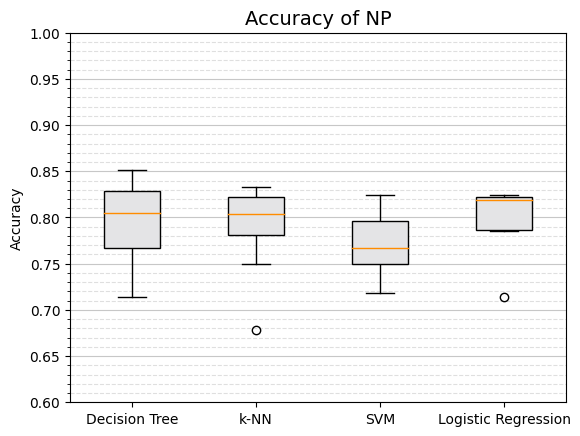

In [109]:
box_plot(NP_best_ApEn_list, 'Accuracy of NP', 'darkorange')

In [110]:
KT_best_ApEn_list = multiple_cv_gridSearch(2, 17, KT_X_ApEn, KT_Y_ApEn)

In [58]:
for i in range(len(KT_best_ApEn_list)):
    best_results_display("KT accuracy (cv = "+ str(KT_best_ApEn_list[i].iloc[0,3]) + "):", KT_best_ApEn_list[i])

KT accuracy (cv = 2):


,model,best_accuracy,best_params,cv
0,decision_tree,0.833333,"{'criterion': 'gini', 'max_depth': 2, 'max_features': 0.7, 'random_state': 0, 'splitter': 'random'}",2
1,k-NN,0.833333,"{'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'distance'}",2
2,SVM,0.666667,"{'C': 100, 'gamma': 'auto', 'kernel': 'sigmoid', 'random_state': 0}",2
3,logistic_regression,0.638889,"{'C': 5, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",2


KT accuracy (cv = 3):


,model,best_accuracy,best_params,cv
0,decision_tree,0.750000,"{'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'random_state': 0, 'splitter': 'random'}",3
1,k-NN,0.694444,"{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}",3
2,SVM,0.722222,"{'C': 500, 'gamma': 0.05, 'kernel': 'sigmoid', 'random_state': 0}",3
3,logistic_regression,0.722222,"{'C': 5, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'liblinear'}",3


KT accuracy (cv = 4):


,model,best_accuracy,best_params,cv
0,decision_tree,0.750000,"{'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'random_state': 0, 'splitter': 'best'}",4
1,k-NN,0.750000,"{'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}",4
2,SVM,0.750000,"{'C': 1000, 'gamma': 'auto', 'kernel': 'poly', 'random_state': 0}",4
3,logistic_regression,0.694444,"{'C': 5, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",4


KT accuracy (cv = 5):


,model,best_accuracy,best_params,cv
0,decision_tree,0.746429,"{'criterion': 'gini', 'max_depth': 3, 'max_features': 0.5, 'random_state': 0, 'splitter': 'random'}",5
1,k-NN,0.807143,"{'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}",5
2,SVM,0.775000,"{'C': 1000, 'gamma': 'auto', 'kernel': 'poly', 'random_state': 0}",5
3,logistic_regression,0.746429,"{'C': 1, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'liblinear'}",5


KT accuracy (cv = 6):


,model,best_accuracy,best_params,cv
0,decision_tree,0.805556,"{'criterion': 'gini', 'max_depth': 1, 'max_features': 0.6, 'random_state': 0, 'splitter': 'random'}",6
1,k-NN,0.805556,"{'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}",6
2,SVM,0.805556,"{'C': 500, 'gamma': 0.05, 'kernel': 'sigmoid', 'random_state': 0}",6
3,logistic_regression,0.722222,"{'C': 5, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'saga'}",6


KT accuracy (cv = 7):


,model,best_accuracy,best_params,cv
0,decision_tree,0.752381,"{'criterion': 'gini', 'max_depth': 1, 'max_features': 0.6, 'random_state': 0, 'splitter': 'random'}",7
1,k-NN,0.780952,"{'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}",7
2,SVM,0.800000,"{'C': 500, 'gamma': 0.05, 'kernel': 'sigmoid', 'random_state': 0}",7
3,logistic_regression,0.747619,"{'C': 10, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear'}",7


KT accuracy (cv = 8):


,model,best_accuracy,best_params,cv
0,decision_tree,0.85625,"{'criterion': 'entropy', 'max_depth': 1, 'max_features': 0.7, 'random_state': 0, 'splitter': 'random'}",8
1,k-NN,0.83750,"{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}",8
2,SVM,0.78750,"{'C': 10, 'gamma': 0.05, 'kernel': 'poly', 'random_state': 0}",8
3,logistic_regression,0.75625,"{'C': 1, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'liblinear'}",8


KT accuracy (cv = 9):


,model,best_accuracy,best_params,cv
0,decision_tree,0.777778,"{'criterion': 'gini', 'max_depth': 1, 'max_features': 0.6, 'random_state': 0, 'splitter': 'random'}",9
1,k-NN,0.805556,"{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}",9
2,SVM,0.777778,"{'C': 500, 'gamma': 0.05, 'kernel': 'sigmoid', 'random_state': 0}",9
3,logistic_regression,0.750000,"{'C': 1, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'liblinear'}",9


KT accuracy (cv = 10):


,model,best_accuracy,best_params,cv
0,decision_tree,0.800000,"{'criterion': 'gini', 'max_depth': 1, 'max_features': 0.7, 'random_state': 0, 'splitter': 'random'}",10
1,k-NN,0.841667,"{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}",10
2,SVM,0.816667,"{'C': 1, 'gamma': 1, 'kernel': 'rbf', 'random_state': 0}",10
3,logistic_regression,0.783333,"{'C': 1, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'liblinear'}",10


KT accuracy (cv = 11):


,model,best_accuracy,best_params,cv
0,decision_tree,0.833333,"{'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'random_state': 0, 'splitter': 'random'}",11
1,k-NN,0.863636,"{'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}",11
2,SVM,0.810606,"{'C': 500, 'gamma': 0.05, 'kernel': 'sigmoid', 'random_state': 0}",11
3,logistic_regression,0.780303,"{'C': 5, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'saga'}",11


KT accuracy (cv = 12):


,model,best_accuracy,best_params,cv
0,decision_tree,0.805556,"{'criterion': 'gini', 'max_depth': 1, 'max_features': 0.6, 'random_state': 0, 'splitter': 'random'}",12
1,k-NN,0.833333,"{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}",12
2,SVM,0.777778,"{'C': 10, 'gamma': 0.05, 'kernel': 'poly', 'random_state': 0}",12
3,logistic_regression,0.722222,"{'C': 1, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'liblinear'}",12


KT accuracy (cv = 13):


,model,best_accuracy,best_params,cv
0,decision_tree,0.794872,"{'criterion': 'gini', 'max_depth': 3, 'max_features': 0.6, 'random_state': 0, 'splitter': 'random'}",13
1,k-NN,0.858974,"{'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}",13
2,SVM,0.820513,"{'C': 1000, 'gamma': 'auto', 'kernel': 'sigmoid', 'random_state': 0}",13
3,logistic_regression,0.756410,"{'C': 10, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",13


KT accuracy (cv = 14):


,model,best_accuracy,best_params,cv
0,decision_tree,0.809524,"{'criterion': 'gini', 'max_depth': 3, 'max_features': 0.6, 'random_state': 0, 'splitter': 'random'}",14
1,k-NN,0.869048,"{'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}",14
2,SVM,0.821429,"{'C': 1000, 'gamma': 'auto', 'kernel': 'sigmoid', 'random_state': 0}",14
3,logistic_regression,0.761905,"{'C': 10, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",14


KT accuracy (cv = 15):


,model,best_accuracy,best_params,cv
0,decision_tree,0.844444,"{'criterion': 'gini', 'max_depth': 3, 'max_features': 0.6, 'random_state': 0, 'splitter': 'random'}",15
1,k-NN,0.855556,"{'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}",15
2,SVM,0.833333,"{'C': 1000, 'gamma': 'scale', 'kernel': 'poly', 'random_state': 0}",15
3,logistic_regression,0.800000,"{'C': 1, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'liblinear'}",15


KT accuracy (cv = 16):


,model,best_accuracy,best_params,cv
0,decision_tree,0.812500,"{'criterion': 'gini', 'max_depth': 3, 'max_features': 0.6, 'random_state': 0, 'splitter': 'random'}",16
1,k-NN,0.843750,"{'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}",16
2,SVM,0.833333,"{'C': 500, 'gamma': 0.05, 'kernel': 'sigmoid', 'random_state': 0}",16
3,logistic_regression,0.781250,"{'C': 500, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",16


KT accuracy (cv = 17):


,model,best_accuracy,best_params,cv
0,decision_tree,0.823529,"{'criterion': 'gini', 'max_depth': 1, 'max_features': 0.8, 'random_state': 0, 'splitter': 'random'}",17
1,k-NN,0.833333,"{'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}",17
2,SVM,0.823529,"{'C': 500, 'gamma': 0.05, 'kernel': 'sigmoid', 'random_state': 0}",17
3,logistic_regression,0.774510,"{'C': 500, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",17


In [59]:
KT_best_df_ApEn, KT_cv_min_ApEn, KT_cv_max_ApEn = best_cv(KT_best_ApEn_list)

In [60]:
best_results_display("Best KT accuracy ("  + str(KT_cv_min_ApEn) + " - " + str(KT_cv_max_ApEn) + " cv):", KT_best_df_ApEn)

Best KT accuracy (2 - 17 cv):


,model,best_accuracy,best_params,cv
0,k-NN,0.869048,"{'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}",14


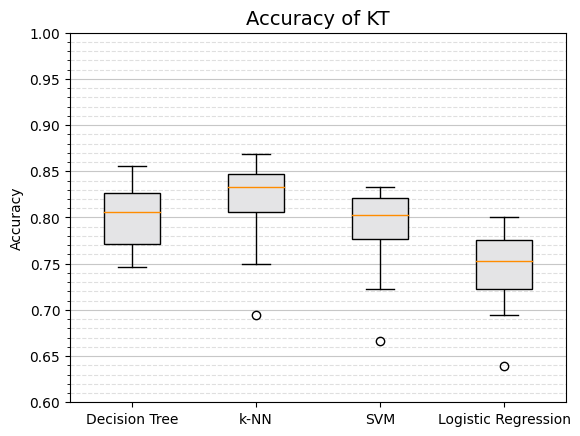

In [111]:
box_plot(KT_best_ApEn_list, 'Accuracy of KT', 'darkorange')

In [112]:
SU_best_ApEn_list = multiple_cv_gridSearch(2, 11, SU_X_ApEn, SU_Y_ApEn)

In [62]:
for i in range(len(SU_best_ApEn_list)):
    best_results_display("SU accuracy (cv = "+ str(SU_best_ApEn_list[i].iloc[0,3]) + "):", SU_best_ApEn_list[i])

SU accuracy (cv = 2):


,model,best_accuracy,best_params,cv
0,decision_tree,0.847368,"{'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'random_state': 0, 'splitter': 'best'}",2
1,k-NN,0.925000,"{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'uniform'}",2
2,SVM,0.847368,"{'C': 5, 'gamma': 0.5, 'kernel': 'rbf', 'random_state': 0}",2
3,logistic_regression,0.846053,"{'C': 10, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",2


SU accuracy (cv = 3):


,model,best_accuracy,best_params,cv
0,decision_tree,0.794872,"{'criterion': 'gini', 'max_depth': None, 'max_features': 0.2, 'random_state': 0, 'splitter': 'best'}",3
1,k-NN,0.846154,"{'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'uniform'}",3
2,SVM,0.794872,"{'C': 500, 'gamma': 0.01, 'kernel': 'poly', 'random_state': 0}",3
3,logistic_regression,0.743590,"{'C': 1, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",3


SU accuracy (cv = 4):


,model,best_accuracy,best_params,cv
0,decision_tree,0.897222,"{'criterion': 'gini', 'max_depth': None, 'max_features': 0.6, 'random_state': 0, 'splitter': 'best'}",4
1,k-NN,0.894444,"{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}",4
2,SVM,0.847222,"{'C': 0.5, 'gamma': 'scale', 'kernel': 'poly', 'random_state': 0}",4
3,logistic_regression,0.775000,"{'C': 5, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear'}",4


SU accuracy (cv = 5):


,model,best_accuracy,best_params,cv
0,decision_tree,0.850000,"{'criterion': 'gini', 'max_depth': None, 'max_features': 0.6, 'random_state': 0, 'splitter': 'best'}",5
1,k-NN,0.892857,"{'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}",5
2,SVM,0.792857,"{'C': 1000, 'gamma': 'auto', 'kernel': 'poly', 'random_state': 0}",5
3,logistic_regression,0.767857,"{'C': 1, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",5


SU accuracy (cv = 6):


,model,best_accuracy,best_params,cv
0,decision_tree,0.928571,"{'criterion': 'entropy', 'max_depth': None, 'max_features': 0.6, 'random_state': 0, 'splitter': 'best'}",6
1,k-NN,0.873016,"{'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}",6
2,SVM,0.793651,"{'C': 5, 'gamma': 0.05, 'kernel': 'poly', 'random_state': 0}",6
3,logistic_regression,0.769841,"{'C': 1, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",6


SU accuracy (cv = 7):


,model,best_accuracy,best_params,cv
0,decision_tree,0.952381,"{'criterion': 'gini', 'max_depth': None, 'max_features': None, 'random_state': 0, 'splitter': 'random'}",7
1,k-NN,0.895238,"{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}",7
2,SVM,0.800000,"{'C': 1, 'gamma': 1, 'kernel': 'rbf', 'random_state': 0}",7
3,logistic_regression,0.776190,"{'C': 1, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",7


SU accuracy (cv = 8):


,model,best_accuracy,best_params,cv
0,decision_tree,0.87500,"{'criterion': 'gini', 'max_depth': None, 'max_features': None, 'random_state': 0, 'splitter': 'random'}",8
1,k-NN,0.89375,"{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}",8
2,SVM,0.79375,"{'C': 5, 'gamma': 1, 'kernel': 'rbf', 'random_state': 0}",8
3,logistic_regression,0.76875,"{'C': 1, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",8


SU accuracy (cv = 9):


,model,best_accuracy,best_params,cv
0,decision_tree,0.955556,"{'criterion': 'gini', 'max_depth': None, 'max_features': 0.9, 'random_state': 0, 'splitter': 'best'}",9
1,k-NN,0.900000,"{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}",9
2,SVM,0.877778,"{'C': 5, 'gamma': 1, 'kernel': 'rbf', 'random_state': 0}",9
3,logistic_regression,0.838889,"{'C': 500, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'sag'}",9


SU accuracy (cv = 10):


,model,best_accuracy,best_params,cv
0,decision_tree,0.925000,"{'criterion': 'gini', 'max_depth': None, 'max_features': 0.6, 'random_state': 0, 'splitter': 'best'}",10
1,k-NN,0.891667,"{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}",10
2,SVM,0.816667,"{'C': 50, 'gamma': 0.05, 'kernel': 'poly', 'random_state': 0}",10
3,logistic_regression,0.791667,"{'C': 500, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",10


SU accuracy (cv = 11):


,model,best_accuracy,best_params,cv
0,decision_tree,0.909091,"{'criterion': 'gini', 'max_depth': None, 'max_features': 0.9, 'random_state': 0, 'splitter': 'best'}",11
1,k-NN,0.893939,"{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}",11
2,SVM,0.871212,"{'C': 100, 'gamma': 'scale', 'kernel': 'rbf', 'random_state': 0}",11
3,logistic_regression,0.848485,"{'C': 50, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear'}",11


In [63]:
SU_best_df_ApEn, SU_cv_min_ApEn, SU_cv_max_ApEn = best_cv(SU_best_ApEn_list)

In [64]:
best_results_display("Best SU accuracy ("  + str(SU_cv_min_ApEn) + " - " + str(SU_cv_max_ApEn) + " cv):", SU_best_df_ApEn)

Best SU accuracy (2 - 11 cv):


,model,best_accuracy,best_params,cv
0,decision_tree,0.955556,"{'criterion': 'gini', 'max_depth': None, 'max_features': 0.9, 'random_state': 0, 'splitter': 'best'}",9


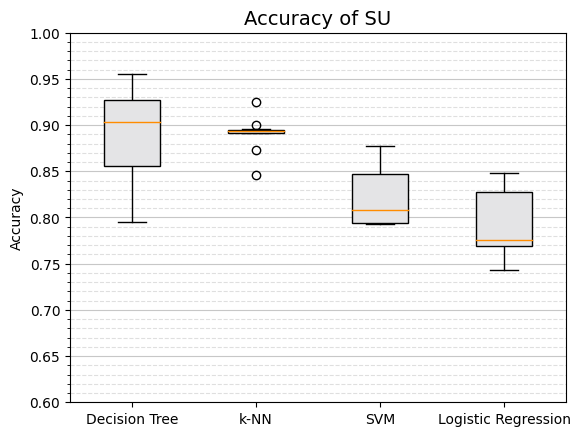

In [113]:
box_plot(SU_best_ApEn_list, 'Accuracy of SU', 'darkorange')

In [ ]:
########################################## Dimensional Reduction: Mutual Information ##############################################

In [114]:
from sklearn.feature_selection import mutual_info_classif as MIC

In [115]:
DT_model_dimRed = {
        'decision_tree': {
            'model': DecisionTreeClassifier(),
            'params': {
                'criterion':  ['gini', 'entropy'],
                'max_depth':  [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                'max_features': [None, 'sqrt', 'log2', 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1],
                'splitter': ['best', 'random'],
                'random_state': [0]
                    }
            }
        }

SVM_model_dimRed = {
        'SVM': {
            'model': svm.SVC(),
            'params': {
                'C': [1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1],
                'kernel' : ['poly', 'rbf', 'sigmoid', 'linear'],
                'gamma': ['auto', 'scale', 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001],
                'random_state' : [0]
                    }
                }
        }

LogReg_solver_penalty_pairs = {
    'newton-cg': {
        'solver' : ['newton-cg'],
        'penalty' : ['l2']
    },
    'lbfgs': {
        'solver' : ['lbfgs'],
        'penalty' : ['l2']
    },
     'liblinear': {
        'solver' : ['liblinear'],
        'penalty' : ['l1', 'l2']
    },
     'sag': {
        'solver' : ['sag'],
        'penalty' : ['l2']
    },
     'saga': {
        'solver' : ['saga'],
        'penalty' : ['l1', 'l2']
    }
}

In [116]:
def GridSearchCV_dimRed(model, X, Y, cv, features, mi_score):
    scores = []

    for model_name, model_params in model.items():
        grid =  GridSearchCV(model_params['model'], model_params['params'], cv = cv, return_train_score = False, n_jobs = -1)
        grid.fit(X, Y)
        
        if len(features) != 76:
            if(isinstance(cv, int)):
                scores.append({
                    'model': model_name,
                    'best_accuracy': grid.best_score_,
                    'best_params': grid.best_params_,
                    'cv': cv,
                    'used_features': features,
                    'mi_score': mi_score
                })
            else:
                scores.append({
                    'model': model_name,
                    'best_accuracy': grid.best_score_,
                    'best_params': grid.best_params_,
                    'cv': 'LOOCV',
                    'used_features': features,
                    'mi_score': mi_score
                })

    best_df = pd.DataFrame(scores, columns = ['model','best_accuracy','best_params', 'cv', 'used_features', 'mi_score'])
    return best_df

In [117]:
def LogReg_gridSearchCV_dimRed(X, Y, cv, mi_score_selected_index, i):
    if(isinstance(cv, int)):
        if(cv_exeption_handling(cv, Y) != "Ok"):
            return None
        
    df = pd.DataFrame()

    for name, params in LogReg_solver_penalty_pairs.items():    
        seged_LogReg_model = \
            LogReg_param(LogReg_solver_penalty_pairs[name]['solver'], LogReg_solver_penalty_pairs[name]['penalty'])
        df = df.append(GridSearchCV_dimRed(seged_LogReg_model, X, Y, cv, mi_score_selected_index, i))
    
    best_value = 0
    
    for i in range(len(df)):
        score = df.iloc[i, 1]
        if(score > best_value):
            best_value = score
            best_df = pd.DataFrame(columns = ['model','best_accuracy','best_params', 'cv', 'used_features', 'mi_score'])
            series = pd.Series(df.iloc[i,:], index = ['model','best_accuracy','best_params', 'cv', 'used_features', 'mi_score'])
            best_df = best_df.append(series, ignore_index = True)
            
    return best_df

In [118]:
def kNN_model_dimRed(Y, cv):
    if(isinstance(cv, int)):
        length = len(Y)
        max_neighbors_temp = length / cv
    
        if((max_neighbors_temp - int(max_neighbors_temp)) == 0.0):
            max_neighbors = int(length - max_neighbors_temp)
        else:
            max_neighbors = length - (int(max_neighbors_temp) + 1)
            
    else:
        max_neighbors = len(Y) - 1
    
    
    model = {
        'k-NN': {
            'model': KNeighborsClassifier(),
            'params': {
                'n_neighbors' : range(1, max_neighbors + 1),
                'weights' : ['uniform', 'distance'],
                'metric' : ['euclidean', 'manhattan', 'minkowski']
                      }
                }
             }
         
    return model

In [119]:
def Best_result_dimRed(X, Y, model, cv):
    if(isinstance(cv, int)):
        if(cv_exeption_handling(cv, Y) != "Ok"):
            return None
    
    if model == 'DT':
        grid_model = DT_model_dimRed
    elif model == 'SVM':
        grid_model = SVM_model_dimRed
    
    #Mutual Information
    mi_score = MIC(X, Y, random_state = 0)
    mini = min(mi_score)
    maxi = max(mi_score)
    
    best_df = pd.DataFrame()
    return_df = pd.DataFrame()
    return_df_accuracy = 0
    best_df_accuracy = 0
    
    #iterate over a range of values from the minimum to the maximum, incrementing by 0.01 each time
    for i in np.arange(mini, maxi, 0.01):
        mi_score_indexes = np.where(mi_score > i)[0]
        X_2 = X[:, mi_score_indexes]
        
        if model == 'LR':
            best_df = LogReg_gridSearchCV_dimRed(X_2, Y, cv, mi_score_indexes, i)
        elif model == 'k-NN':
            kNN_model = kNN_model_dimRed(Y, cv)
            best_df = GridSearchCV_dimRed(kNN_model, X_2, Y, cv, mi_score_indexes, i)
        else:
            best_df = GridSearchCV_dimRed(grid_model, X_2, Y, cv, mi_score_indexes, i)
            
        best_df_accuracy = best_df.iloc[0, 1]
        
        if best_df_accuracy > return_df_accuracy:
            return_df_accuracy = best_df_accuracy
            return_df = best_df
    
    return return_df

In [51]:
NP_DT_dimRed = Best_result_dimRed(NP_X_ApEn, NP_Y_ApEn, 'DT', LeaveOneOut())

In [52]:
best_results_display("Best LOOCV accuracy for NP-DT (dimRed): ", NP_DT_dimRed)

Best LOOCV accuracy for NP-DT (dimRed): 


,model,best_accuracy,best_params,cv,used_features,mi_score
0,decision_tree,0.964286,"{'criterion': 'gini', 'max_depth': None, 'max_features': 0.7, 'random_state': 0, 'splitter': 'random'}",LOOCV,"[0, 3, 10, 11, 13, 17, 18, 22, 29, 30, 34, 35, 36, 41, 43, 47, 48, 54, 55, 57, 61, 62, 67, 68, 70, 71, 72, 74]",0.02


In [53]:
NP_DT_dimRed = Best_result_dimRed(NP_X_ApEn, NP_Y_ApEn, 'DT', 2)

In [54]:
best_results_display("Best cv = 2 accuracy for NP-DT (dimRed): ", NP_DT_dimRed)

Best cv = 2 accuracy for NP-DT (dimRed): 


,model,best_accuracy,best_params,cv,used_features,mi_score
0,decision_tree,0.892857,"{'criterion': 'gini', 'max_depth': None, 'max_features': 0.8, 'random_state': 0, 'splitter': 'random'}",2,"[22, 35, 36, 54, 55]",0.15


In [55]:
#Test
mi_score = MIC(SU_X_ApEn, SU_Y_ApEn, random_state = 0)
mi_score_selected_index = np.where(mi_score > 0.12)[0]
X_2 = SU_X_ApEn[:, mi_score_selected_index]

model_4 = DecisionTreeClassifier(criterion = 'entropy', max_depth = None, max_features = 0.9, random_state = 0, splitter ='random')

kf_score = cross_val_score(model_4, X_2, SU_Y_ApEn, cv = 10)
kf_score_mean = kf_score.mean()
kf_score_mean

1.0

In [120]:
#DimRed boxplot
def Box_plot_dimRed(lists, title, c):
    plt.grid(which='major', linestyle='-', alpha = 0.7, axis = 'y')
    plt.grid(which='minor', linestyle='--', alpha = 0.4, axis = 'y')
    plt.minorticks_on()
    #minor turn off on x
    plt.tick_params('x', which='minor', bottom=False, top=False)
    
    plt.boxplot(lists, patch_artist=True, boxprops=dict(facecolor='#E4E4E6'), medianprops=dict(color=c))
    plt.xticks([1, 2, 3, 4], ['Decision Tree', 'k-NN', 'SVM', 'Logistic Regression'])
    plt.ylim(0.7, 1.05)
    
    plt.ylabel('Accuracy')
    plt.title(title, fontsize = 14)
    
    plt.show()

In [121]:
#List rows: DT, k-NN, SVM, LR
NP_accuracies_lists_dimRed = [
    [0.892857, 0.855556, 0.928571, 0.933333, 0.933333, 0.928571, 0.96875, 0.962963],
    [0.892857, 0.92963, 0.928571, 0.933333, 0.933333, 0.928571, 0.9375, 0.925926],
    [0.857143, 0.781481, 0.857143, 0.893333, 0.891667, 0.892857, 0.90625, 0.888889],
    [0.785714, 0.822222, 0.75, 0.793333, 0.825, 0.821429, 0.833333, 0.833333]
]

KT_accuracies_lists_dimRed = [
    [0.833333, 0.833333, 0.888889, 0.889286, 0.861111, 0.885714, 0.86875, 0.888889, 0.875, 0.871212, 0.916667, 0.884615, 0.892857, 0.9, 0.90625, 0.892157],
    [0.861111, 0.777778, 0.861111, 0.892857, 0.861111, 0.895238, 0.89375, 0.888889, 0.9, 0.901515, 0.888889, 0.897436, 0.904762, 0.911111, 0.90625, 0.921569],
    [0.833333, 0.833333, 0.861111, 0.860714, 0.861111, 0.861905, 0.86875, 0.861111, 0.891667, 0.901515, 0.888889, 0.858974, 0.892857, 0.9, 0.895833, 0.892157],
    [0.75, 0.75, 0.777778, 0.835714, 0.777778, 0.780952, 0.8125, 0.833333, 0.833333, 0.840909, 0.805556, 0.782051, 0.809524, 0.822222, 0.8125, 0.833333]
]

SU_accuracies_lists_dimRed = [
    [0.898684, 0.923077, 0.95, 0.975, 0.952381, 0.952381, 0.95, 0.977778, 1.0, 0.977273],
    [0.95, 0.846154, 0.925, 0.9, 0.952381, 0.952381, 0.95, 0.955556, 0.95, 0.954545],
    [0.925, 0.923077, 0.95, 0.95, 0.952381, 0.952381, 0.95, 0.955556, 0.95, 0.954545],
    [0.925, 0.871795, 0.95, 0.95, 0.952381, 0.952381, 0.95, 0.955556, 0.95, 0.954545]
]

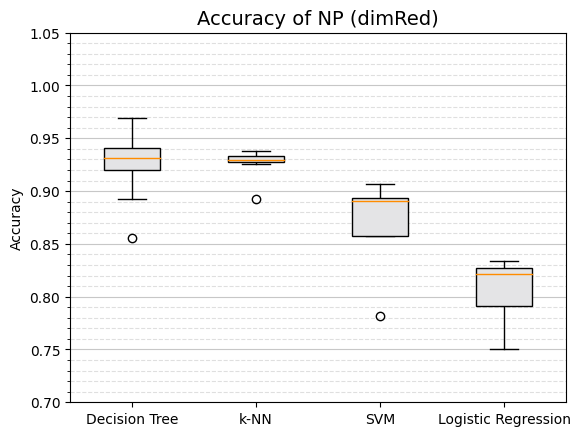

In [122]:
Box_plot_dimRed(NP_accuracies_lists_dimRed, "Accuracy of NP (dimRed)", "darkorange")

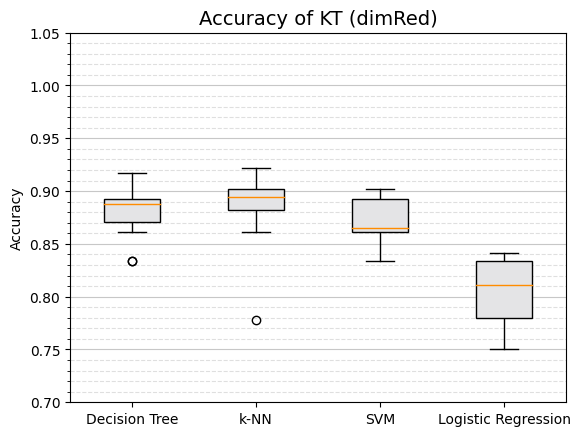

In [123]:
Box_plot_dimRed(KT_accuracies_lists_dimRed, "Accuracy of KT (dimRed)", "darkorange")

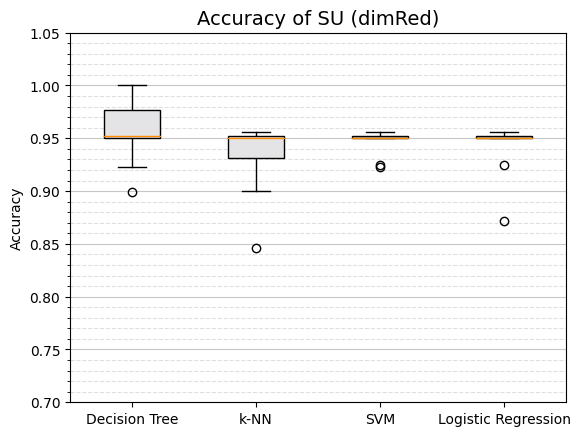

In [124]:
Box_plot_dimRed(SU_accuracies_lists_dimRed, "Accuracy of SU (dimRed)", "darkorange")

In [ ]:
###################################################### Standardization ############################################################

In [125]:
from sklearn.preprocessing import StandardScaler

In [126]:
NP_X_standardized_ApEn =  StandardScaler().fit_transform(NP_X_ApEn)
KT_X_standardized_ApEn =  StandardScaler().fit_transform(KT_X_ApEn)
SU_X_standardized_ApEn =  StandardScaler().fit_transform(SU_X_ApEn)

NP_Y_standardized_ApEn =  NP_Y_ApEn
KT_Y_standardized_ApEn =  KT_Y_ApEn
SU_Y_standardized_ApEn =  SU_Y_ApEn

In [127]:
NP_X_standardized_train_ApEn, NP_X_standardized_test_ApEn, NP_Y_standardized_train_ApEn, NP_Y_standardized_test_ApEn = \
    train_test(NP_X_standardized_ApEn, NP_Y_standardized_ApEn, 0.2)

KT_X_standardized_train_ApEn, KT_X_standardized_test_ApEn, KT_Y_standardized_train_ApEn, KT_Y_standardized_test_ApEn = \
    train_test(KT_X_standardized_ApEn, KT_Y_standardized_ApEn, 0.2)

SU_X_standardized_train_ApEn, SU_X_standardized_test_ApEn, SU_Y_standardized_train_ApEn, SU_Y_standardized_test_ApEn = \
    train_test(SU_X_standardized_ApEn, SU_Y_standardized_ApEn, 0.2)

In [ ]:
################################################# Standardization: DT #############################################################

In [128]:
#Entropy
NP_DT_ent_model_standardized_ApEn, NP_DT_ent_y_pred_standardized_ApEn, \
NP_DT_ent_accuracy_standardized_ApEn, NP_DT_ent_kf_standardized_ApEn, NP_DT_ent_loocv_standardized_ApEn = \
    Decision_tree('entropy', NP_X_standardized_ApEn, NP_Y_standardized_ApEn, \
                  NP_X_standardized_train_ApEn, NP_X_standardized_test_ApEn, \
                  NP_Y_standardized_train_ApEn, NP_Y_standardized_test_ApEn)

KT_DT_ent_model_standardized_ApEn, KT_DT_ent_y_pred_standardized_ApEn, \
KT_DT_ent_accuracy_standardized_ApEn, KT_DT_ent_kf_standardized_ApEn, KT_DT_ent_loocv_standardized_ApEn = \
    Decision_tree('entropy', KT_X_standardized_ApEn, KT_Y_standardized_ApEn, \
                  KT_X_standardized_train_ApEn, KT_X_standardized_test_ApEn, \
                  KT_Y_standardized_train_ApEn, KT_Y_standardized_test_ApEn)

SU_DT_ent_model_standardized_ApEn, SU_DT_ent_y_pred_standardized_ApEn, \
SU_DT_ent_accuracy_standardized_ApEn, SU_DT_ent_kf_standardized_ApEn, SU_DT_ent_loocv_standardized_ApEn = \
    Decision_tree('entropy', SU_X_standardized_ApEn, SU_Y_standardized_ApEn, \
                  SU_X_standardized_train_ApEn, SU_X_standardized_test_ApEn, \
                  SU_Y_standardized_train_ApEn, SU_Y_standardized_test_ApEn)

In [129]:
#gini
NP_DT_gini_model_standardized_ApEn, NP_DT_gini_y_pred_standardized_ApEn, \
NP_DT_gini_accuracy_standardized_ApEn, NP_DT_gini_kf_standardized_ApEn, NP_DT_gini_loocv_standardized_ApEn = \
    Decision_tree('gini', NP_X_standardized_ApEn, NP_Y_standardized_ApEn, \
                  NP_X_standardized_train_ApEn, NP_X_standardized_test_ApEn, \
                  NP_Y_standardized_train_ApEn, NP_Y_standardized_test_ApEn)

KT_DT_gini_model_standardized_ApEn, KT_DT_gini_y_pred_standardized_ApEn, \
KT_DT_gini_accuracy_standardized_ApEn, KT_DT_gini_kf_standardized_ApEn, KT_DT_gini_loocv_standardized_ApEn = \
    Decision_tree('gini', KT_X_standardized_ApEn, KT_Y_standardized_ApEn, \
                  KT_X_standardized_train_ApEn, KT_X_standardized_test_ApEn, \
                  KT_Y_standardized_train_ApEn, KT_Y_standardized_test_ApEn)

SU_DT_gini_model_standardized_ApEn, SU_DT_gini_y_pred_standardized_ApEn, \
SU_DT_gini_accuracy_standardized_ApEn, SU_DT_gini_kf_standardized_ApEn, SU_DT_gini_loocv_standardized_ApEn = \
    Decision_tree('gini', SU_X_standardized_ApEn, SU_Y_standardized_ApEn, \
                  SU_X_standardized_train_ApEn, SU_X_standardized_test_ApEn, \
                  SU_Y_standardized_train_ApEn, SU_Y_standardized_test_ApEn)

In [130]:
#Validation results (entropy)
Results("Standardized Decision Tree with entropy: ", \
        NP_DT_ent_accuracy_standardized_ApEn, NP_DT_ent_kf_standardized_ApEn, NP_DT_ent_loocv_standardized_ApEn, \
        KT_DT_ent_accuracy_standardized_ApEn, KT_DT_ent_kf_standardized_ApEn, KT_DT_ent_loocv_standardized_ApEn, \
        SU_DT_ent_accuracy_standardized_ApEn, SU_DT_ent_kf_standardized_ApEn, SU_DT_ent_loocv_standardized_ApEn)

Standardized Decision Tree with entropy: 
	 NP
		 Accuracy: 0.8333333333333334
		 5-fold cross-validation: 0.5066666666666667
		 LOOCV: 0.6785714285714286
	 KT
		 Accuracy: 0.5
		 5-fold cross-validation: 0.525
		 LOOCV: 0.6111111111111112
	 SU
		 Accuracy: 0.875
		 5-fold cross-validation: 0.7357142857142857
		 LOOCV: 0.8974358974358975


In [131]:
#Validation results (gini)
Results("Standardized Decision Tree with gini:",\
        NP_DT_gini_accuracy_standardized_ApEn, NP_DT_gini_kf_standardized_ApEn, NP_DT_gini_loocv_standardized_ApEn, \
        KT_DT_gini_accuracy_standardized_ApEn, KT_DT_gini_kf_standardized_ApEn, KT_DT_gini_loocv_standardized_ApEn, \
        SU_DT_gini_accuracy_standardized_ApEn, SU_DT_gini_kf_standardized_ApEn, SU_DT_gini_loocv_standardized_ApEn)

Standardized Decision Tree with gini:
	 NP
		 Accuracy: 0.8333333333333334
		 5-fold cross-validation: 0.5066666666666667
		 LOOCV: 0.7857142857142857
	 KT
		 Accuracy: 0.5
		 5-fold cross-validation: 0.525
		 LOOCV: 0.5833333333333334
	 SU
		 Accuracy: 0.875
		 5-fold cross-validation: 0.7428571428571429
		 LOOCV: 0.8974358974358975


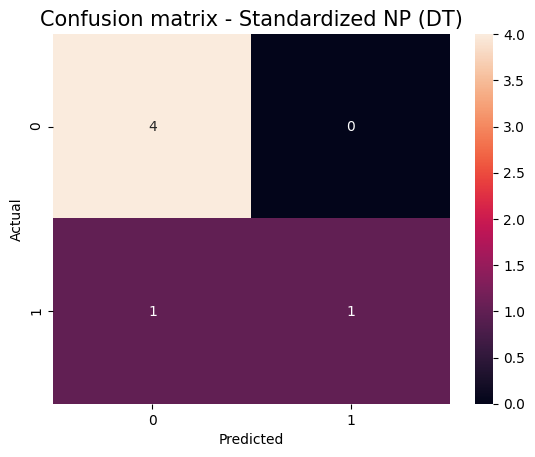

In [132]:
Confusion_matrix(NP_Y_standardized_test_ApEn, NP_DT_ent_y_pred_standardized_ApEn, 'Confusion matrix - Standardized NP (DT)')

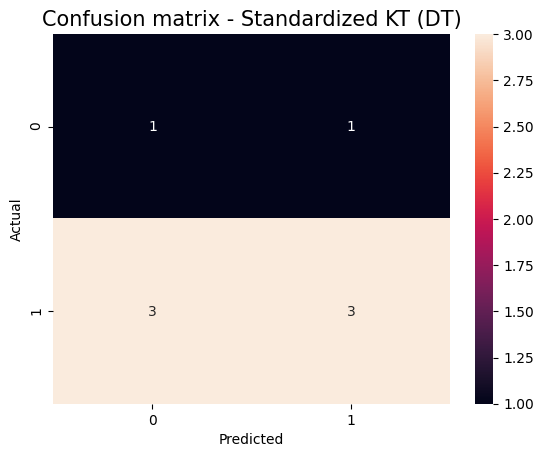

In [133]:
Confusion_matrix(KT_Y_standardized_test_ApEn, KT_DT_ent_y_pred_standardized_ApEn, 'Confusion matrix - Standardized KT (DT)')

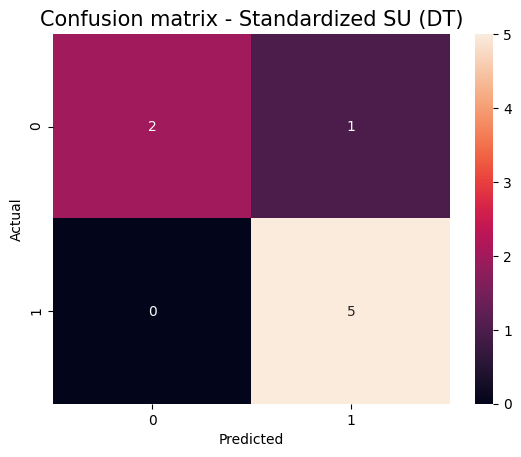

In [134]:
Confusion_matrix(SU_Y_standardized_test_ApEn, SU_DT_ent_y_pred_standardized_ApEn, 'Confusion matrix - Standardized SU (DT)')

In [ ]:
##################################################### Standardization: LR #########################################################

In [135]:
NP_LogR_model_standardized_ApEn, NP_LogR_y_pred_standardized_ApEn, \
NP_LogR_accuracy_standardized_ApEn, NP_LogR_kf_standardized_ApEn, NP_LogR_loocv_standardized_ApEn = \
    Logistic_regression(NP_X_standardized_ApEn, NP_Y_standardized_ApEn, \
                        NP_X_standardized_train_ApEn, NP_X_standardized_test_ApEn, \
                        NP_Y_standardized_train_ApEn, NP_Y_standardized_test_ApEn)

KT_LogR_model_standardized_ApEn, KT_LogR_y_pred_standardized_ApEn, \
KT_LogR_accuracy_standardized_ApEn, KT_LogR_kf_standardized_ApEn, KT_LogR_loocv_standardized_ApEn = \
    Logistic_regression(KT_X_standardized_ApEn, KT_Y_standardized_ApEn, \
                        KT_X_standardized_train_ApEn, KT_X_standardized_test_ApEn, \
                        KT_Y_standardized_train_ApEn, KT_Y_standardized_test_ApEn)

SU_LogR_model_standardized_ApEn, SU_LogR_y_pred_standardized_ApEn, \
SU_LogR_accuracy_standardized_ApEn, SU_LogR_kf_standardized_ApEn, SU_LogR_loocv_standardized_ApEn = \
    Logistic_regression(SU_X_standardized_ApEn, SU_Y_standardized_ApEn, \
                        SU_X_standardized_train_ApEn, SU_X_standardized_test_ApEn, \
                        SU_Y_standardized_train_ApEn, SU_Y_standardized_test_ApEn)

In [136]:
Results("Standardized Logistic Regression:", \
        NP_LogR_accuracy_standardized_ApEn, NP_LogR_kf_standardized_ApEn, NP_LogR_loocv_standardized_ApEn, \
        KT_LogR_accuracy_standardized_ApEn, KT_LogR_kf_standardized_ApEn, KT_LogR_loocv_standardized_ApEn, \
        SU_LogR_accuracy_standardized_ApEn, SU_LogR_kf_standardized_ApEn, SU_LogR_loocv_standardized_ApEn)

Standardized Logistic Regression:
	 NP
		 Accuracy: 0.8333333333333334
		 5-fold cross-validation: 0.7066666666666667
		 LOOCV: 0.6785714285714286
	 KT
		 Accuracy: 0.5
		 5-fold cross-validation: 0.6892857142857143
		 LOOCV: 0.7777777777777778
	 SU
		 Accuracy: 0.875
		 5-fold cross-validation: 0.8428571428571429
		 LOOCV: 0.7692307692307693


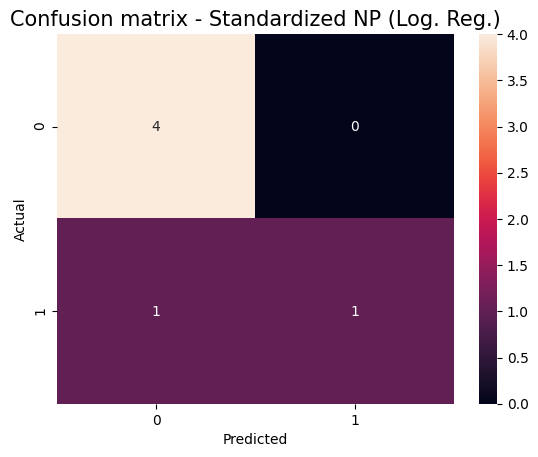

In [137]:
Confusion_matrix(NP_Y_standardized_test_ApEn, NP_LogR_y_pred_standardized_ApEn, 'Confusion matrix - Standardized NP (Log. Reg.)')

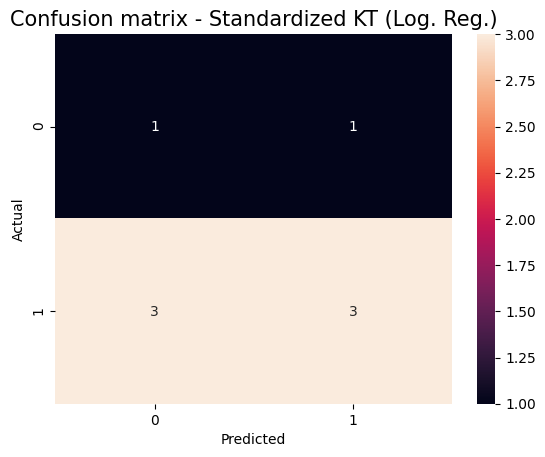

In [138]:
Confusion_matrix(KT_Y_standardized_test_ApEn, KT_LogR_y_pred_standardized_ApEn, 'Confusion matrix - Standardized KT (Log. Reg.)')

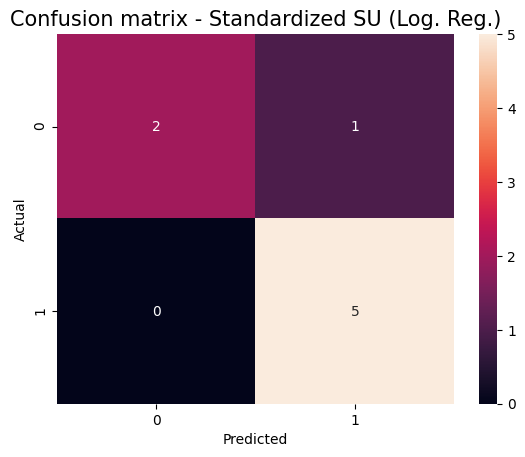

In [139]:
Confusion_matrix(SU_Y_standardized_test_ApEn, SU_LogR_y_pred_standardized_ApEn, 'Confusion matrix - Standardized SU (Log. Reg.)')

In [ ]:
################################################### Standardization: k-NN #########################################################

In [140]:
NP_kNN_model_standardized_ApEn, NP_kNN_y_pred_standardized_ApEn, \
NP_kNN_accuracy_standardized_ApEn, NP_kNN_kf_standardized_ApEn, NP_kNN_loocv_standardized_ApEn = \
    kNN(NP_X_standardized_ApEn, NP_Y_standardized_ApEn, \
        NP_X_standardized_train_ApEn, NP_X_standardized_test_ApEn, \
        NP_Y_standardized_train_ApEn, NP_Y_standardized_test_ApEn)

KT_kNN_model_standardized_ApEn, KT_kNN_y_pred_standardized_ApEn, \
KT_kNN_accuracy_standardized_ApEn, KT_kNN_kf_standardized_ApEn, KT_kNN_loocv_standardized_ApEn = \
    kNN(KT_X_standardized_ApEn, KT_Y_standardized_ApEn, \
        KT_X_standardized_train_ApEn, KT_X_standardized_test_ApEn, \
        KT_Y_standardized_train_ApEn, KT_Y_standardized_test_ApEn)

SU_kNN_model_standardized_ApEn, SU_kNN_y_pred_standardized_ApEn, \
SU_kNN_accuracy_standardized_ApEn, SU_kNN_kf_standardized_ApEn, SU_kNN_loocv_standardized_ApEn = \
    kNN(SU_X_standardized_ApEn, SU_Y_standardized_ApEn, \
        SU_X_standardized_train_ApEn, SU_X_standardized_test_ApEn, \
        SU_Y_standardized_train_ApEn, SU_Y_standardized_test_ApEn)

In [141]:
Results("Standardized k-NN:", \
        NP_kNN_accuracy_standardized_ApEn, NP_kNN_kf_standardized_ApEn, NP_kNN_loocv_standardized_ApEn, \
        KT_kNN_accuracy_standardized_ApEn, KT_kNN_kf_standardized_ApEn, KT_kNN_loocv_standardized_ApEn, \
        SU_kNN_accuracy_standardized_ApEn, SU_kNN_kf_standardized_ApEn, SU_kNN_loocv_standardized_ApEn)

Standardized k-NN:
	 NP
		 Accuracy: 0.5
		 5-fold cross-validation: 0.5599999999999999
		 LOOCV: 0.6428571428571429
	 KT
		 Accuracy: 0.5
		 5-fold cross-validation: 0.7214285714285713
		 LOOCV: 0.75
	 SU
		 Accuracy: 0.875
		 5-fold cross-validation: 0.8214285714285714
		 LOOCV: 0.8205128205128205


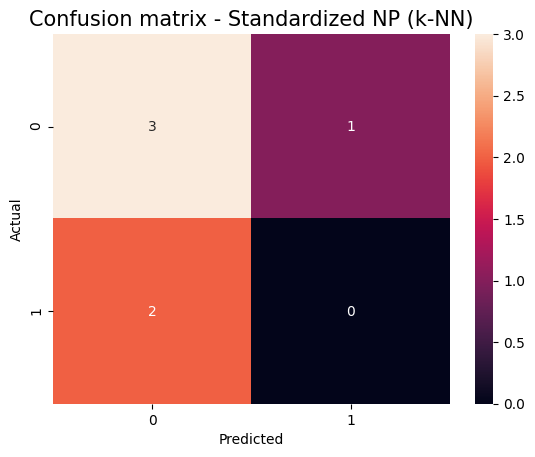

In [142]:
Confusion_matrix(NP_Y_standardized_test_ApEn, NP_kNN_y_pred_standardized_ApEn, 'Confusion matrix - Standardized NP (k-NN)')

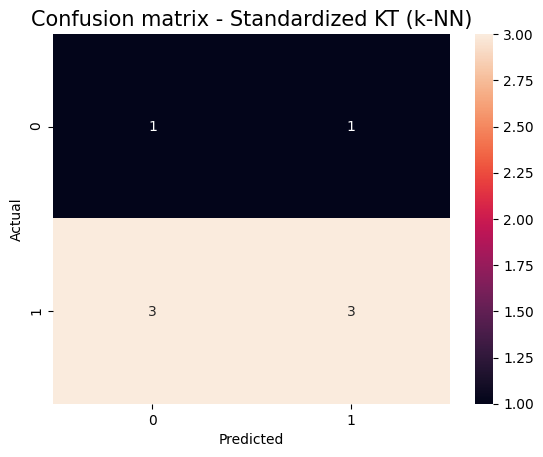

In [143]:
Confusion_matrix(KT_Y_standardized_test_ApEn, KT_kNN_y_pred_standardized_ApEn, 'Confusion matrix - Standardized KT (k-NN)')

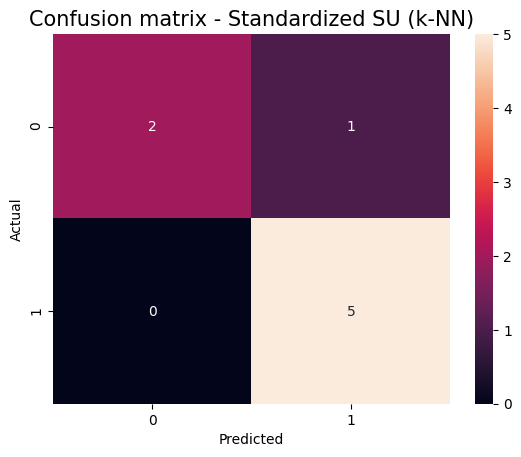

In [144]:
Confusion_matrix(SU_Y_standardized_test_ApEn, SU_kNN_y_pred_standardized_ApEn, 'Confusion matrix - Standardized SU (k-NN)')

In [145]:
NP_kNN_accuracies_standardized_ApEn, NP_kNN_kFolds_standardized_ApEn, NP_kNN_loocvs_standardized_ApEn = \
    kNN_best_k(NP_X_standardized_train_ApEn, NP_X_standardized_test_ApEn, \
               NP_Y_standardized_train_ApEn, NP_Y_standardized_test_ApEn, NP_X_standardized_ApEn, NP_Y_standardized_ApEn)

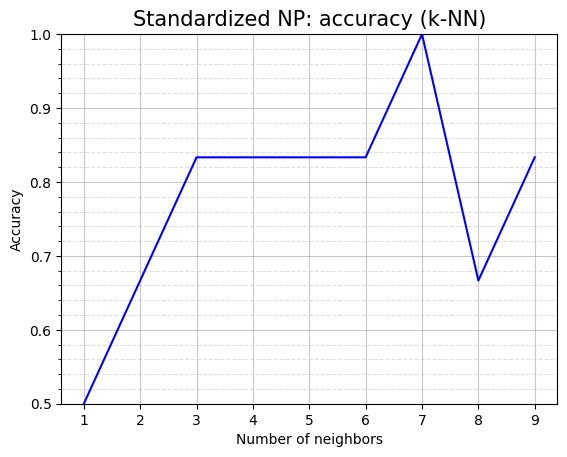

In [146]:
#NP: Accuracy
kNN_best_k_plot(NP_kNN_accuracies_standardized_ApEn, 'Standardized NP: accuracy (k-NN)')

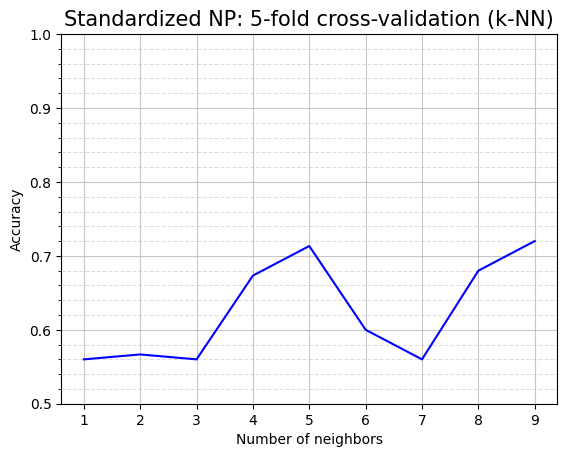

In [147]:
#NP: k-fold cross-validation
kNN_best_k_plot(NP_kNN_kFolds_standardized_ApEn, 'Standardized NP: 5-fold cross-validation (k-NN)')

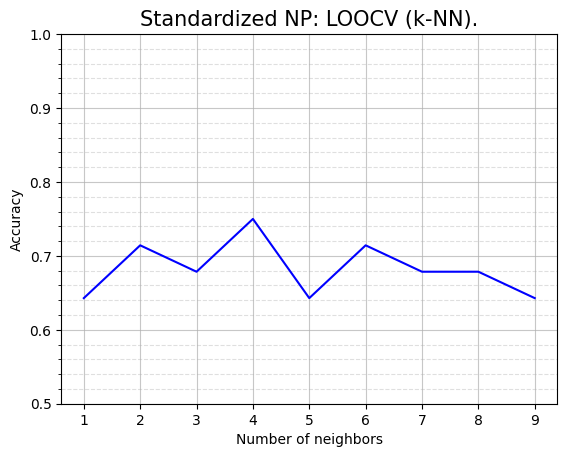

In [148]:
#NP: LOOCV
kNN_best_k_plot(NP_kNN_loocvs_standardized_ApEn, 'Standardized NP: LOOCV (k-NN).')

In [ ]:
################################################### Standardization: SVM ##########################################################

In [149]:
NP_SVM_model_standardized_ApEn, NP_SVM_y_pred_standardized_ApEn, \
NP_SVM_accuracy_standardized_ApEn, NP_SVM_kf_standardized_ApEn, NP_SVM_loocv_standardized_ApEn = \
    SVM(NP_X_standardized_ApEn, NP_Y_standardized_ApEn, \
        NP_X_standardized_train_ApEn, NP_X_standardized_test_ApEn, \
        NP_Y_standardized_train_ApEn, NP_Y_standardized_test_ApEn)

KT_SVM_model_standardized_ApEn, KT_SVM_y_pred_standardized_ApEn, \
KT_SVM_accuracy_standardized_ApEn, KT_SVM_kf_standardized_ApEn, KT_SVM_loocv_standardized_ApEn = \
    SVM(KT_X_standardized_ApEn, KT_Y_standardized_ApEn, \
        KT_X_standardized_train_ApEn, KT_X_standardized_test_ApEn, \
        KT_Y_standardized_train_ApEn, KT_Y_standardized_test_ApEn)

SU_SVM_model_standardized_ApEn, SU_SVM_y_pred_standardized_ApEn, \
SU_SVM_accuracy_standardized_ApEn, SU_SVM_kf_standardized_ApEn, SU_SVM_loocv_standardized_ApEn = \
    SVM(SU_X_standardized_ApEn, SU_Y_standardized_ApEn, \
        SU_X_standardized_train_ApEn, SU_X_standardized_test_ApEn, \
        SU_Y_standardized_train_ApEn, SU_Y_standardized_test_ApEn)

In [150]:
Results("Standardized SVM:", \
        NP_SVM_accuracy_standardized_ApEn, NP_SVM_kf_standardized_ApEn, NP_SVM_loocv_standardized_ApEn, \
        KT_SVM_accuracy_standardized_ApEn, KT_SVM_kf_standardized_ApEn, KT_SVM_loocv_standardized_ApEn, \
        SU_SVM_accuracy_standardized_ApEn, SU_SVM_kf_standardized_ApEn, SU_SVM_loocv_standardized_ApEn)

Standardized SVM:
	 NP
		 Accuracy: 0.8333333333333334
		 5-fold cross-validation: 0.74
		 LOOCV: 0.6428571428571429
	 KT
		 Accuracy: 0.375
		 5-fold cross-validation: 0.6321428571428571
		 LOOCV: 0.7222222222222222
	 SU
		 Accuracy: 0.875
		 5-fold cross-validation: 0.8464285714285713
		 LOOCV: 0.7948717948717948


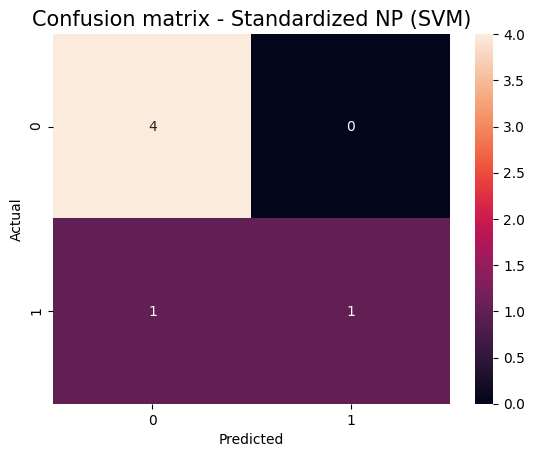

In [151]:
Confusion_matrix(NP_Y_standardized_test_ApEn, NP_SVM_y_pred_standardized_ApEn, 'Confusion matrix - Standardized NP (SVM)')

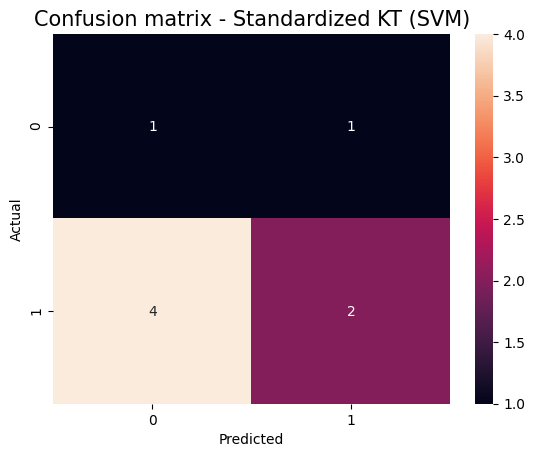

In [152]:
Confusion_matrix(KT_Y_standardized_test_ApEn, KT_SVM_y_pred_standardized_ApEn, 'Confusion matrix - Standardized KT (SVM)')

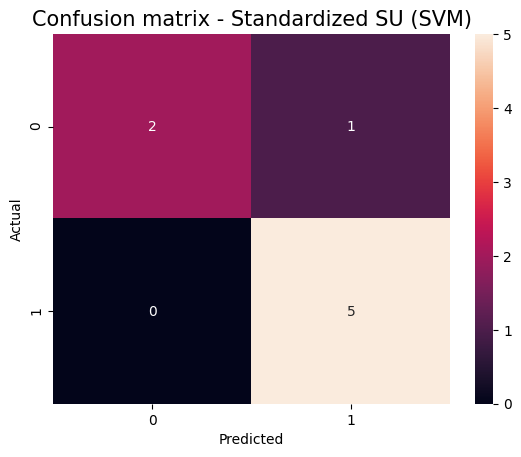

In [153]:
Confusion_matrix(SU_Y_standardized_test_ApEn, SU_SVM_y_pred_standardized_ApEn, 'Confusion matrix - Standardized SU (SVM)')

In [ ]:
##################################### Standardization: best accuracy and best parameter ############################################

In [154]:
NP_LOOCV_standardized_best_ApEn = best_results(NP_X_standardized_ApEn, NP_Y_standardized_ApEn, LeaveOneOut())

In [192]:
best_results_display("Best standardized LOOCV accuracy for NP: ", NP_LOOCV_standardized_best_ApEn)

Best standardized LOOCV accuracy for NP: 


,model,best_accuracy,best_params,cv
0,decision_tree,0.857143,"{'criterion': 'gini', 'max_depth': None, 'max_features': 0.5, 'random_state': 0, 'splitter': 'best'}",LOOCV
1,k-NN,0.750000,"{'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}",LOOCV
2,SVM,0.821429,"{'C': 1000, 'gamma': 0.05, 'kernel': 'sigmoid', 'random_state': 0}",LOOCV
3,logistic_regression,0.785714,"{'C': 0.1, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",LOOCV


In [193]:
KT_LOOCV_standardized_best_ApEn = best_results(KT_X_standardized_ApEn, KT_Y_standardized_ApEn, LeaveOneOut())

In [194]:
best_results_display("Best standardized LOOCV accuracy for KT: ", KT_LOOCV_standardized_best_ApEn)

Best standardized LOOCV accuracy for KT: 


,model,best_accuracy,best_params,cv
0,decision_tree,0.833333,"{'criterion': 'gini', 'max_depth': None, 'max_features': None, 'random_state': 0, 'splitter': 'random'}",LOOCV
1,k-NN,0.833333,"{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}",LOOCV
2,SVM,0.833333,"{'C': 10, 'gamma': 0.001, 'kernel': 'rbf', 'random_state': 0}",LOOCV
3,logistic_regression,0.805556,"{'C': 0.5, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",LOOCV


In [195]:
SU_LOOCV_standardized_best_ApEn = best_results(SU_X_standardized_ApEn, SU_Y_standardized_ApEn, LeaveOneOut())

In [196]:
best_results_display("Best standardized LOOCV accuracy for SU: ", SU_LOOCV_standardized_best_ApEn)

Best standardized LOOCV accuracy for SU: 


,model,best_accuracy,best_params,cv
0,decision_tree,0.923077,"{'criterion': 'gini', 'max_depth': None, 'max_features': 0.6, 'random_state': 0, 'splitter': 'best'}",LOOCV
1,k-NN,0.897436,"{'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}",LOOCV
2,SVM,0.923077,"{'C': 100, 'gamma': 0.0001, 'kernel': 'rbf', 'random_state': 0}",LOOCV
3,logistic_regression,0.897436,"{'C': 1, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'saga'}",LOOCV


In [ ]:
###################################### Standardization: GridSearchCV with multiple K-fold values ##################################

In [155]:
NP_best_standardized_ApEn_list = multiple_cv_gridSearch(2, 9, NP_X_standardized_ApEn, NP_Y_standardized_ApEn)

In [75]:
for i in range(len(NP_best_standardized_ApEn_list)):
    best_results_display("Standardized NP accuracy (cv = "+ str(NP_best_standardized_ApEn_list[i].iloc[0,3]) + "):", \
                         NP_best_standardized_ApEn_list[i])

Standardized NP accuracy (cv = 2):


,model,best_accuracy,best_params,cv
0,decision_tree,0.714286,"{'criterion': 'entropy', 'max_depth': 2, 'max_features': 1, 'random_state': 0, 'splitter': 'best'}",2
1,k-NN,0.678571,"{'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}",2
2,SVM,0.785714,"{'C': 1000, 'gamma': 1, 'kernel': 'sigmoid', 'random_state': 0}",2
3,logistic_regression,0.714286,"{'C': 50, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'saga'}",2


Standardized NP accuracy (cv = 3):


,model,best_accuracy,best_params,cv
0,decision_tree,0.785185,"{'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'random_state': 0, 'splitter': 'random'}",3
1,k-NN,0.718519,"{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}",3
2,SVM,0.859259,"{'C': 1000, 'gamma': 0.1, 'kernel': 'sigmoid', 'random_state': 0}",3
3,logistic_regression,0.714815,"{'C': 0.5, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",3


Standardized NP accuracy (cv = 4):


,model,best_accuracy,best_params,cv
0,decision_tree,0.714286,"{'criterion': 'gini', 'max_depth': 1, 'max_features': 0.2, 'random_state': 0, 'splitter': 'random'}",4
1,k-NN,0.714286,"{'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'uniform'}",4
2,SVM,0.821429,"{'C': 5, 'gamma': 0.05, 'kernel': 'sigmoid', 'random_state': 0}",4
3,logistic_regression,0.750000,"{'C': 10, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",4


Standardized NP accuracy (cv = 5):


,model,best_accuracy,best_params,cv
0,decision_tree,0.826667,"{'criterion': 'gini', 'max_depth': None, 'max_features': 0.3, 'random_state': 0, 'splitter': 'random'}",5
1,k-NN,0.720000,"{'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}",5
2,SVM,0.826667,"{'C': 1000, 'gamma': 1, 'kernel': 'sigmoid', 'random_state': 0}",5
3,logistic_regression,0.780000,"{'C': 5, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'sag'}",5


Standardized NP accuracy (cv = 6):


,model,best_accuracy,best_params,cv
0,decision_tree,0.825000,"{'criterion': 'gini', 'max_depth': 2, 'max_features': 0.8, 'random_state': 0, 'splitter': 'best'}",6
1,k-NN,0.683333,"{'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'uniform'}",6
2,SVM,0.858333,"{'C': 5, 'gamma': 0.1, 'kernel': 'sigmoid', 'random_state': 0}",6
3,logistic_regression,0.850000,"{'C': 0.5, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",6


Standardized NP accuracy (cv = 7):


,model,best_accuracy,best_params,cv
0,decision_tree,0.785714,"{'criterion': 'gini', 'max_depth': None, 'max_features': 0.9, 'random_state': 0, 'splitter': 'best'}",7
1,k-NN,0.714286,"{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}",7
2,SVM,0.785714,"{'C': 1000, 'gamma': 0.1, 'kernel': 'sigmoid', 'random_state': 0}",7
3,logistic_regression,0.750000,"{'C': 0.5, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",7


Standardized NP accuracy (cv = 8):


,model,best_accuracy,best_params,cv
0,decision_tree,0.833333,"{'criterion': 'gini', 'max_depth': None, 'max_features': 0.8, 'random_state': 0, 'splitter': 'best'}",8
1,k-NN,0.760417,"{'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}",8
2,SVM,0.822917,"{'C': 1000, 'gamma': 0.0005, 'kernel': 'rbf', 'random_state': 0}",8
3,logistic_regression,0.822917,"{'C': 0.5, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",8


Standardized NP accuracy (cv = 9):


,model,best_accuracy,best_params,cv
0,decision_tree,0.851852,"{'criterion': 'gini', 'max_depth': None, 'max_features': 0.5, 'random_state': 0, 'splitter': 'best'}",9
1,k-NN,0.750000,"{'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'distance'}",9
2,SVM,0.824074,"{'C': 50, 'gamma': 0.1, 'kernel': 'sigmoid', 'random_state': 0}",9
3,logistic_regression,0.814815,"{'C': 0.5, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",9


In [76]:
NP_best_standardized_df_ApEn, NP_standardized_cv_min_ApEn, NP_standardized_cv_max_ApEn = best_cv(NP_best_standardized_ApEn_list)

In [77]:
best_results_display("Best standardized NP accuracy ("  \
                     + str(NP_standardized_cv_min_ApEn) + " - " + str(NP_standardized_cv_max_ApEn) + " cv):", \
                     NP_best_standardized_df_ApEn)

Best standardized NP accuracy (2 - 9 cv):


,model,best_accuracy,best_params,cv
0,SVM,0.859259,"{'C': 1000, 'gamma': 0.1, 'kernel': 'sigmoid', 'random_state': 0}",3


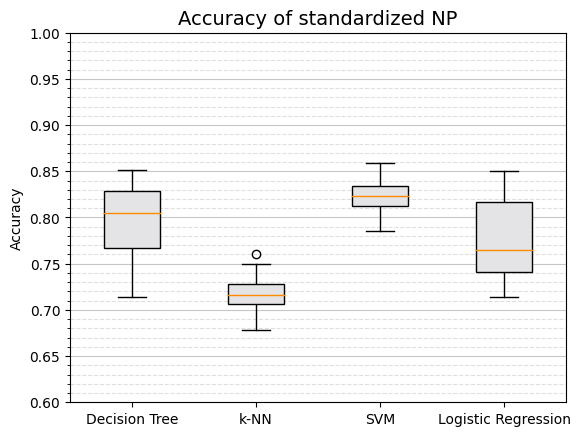

In [156]:
box_plot(NP_best_standardized_ApEn_list, 'Accuracy of standardized NP', 'darkorange')

In [157]:
KT_best_standardized_ApEn_list = multiple_cv_gridSearch(2, 17, KT_X_standardized_ApEn, KT_Y_standardized_ApEn)

In [79]:
for i in range(len(KT_best_standardized_ApEn_list)):
    best_results_display("Standardized KT accuracy (cv = "+ str(KT_best_standardized_ApEn_list[i].iloc[0,3]) + "):", \
                         KT_best_standardized_ApEn_list[i])

Standardized KT accuracy (cv = 2):


,model,best_accuracy,best_params,cv
0,decision_tree,0.833333,"{'criterion': 'gini', 'max_depth': 2, 'max_features': 0.7, 'random_state': 0, 'splitter': 'random'}",2
1,k-NN,0.833333,"{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'uniform'}",2
2,SVM,0.805556,"{'C': 1000, 'gamma': 'auto', 'kernel': 'poly', 'random_state': 0}",2
3,logistic_regression,0.750000,"{'C': 50, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'saga'}",2


Standardized KT accuracy (cv = 3):


,model,best_accuracy,best_params,cv
0,decision_tree,0.750000,"{'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'random_state': 0, 'splitter': 'random'}",3
1,k-NN,0.694444,"{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}",3
2,SVM,0.694444,"{'C': 5, 'gamma': 0.0005, 'kernel': 'rbf', 'random_state': 0}",3
3,logistic_regression,0.694444,"{'C': 1, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",3


Standardized KT accuracy (cv = 4):


,model,best_accuracy,best_params,cv
0,decision_tree,0.750000,"{'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'random_state': 0, 'splitter': 'best'}",4
1,k-NN,0.777778,"{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}",4
2,SVM,0.750000,"{'C': 1000, 'gamma': 0.5, 'kernel': 'sigmoid', 'random_state': 0}",4
3,logistic_regression,0.694444,"{'C': 0.5, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",4


Standardized KT accuracy (cv = 5):


,model,best_accuracy,best_params,cv
0,decision_tree,0.746429,"{'criterion': 'gini', 'max_depth': 3, 'max_features': 0.5, 'random_state': 0, 'splitter': 'random'}",5
1,k-NN,0.803571,"{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'uniform'}",5
2,SVM,0.807143,"{'C': 10, 'gamma': 'auto', 'kernel': 'poly', 'random_state': 0}",5
3,logistic_regression,0.746429,"{'C': 0.1, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'liblinear'}",5


Standardized KT accuracy (cv = 6):


,model,best_accuracy,best_params,cv
0,decision_tree,0.805556,"{'criterion': 'gini', 'max_depth': 1, 'max_features': 0.6, 'random_state': 0, 'splitter': 'random'}",6
1,k-NN,0.805556,"{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}",6
2,SVM,0.750000,"{'C': 500, 'gamma': 0.0001, 'kernel': 'sigmoid', 'random_state': 0}",6
3,logistic_regression,0.777778,"{'C': 100, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear'}",6


Standardized KT accuracy (cv = 7):


,model,best_accuracy,best_params,cv
0,decision_tree,0.752381,"{'criterion': 'gini', 'max_depth': 1, 'max_features': 0.6, 'random_state': 0, 'splitter': 'random'}",7
1,k-NN,0.771429,"{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}",7
2,SVM,0.747619,"{'C': 1000, 'gamma': 'auto', 'kernel': 'poly', 'random_state': 0}",7
3,logistic_regression,0.776190,"{'C': 1, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear'}",7


Standardized KT accuracy (cv = 8):


,model,best_accuracy,best_params,cv
0,decision_tree,0.85625,"{'criterion': 'entropy', 'max_depth': 1, 'max_features': 0.7, 'random_state': 0, 'splitter': 'random'}",8
1,k-NN,0.81250,"{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}",8
2,SVM,0.81250,"{'C': 1, 'gamma': 0.05, 'kernel': 'sigmoid', 'random_state': 0}",8
3,logistic_regression,0.78750,"{'C': 5, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear'}",8


Standardized KT accuracy (cv = 9):


,model,best_accuracy,best_params,cv
0,decision_tree,0.777778,"{'criterion': 'gini', 'max_depth': 1, 'max_features': 0.6, 'random_state': 0, 'splitter': 'random'}",9
1,k-NN,0.805556,"{'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}",9
2,SVM,0.805556,"{'C': 1, 'gamma': 0.1, 'kernel': 'sigmoid', 'random_state': 0}",9
3,logistic_regression,0.777778,"{'C': 5, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear'}",9


Standardized KT accuracy (cv = 10):


,model,best_accuracy,best_params,cv
0,decision_tree,0.800000,"{'criterion': 'gini', 'max_depth': 1, 'max_features': 0.7, 'random_state': 0, 'splitter': 'random'}",10
1,k-NN,0.858333,"{'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}",10
2,SVM,0.808333,"{'C': 50, 'gamma': 0.0001, 'kernel': 'sigmoid', 'random_state': 0}",10
3,logistic_regression,0.783333,"{'C': 50, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear'}",10


Standardized KT accuracy (cv = 11):


,model,best_accuracy,best_params,cv
0,decision_tree,0.833333,"{'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'random_state': 0, 'splitter': 'random'}",11
1,k-NN,0.840909,"{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}",11
2,SVM,0.833333,"{'C': 1000, 'gamma': 'auto', 'kernel': 'poly', 'random_state': 0}",11
3,logistic_regression,0.757576,"{'C': 500, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear'}",11


Standardized KT accuracy (cv = 12):


,model,best_accuracy,best_params,cv
0,decision_tree,0.805556,"{'criterion': 'gini', 'max_depth': 1, 'max_features': 0.6, 'random_state': 0, 'splitter': 'random'}",12
1,k-NN,0.833333,"{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}",12
2,SVM,0.777778,"{'C': 1000, 'gamma': 0.1, 'kernel': 'sigmoid', 'random_state': 0}",12
3,logistic_regression,0.750000,"{'C': 10, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear'}",12


Standardized KT accuracy (cv = 13):


,model,best_accuracy,best_params,cv
0,decision_tree,0.794872,"{'criterion': 'gini', 'max_depth': 3, 'max_features': 0.6, 'random_state': 0, 'splitter': 'random'}",13
1,k-NN,0.833333,"{'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}",13
2,SVM,0.820513,"{'C': 50, 'gamma': 0.0005, 'kernel': 'sigmoid', 'random_state': 0}",13
3,logistic_regression,0.820513,"{'C': 0.5, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",13


Standardized KT accuracy (cv = 14):


,model,best_accuracy,best_params,cv
0,decision_tree,0.809524,"{'criterion': 'gini', 'max_depth': 3, 'max_features': 0.6, 'random_state': 0, 'splitter': 'random'}",14
1,k-NN,0.833333,"{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}",14
2,SVM,0.821429,"{'C': 50, 'gamma': 0.0005, 'kernel': 'sigmoid', 'random_state': 0}",14
3,logistic_regression,0.821429,"{'C': 0.5, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",14


Standardized KT accuracy (cv = 15):


,model,best_accuracy,best_params,cv
0,decision_tree,0.844444,"{'criterion': 'gini', 'max_depth': 3, 'max_features': 0.6, 'random_state': 0, 'splitter': 'random'}",15
1,k-NN,0.844444,"{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}",15
2,SVM,0.855556,"{'C': 10, 'gamma': 0.001, 'kernel': 'rbf', 'random_state': 0}",15
3,logistic_regression,0.833333,"{'C': 0.5, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",15


Standardized KT accuracy (cv = 16):


,model,best_accuracy,best_params,cv
0,decision_tree,0.81250,"{'criterion': 'gini', 'max_depth': 3, 'max_features': 0.6, 'random_state': 0, 'splitter': 'random'}",16
1,k-NN,0.84375,"{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}",16
2,SVM,0.84375,"{'C': 10, 'gamma': 0.001, 'kernel': 'rbf', 'random_state': 0}",16
3,logistic_regression,0.81250,"{'C': 0.5, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",16


Standardized KT accuracy (cv = 17):


,model,best_accuracy,best_params,cv
0,decision_tree,0.823529,"{'criterion': 'gini', 'max_depth': 1, 'max_features': 0.8, 'random_state': 0, 'splitter': 'random'}",17
1,k-NN,0.833333,"{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}",17
2,SVM,0.833333,"{'C': 10, 'gamma': 0.001, 'kernel': 'rbf', 'random_state': 0}",17
3,logistic_regression,0.803922,"{'C': 0.5, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",17


In [80]:
KT_best_standardized_df_ApEn, KT_standardized_cv_min_ApEn, KT_standardized_cv_max_ApEn = best_cv(KT_best_standardized_ApEn_list)

In [81]:
best_results_display("Best standardized KT accuracy ("  \
                     + str(KT_standardized_cv_min_ApEn) + " - " + str(KT_standardized_cv_max_ApEn) + " cv):", \
                     KT_best_standardized_df_ApEn)

Best standardized KT accuracy (2 - 17 cv):


,model,best_accuracy,best_params,cv
0,k-NN,0.858333,"{'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}",10


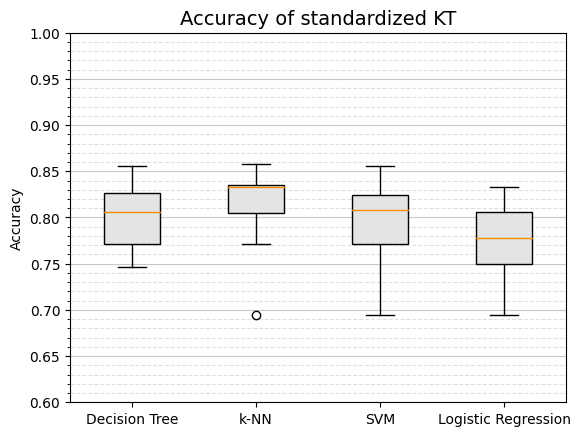

In [158]:
box_plot(KT_best_standardized_ApEn_list, 'Accuracy of standardized KT', 'darkorange')

In [159]:
SU_best_standardized_ApEn_list = multiple_cv_gridSearch(2, 11, SU_X_standardized_ApEn, SU_Y_standardized_ApEn)

In [83]:
for i in range(len(SU_best_standardized_ApEn_list)):
    best_results_display("Standardized SU accuracy (cv = "+ str(SU_best_standardized_ApEn_list[i].iloc[0,3]) + "):", \
                         SU_best_standardized_ApEn_list[i])

Standardized SU accuracy (cv = 2):


,model,best_accuracy,best_params,cv
0,decision_tree,0.847368,"{'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'random_state': 0, 'splitter': 'best'}",2
1,k-NN,0.925000,"{'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}",2
2,SVM,0.896053,"{'C': 10, 'gamma': 1, 'kernel': 'sigmoid', 'random_state': 0}",2
3,logistic_regression,0.872368,"{'C': 0.5, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",2


Standardized SU accuracy (cv = 3):


,model,best_accuracy,best_params,cv
0,decision_tree,0.794872,"{'criterion': 'gini', 'max_depth': None, 'max_features': 0.2, 'random_state': 0, 'splitter': 'best'}",3
1,k-NN,0.769231,"{'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'uniform'}",3
2,SVM,0.846154,"{'C': 1000, 'gamma': 1, 'kernel': 'sigmoid', 'random_state': 0}",3
3,logistic_regression,0.769231,"{'C': 0.1, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",3


Standardized SU accuracy (cv = 4):


,model,best_accuracy,best_params,cv
0,decision_tree,0.897222,"{'criterion': 'gini', 'max_depth': None, 'max_features': 0.6, 'random_state': 0, 'splitter': 'best'}",4
1,k-NN,0.847222,"{'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'uniform'}",4
2,SVM,0.875000,"{'C': 10, 'gamma': 0.01, 'kernel': 'sigmoid', 'random_state': 0}",4
3,logistic_regression,0.875000,"{'C': 1, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'saga'}",4


Standardized SU accuracy (cv = 5):


,model,best_accuracy,best_params,cv
0,decision_tree,0.850000,"{'criterion': 'gini', 'max_depth': None, 'max_features': 0.6, 'random_state': 0, 'splitter': 'best'}",5
1,k-NN,0.867857,"{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}",5
2,SVM,0.871429,"{'C': 1000, 'gamma': 0.0001, 'kernel': 'sigmoid', 'random_state': 0}",5
3,logistic_regression,0.846429,"{'C': 100, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",5


Standardized SU accuracy (cv = 6):


,model,best_accuracy,best_params,cv
0,decision_tree,0.928571,"{'criterion': 'entropy', 'max_depth': None, 'max_features': 0.6, 'random_state': 0, 'splitter': 'best'}",6
1,k-NN,0.845238,"{'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}",6
2,SVM,0.900794,"{'C': 10, 'gamma': 'auto', 'kernel': 'sigmoid', 'random_state': 0}",6
3,logistic_regression,0.801587,"{'C': 0.5, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",6


Standardized SU accuracy (cv = 7):


,model,best_accuracy,best_params,cv
0,decision_tree,0.952381,"{'criterion': 'gini', 'max_depth': None, 'max_features': None, 'random_state': 0, 'splitter': 'random'}",7
1,k-NN,0.871429,"{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}",7
2,SVM,0.847619,"{'C': 1000, 'gamma': 0.01, 'kernel': 'sigmoid', 'random_state': 0}",7
3,logistic_regression,0.814286,"{'C': 1, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'saga'}",7


Standardized SU accuracy (cv = 8):


,model,best_accuracy,best_params,cv
0,decision_tree,0.87500,"{'criterion': 'gini', 'max_depth': None, 'max_features': None, 'random_state': 0, 'splitter': 'random'}",8
1,k-NN,0.89375,"{'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'distance'}",8
2,SVM,0.86875,"{'C': 1000, 'gamma': 'auto', 'kernel': 'rbf', 'random_state': 0}",8
3,logistic_regression,0.89375,"{'C': 0.5, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'saga'}",8


Standardized SU accuracy (cv = 9):


,model,best_accuracy,best_params,cv
0,decision_tree,0.955556,"{'criterion': 'gini', 'max_depth': None, 'max_features': 0.9, 'random_state': 0, 'splitter': 'best'}",9
1,k-NN,0.905556,"{'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}",9
2,SVM,0.905556,"{'C': 10, 'gamma': 0.001, 'kernel': 'rbf', 'random_state': 0}",9
3,logistic_regression,0.877778,"{'C': 0.5, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'saga'}",9


Standardized SU accuracy (cv = 10):


,model,best_accuracy,best_params,cv
0,decision_tree,0.925000,"{'criterion': 'gini', 'max_depth': None, 'max_features': 0.6, 'random_state': 0, 'splitter': 'best'}",10
1,k-NN,0.866667,"{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'uniform'}",10
2,SVM,0.875000,"{'C': 1000, 'gamma': 'auto', 'kernel': 'sigmoid', 'random_state': 0}",10
3,logistic_regression,0.866667,"{'C': 1, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'saga'}",10


Standardized SU accuracy (cv = 11):


,model,best_accuracy,best_params,cv
0,decision_tree,0.909091,"{'criterion': 'gini', 'max_depth': None, 'max_features': 0.9, 'random_state': 0, 'splitter': 'best'}",11
1,k-NN,0.871212,"{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}",11
2,SVM,0.924242,"{'C': 5, 'gamma': 0.01, 'kernel': 'sigmoid', 'random_state': 0}",11
3,logistic_regression,0.871212,"{'C': 0.5, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'saga'}",11


In [84]:
SU_best_standardized_df_ApEn, SU_standardized_cv_min_ApEn, SU_standardized_cv_max_ApEn = best_cv(SU_best_standardized_ApEn_list)

In [85]:
best_results_display("Best standardized SU accuracy ("  \
                     + str(SU_standardized_cv_min_ApEn) + " - " + str(SU_standardized_cv_max_ApEn) + " cv):", \
                     SU_best_standardized_df_ApEn)

Best standardized SU accuracy (2 - 11 cv):


,model,best_accuracy,best_params,cv
0,decision_tree,0.955556,"{'criterion': 'gini', 'max_depth': None, 'max_features': 0.9, 'random_state': 0, 'splitter': 'best'}",9


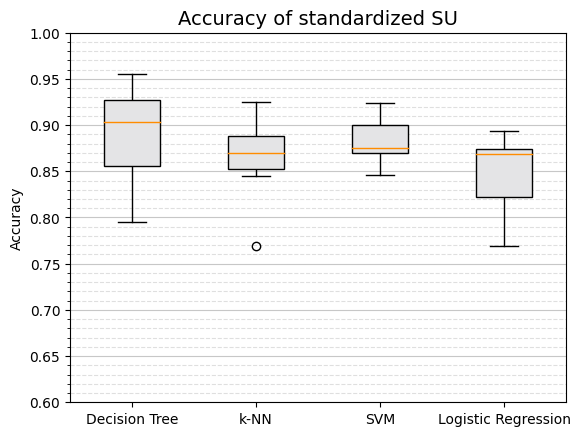

In [161]:
box_plot(SU_best_standardized_ApEn_list, 'Accuracy of standardized SU', "darkorange")

In [224]:
NP_standardized_DT_ApEn_dimRed = Best_result_dimRed(NP_X_standardized_ApEn, NP_Y_standardized_ApEn, 'DT', LeaveOneOut())

In [225]:
best_results_display("Best LOOCV accuracy for standardized NP-DT (dimRed): ", NP_standardized_DT_ApEn_dimRed)

Best LOOCV accuracy for standardized NP-DT (dimRed): 


,model,best_accuracy,best_params,cv,used_features,mi_score
0,decision_tree,0.964286,"{'criterion': 'gini', 'max_depth': None, 'max_features': 0.7, 'random_state': 0, 'splitter': 'random'}",LOOCV,"[0, 3, 10, 11, 13, 17, 18, 22, 29, 30, 34, 35, 36, 41, 43, 47, 48, 54, 55, 57, 61, 62, 67, 68, 70, 71, 72, 74]",0.02


In [227]:
NP_standardized_DT_ApEn_dimRed = Best_result_dimRed(NP_X_standardized_ApEn, NP_Y_standardized_ApEn, 'DT', 2)

In [229]:
best_results_display("Best cv = 2 accuracy for standardized NP-DT (dimRed): ", NP_standardized_DT_ApEn_dimRed)

Best cv = 2 accuracy for standardized NP-DT (dimRed): 


,model,best_accuracy,best_params,cv,used_features,mi_score
0,decision_tree,0.892857,"{'criterion': 'gini', 'max_depth': None, 'max_features': 0.8, 'random_state': 0, 'splitter': 'random'}",2,"[22, 35, 36, 54, 55]",0.15


In [162]:
#List rows: DT, k-NN, SVM, LR
NP_standardized_accuracies_lists_dimRed = [
    [0.892857, 0.855556, 0.928571, 0.933333, 0.933333, 0.928571, 0.96875, 0.962963],
    [0.892857, 0.892593, 0.821429, 0.86, 0.891667, 0.857143, 0.9375, 0.925926],
    [0.857143, 0.896296, 0.857143, 0.86, 0.925, 0.892857, 0.895833, 0.925926],
    [0.821429, 0.714815, 0.821429, 0.82, 0.9, 0.857143, 0.864583, 0.888889]
]

KT_standardized_accuracies_lists_dimRed = [
    [0.833333, 0.833333, 0.888889, 0.889286, 0.861111, 0.885714, 0.86875, 0.888889, 0.875, 0.871212, 0.916667, 0.884615, 0.892857, 0.9, 0.90625, 0.892157],
    [0.861111, 0.805556, 0.833333, 0.860714, 0.861111, 0.890476, 0.89375, 0.888889, 0.9, 0.901515, 0.888889, 0.897436, 0.904762, 0.911111, 0.90625, 0.892157],
    [0.805556, 0.805556, 0.833333, 0.860714, 0.861111, 0.861905, 0.86875, 0.861111, 0.875, 0.871212, 0.861111, 0.897436, 0.904762, 0.9, 0.895833, 0.892157],
    [0.777778, 0.777778, 0.805556, 0.889286, 0.805556, 0.861905, 0.9, 0.888889, 0.9, 0.901515, 0.861111, 0.871795, 0.880952, 0.888889, 0.90625, 0.892157]
]

SU_standardized_accuracies_lists_dimRed = [
    [0.898684, 0.923077, 0.95, 0.975, 0.952381, 0.952381, 0.95, 0.977778, 1.0, 0.977273],
    [0.95, 0.846154, 0.95, 0.946429, 0.928571, 0.952381, 0.95, 0.955556, 0.95, 0.931818],
    [0.975, 0.897436, 0.95, 0.95, 0.97619, 0.97619, 0.975, 0.977778, 0.975, 0.977273],
    [0.975, 0.923077, 0.95, 0.95, 0.952381, 0.952381, 0.95, 0.955556, 0.95, 0.954545]
]

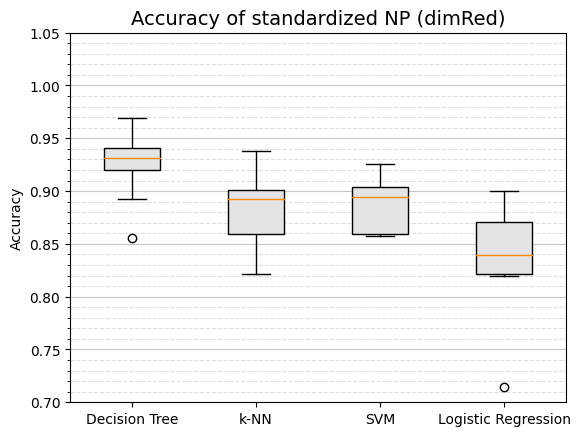

In [163]:
Box_plot_dimRed(NP_standardized_accuracies_lists_dimRed, "Accuracy of standardized NP (dimRed)", "darkorange")

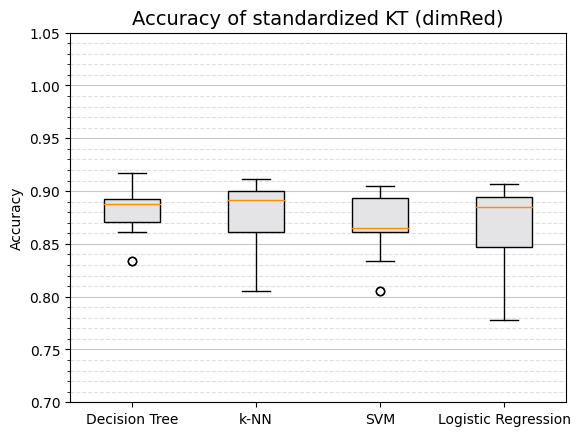

In [164]:
Box_plot_dimRed(KT_standardized_accuracies_lists_dimRed, "Accuracy of standardized KT (dimRed)", "darkorange")

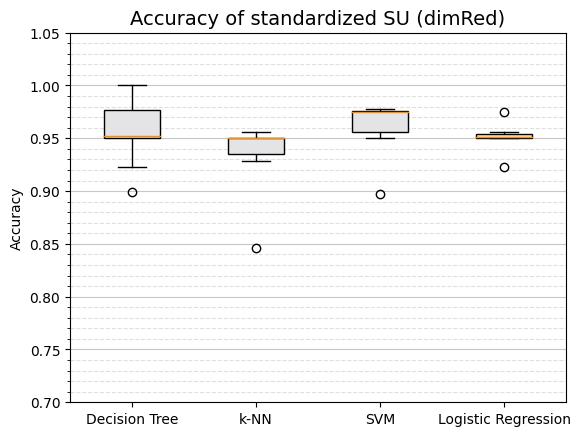

In [165]:
Box_plot_dimRed(SU_standardized_accuracies_lists_dimRed, "Accuracy of standardized SU (dimRed)", "darkorange")

In [ ]:
######################################################### Gesture #################################################################

In [166]:
KT_gesture_files = glob.glob('Gestures/KT/*.csv')
NP_gesture_files = glob.glob('Gestures/NP/*.csv')
SU_gesture_files = glob.glob('Gestures/SU/*.csv')

KT_gesture_files = sorted(KT_gesture_files)
NP_gesture_files = sorted(NP_gesture_files)
SU_gesture_files = sorted(SU_gesture_files)

KT_gesture_df_list = []
NP_gesture_df_list = []
SU_gesture_df_list = []

In [167]:
Append_dataframe(KT_gesture_files, KT_gesture_df_list)
Append_dataframe(NP_gesture_files, NP_gesture_df_list)
Append_dataframe(SU_gesture_files, SU_gesture_df_list)

In [168]:
KT_gesture_df_list[0]

,Start_frame,End_frame,Gesture
0,45,85,G12
1,86,185,G13
2,186,291,G13
3,292,369,G14
4,370,783,G15
5,784,1259,G12
6,1260,1329,G13
7,1330,1487,G14
8,1488,1626,G15
9,1627,1735,G11


In [169]:
#Suturing = ['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G8', 'G9', 'G10', 'G11']
#Knot-tying = ['G1', 'G11', 'G12', 'G13', 'G14', 'G15']
#Needle-passing = ['G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G8','G11']

Suturing_gestures = [1, 2, 3, 4, 5, 6, 8, 9, 10, 11]
Knot_Tying_gestures = [1 , 11 , 12 , 13 , 14 , 15]
Needle_Passing_gestures = [1, 2, 3, 4, 5, 6, 8, 11]

In [170]:
import math

In [172]:
def Gesture_split(gestures_idx, gesture_df_list, df_list, GRS_class):    
    #None * 15: A list of length 15 with None values for indexability
    gestures = [None] * 15
    final_gestures = [None] * 15
    
    for j in range(0,15):
        final_gestures[j] = pd.DataFrame(columns = header)
        final_gestures[j]["GRS"] = ""
    
    
    for sebesz_idx in range(len(df_list)):
        for o in range(0,15):
            gestures[o] = pd.DataFrame(columns = header)
    
        for i in range(len(gesture_df_list[sebesz_idx])):
            #-1: DataFrame indexed from 0
            start = gesture_df_list[sebesz_idx].iloc[i, 0] - 1
            end = gesture_df_list[sebesz_idx].iloc[i, 1]

            for k in gestures_idx:
                if(gesture_df_list[sebesz_idx].iloc[i, 2] == 'G' + str(k)):
                    #k-1: gestures_idx starts with 1, while gestures DataFrame starts with 0
                    gestures[k - 1] = gestures[k - 1].append(df_list[sebesz_idx].iloc[start:end, :])


        #ApEn
        ApEn_rows = []
        for l in range(len(gestures)):
            #Only transform it if the DataFrame is not empty.
            isempty = gestures[l].empty

            if(isempty == False):
                for m in range(len(gestures[l].columns)):
                    ApEn_rows.append(ant.app_entropy(gestures[l].iloc[:, m]))

                ApEn_series = pd.Series(ApEn_rows, index = gestures[l].columns)

                #l: Data is placed in the same index as the gesture index (G12 gesture -> goes to the 12th DataFrame).
                final_gestures[l] = final_gestures[l].append(ApEn_series, ignore_index=True)

                ApEn_rows.clear()
                ApEn_series.empty

        #Attaching GRS
        for n in range(len(final_gestures)):
            final_gesture_isempty = final_gestures[n].empty
            
            #Attaching GRS to the newly added row
            #iloc[-1, -1]: Last row, last column, which represents the GRS
            if(final_gesture_isempty == False and math.isnan(final_gestures[n].iloc[-1, -1])):
                final_gestures[n].iloc[-1, -1] = GRS_class.iloc[sebesz_idx, 2]
         
    return final_gestures

In [173]:
KT_final_gestures_ApEn = Gesture_split(Knot_Tying_gestures, KT_gesture_df_list, KT_df_list, KT_class)

In [174]:
KT_final_gestures_ApEn[0]

,Left_MTM_pos_x,Left_MTM_pos_y,Left_MTM_pos_z,Left_MTM_rotM_1,Left_MTM_rotM_2,Left_MTM_rotM_3,Left_MTM_rotM_4,Left_MTM_rotM_5,Left_MTM_rotM_6,Left_MTM_rotM_7,...,PSM2_rotM_8,PSM2_rotM_9,PSM2_linV_x,PSM2_linV_y,PSM2_linV_z,PSM2_rotV_alpha,PSM2_rotV_beta,PSM2_rotV_gamma,PSM2_gripper_angleV,GRS
0,0.324443,0.097245,0.068500,0.268567,0.082649,0.084797,0.137132,0.136331,0.088800,0.142162,...,0.236421,0.084797,0.405582,0.643033,0.501507,0.473113,0.115010,0.232644,0.082524,1.0
1,0.258184,0.062850,0.017872,0.064330,0.012001,0.008613,0.046149,0.011339,0.169379,0.068728,...,0.184448,0.014512,0.220871,0.080065,0.078583,0.179075,0.307902,0.331461,0.093372,1.0
2,0.163668,0.175152,0.098821,0.093237,0.072906,0.058464,0.074887,0.079658,0.015476,0.071573,...,0.155002,0.065247,0.408790,0.315002,0.312925,0.322006,0.211501,0.193722,0.266354,1.0
3,0.202893,0.095088,0.014216,0.061598,0.039546,0.149452,0.087522,0.084432,0.051826,0.106812,...,0.094866,0.062344,0.407269,0.210079,0.236098,0.328206,0.309273,0.224449,0.227416,1.0
4,0.121264,0.033570,0.046400,0.031040,0.040280,0.040408,0.061645,0.038721,0.038231,0.074856,...,0.049965,0.084255,0.284387,0.234868,0.205399,0.173425,0.094224,0.190947,0.040355,0.0
5,0.111563,0.058773,0.029166,0.026587,0.026050,0.024034,0.073503,0.030823,0.041708,0.103570,...,0.034549,0.041346,0.325651,0.352044,0.346075,0.371867,0.323600,0.335522,0.221951,1.0
6,0.056164,0.027684,0.015589,0.034712,0.106123,0.091319,0.067549,0.083238,0.081727,0.065671,...,0.038833,0.066597,0.321506,0.175833,0.157983,0.131413,0.191087,0.167805,0.103131,0.0
7,0.201011,0.010819,0.012720,0.056685,0.049795,0.110264,0.101317,0.113275,0.056728,0.096390,...,0.033363,0.060794,0.074497,0.143741,0.135308,0.218101,0.165282,0.173834,0.005953,1.0
8,0.053904,0.090647,0.055972,0.118981,0.112181,0.154120,0.102904,0.180607,0.128003,0.102097,...,0.102420,0.109964,0.213347,0.390955,0.304915,0.354444,0.263178,0.294364,0.094484,1.0
9,0.172985,0.045349,0.099557,0.136751,0.109679,0.054100,0.113403,0.111987,0.129200,0.064956,...,0.191033,0.085019,0.416595,0.188714,0.147111,0.161010,0.423138,0.483691,0.085228,1.0


In [175]:
NP_final_gestures_ApEn = Gesture_split(Needle_Passing_gestures, NP_gesture_df_list, NP_df_list, NP_class)

In [176]:
NP_final_gestures_ApEn[0]

,Left_MTM_pos_x,Left_MTM_pos_y,Left_MTM_pos_z,Left_MTM_rotM_1,Left_MTM_rotM_2,Left_MTM_rotM_3,Left_MTM_rotM_4,Left_MTM_rotM_5,Left_MTM_rotM_6,Left_MTM_rotM_7,...,PSM2_rotM_8,PSM2_rotM_9,PSM2_linV_x,PSM2_linV_y,PSM2_linV_z,PSM2_rotV_alpha,PSM2_rotV_beta,PSM2_rotV_gamma,PSM2_gripper_angleV,GRS
0,0.082200,0.083706,0.073556,0.111288,0.033006,0.060569,0.027569,0.034601,0.066871,0.038984,...,0.074964,0.045755,0.458528,0.511612,0.405717,0.462408,0.578762,0.625891,0.054807,0.0
1,0.049700,0.175427,0.104603,0.055948,0.198399,0.042356,0.080422,0.080677,0.143006,0.227344,...,0.047121,0.040153,0.436184,0.510720,0.379122,0.265976,0.323464,0.276111,0.048914,0.0
2,0.330320,0.049043,0.065385,0.172673,0.201934,0.050017,0.202567,0.242964,0.049325,0.263389,...,0.204035,0.145584,0.251641,0.611000,0.467216,0.229201,0.537279,0.540783,0.017925,0.0
3,0.063245,0.271783,0.152117,0.107990,0.255323,0.150461,0.085459,0.114881,0.147825,0.171310,...,0.131797,0.249664,0.306397,0.526229,0.377954,0.372135,0.577747,0.546099,0.109421,1.0
4,0.236020,0.245251,0.355127,0.567852,0.435929,0.532521,0.502741,0.469652,0.364230,0.427901,...,0.372701,0.504750,0.416744,0.388331,0.388331,0.129488,0.129488,0.129488,0.257043,0.0
5,0.020010,0.155349,0.083370,0.200221,0.140505,0.134350,0.143450,0.143926,0.014416,0.106543,...,0.079019,0.076995,0.245879,0.473437,0.278212,0.150530,0.327341,0.408881,0.048704,0.0
6,0.099502,0.089139,0.174860,0.268406,0.273380,0.065079,0.248482,0.265485,0.098109,0.137993,...,0.298937,0.155947,0.333795,0.455104,0.251630,0.084803,0.342299,0.396339,0.192497,0.0
7,0.123830,0.051828,0.091080,0.495714,0.222219,0.008155,0.302132,0.202577,0.012078,0.067115,...,0.119773,0.012882,0.204249,0.239358,0.476829,0.172943,0.425240,0.437234,0.071614,0.0
8,0.106091,0.287209,0.225013,0.105221,0.099246,0.025512,0.113488,0.107079,0.050036,0.121229,...,0.168566,0.045127,0.375806,0.791004,0.819884,0.138817,0.365338,0.150325,0.176151,0.0
9,0.035428,0.081504,0.068645,0.028685,0.089269,0.067143,0.063885,0.072613,0.048479,0.094271,...,0.058552,0.044975,0.482900,0.407107,0.402105,0.220003,0.425816,0.480213,0.182572,0.0


In [177]:
SU_final_gestures_ApEn = Gesture_split(Suturing_gestures, SU_gesture_df_list, SU_df_list, SU_class)

In [178]:
SU_final_gestures_ApEn[0]

,Left_MTM_pos_x,Left_MTM_pos_y,Left_MTM_pos_z,Left_MTM_rotM_1,Left_MTM_rotM_2,Left_MTM_rotM_3,Left_MTM_rotM_4,Left_MTM_rotM_5,Left_MTM_rotM_6,Left_MTM_rotM_7,...,PSM2_rotM_8,PSM2_rotM_9,PSM2_linV_x,PSM2_linV_y,PSM2_linV_z,PSM2_rotV_alpha,PSM2_rotV_beta,PSM2_rotV_gamma,PSM2_gripper_angleV,GRS
0,0.106687,0.100803,0.033490,0.213126,0.123804,0.072161,0.161643,0.134291,0.259916,0.097181,...,0.222496,0.096716,0.533385,0.616240,0.292913,0.417862,0.351348,0.405123,0.137717,0.0
1,0.078125,0.072761,0.220073,0.214979,0.350016,0.191558,0.113739,0.262355,0.316656,0.145351,...,0.173020,0.190261,0.437264,0.509617,0.603804,0.264366,0.537031,0.524974,0.489853,1.0
2,0.256799,0.255537,0.087904,0.152666,0.167124,0.037428,0.157529,0.136586,0.147539,0.164718,...,0.141129,0.052417,0.469484,0.606315,0.384515,0.323240,0.240613,0.415723,0.138978,0.0
3,0.261658,0.185194,0.220940,0.344444,0.344444,0.126824,0.264804,0.264804,0.356540,0.362533,...,0.264331,0.127682,0.392924,0.655090,0.528130,0.417571,0.585363,0.719941,0.032901,0.0
4,0.033269,0.171898,-0.105361,0.221857,0.142618,0.221857,0.033269,0.171898,0.221857,0.221857,...,0.221857,0.221857,0.378629,0.340995,0.276464,0.174582,0.237443,0.174582,0.171898,0.0
5,0.141130,0.127185,0.101299,0.044558,0.068619,0.141911,0.055861,0.107545,0.144009,0.238811,...,0.085019,0.173741,0.307640,0.084398,0.212140,0.120998,0.536673,0.326597,0.223069,1.0
6,0.152489,0.211091,0.086668,0.125885,0.186814,0.023919,0.197037,0.192630,0.201470,0.225839,...,0.068590,0.024385,0.568466,0.555755,0.315727,0.315543,0.296300,0.392343,0.315337,1.0
7,0.105585,0.103853,0.023692,0.037868,0.031429,0.044360,0.024932,0.028671,0.094975,0.151576,...,0.026901,0.032076,0.577451,0.175686,0.367828,0.334994,0.276585,0.276585,0.251021,1.0
8,0.259543,0.124021,0.142621,0.140446,0.107070,0.105033,0.128032,0.169391,0.067755,0.371769,...,0.205429,0.145184,0.214094,0.376342,0.377653,0.289157,0.331368,0.368142,0.367259,1.0
9,0.108675,0.033246,0.064256,0.078641,0.084590,0.080959,0.135934,0.135934,0.087011,0.082089,...,0.084590,0.080959,0.227886,0.048185,0.048853,0.462811,0.344530,0.483640,0.013490,0.0


In [182]:
def gesture_features_target(final_gestures):
    gestures_X = []
    gestures_Y = []
    
    for i in range(len(final_gestures)):
        if(final_gestures[i].size != 0):
            temp_gestures_X, temp_gestures_Y = Features_target(final_gestures[i])

            gestures_X.append(temp_gestures_X)
            gestures_Y.append(temp_gestures_Y)
    
    return gestures_X, gestures_Y

In [183]:
KT_gestures_X_ApEn, KT_gestures_Y_ApEn = gesture_features_target(KT_final_gestures_ApEn)

In [184]:
NP_gestures_X_ApEn, NP_gestures_Y_ApEn = gesture_features_target(NP_final_gestures_ApEn)

In [185]:
#There is very little data in the 10th gesture of SU which makes it difficult for cross-validation to split it into groups. 
#Therefore, it will be removed.
SU_final_gestures_ApEn[9]

,Left_MTM_pos_x,Left_MTM_pos_y,Left_MTM_pos_z,Left_MTM_rotM_1,Left_MTM_rotM_2,Left_MTM_rotM_3,Left_MTM_rotM_4,Left_MTM_rotM_5,Left_MTM_rotM_6,Left_MTM_rotM_7,...,PSM2_rotM_8,PSM2_rotM_9,PSM2_linV_x,PSM2_linV_y,PSM2_linV_z,PSM2_rotV_alpha,PSM2_rotV_beta,PSM2_rotV_gamma,PSM2_gripper_angleV,GRS
0,0.045954,0.076635,0.044003,0.051929,0.067564,0.102487,0.038424,0.065732,0.109373,0.063012,...,0.034483,0.077313,0.377116,0.420081,0.390571,0.190177,0.287687,0.337905,0.061263,0.0
1,0.090065,0.077766,0.135673,0.078044,0.125465,0.075745,0.070163,0.070339,0.198349,0.143197,...,0.070236,0.082799,0.510626,0.480103,0.428252,0.362668,0.462008,0.309708,0.158044,0.0
2,0.116981,0.169301,0.070642,0.105730,0.046083,0.115963,0.034676,0.174290,0.077634,0.125643,...,0.219787,0.121052,0.722729,0.815360,0.872451,0.703871,0.747623,0.662382,0.250956,1.0


In [186]:
Suturing_gestures = [1, 2, 3, 4, 5, 6, 8, 9, 11]
SU_final_gestures_ApEn[9] = pd.DataFrame(columns = header)
SU_final_gestures_ApEn[9]

,Left_MTM_pos_x,Left_MTM_pos_y,Left_MTM_pos_z,Left_MTM_rotM_1,Left_MTM_rotM_2,Left_MTM_rotM_3,Left_MTM_rotM_4,Left_MTM_rotM_5,Left_MTM_rotM_6,Left_MTM_rotM_7,...,PSM2_rotM_7,PSM2_rotM_8,PSM2_rotM_9,PSM2_linV_x,PSM2_linV_y,PSM2_linV_z,PSM2_rotV_alpha,PSM2_rotV_beta,PSM2_rotV_gamma,PSM2_gripper_angleV


In [187]:
SU_gestures_X_ApEn, SU_gestures_Y_ApEn = gesture_features_target(SU_final_gestures_ApEn)

In [188]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from pandas import option_context
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [190]:
NP_G_LOOCV_best_list_ApEn = []

for i in range(len(NP_gestures_X_ApEn)):
    NP_G_LOOCV_best_ApEn = best_results(NP_gestures_X_ApEn[i], NP_gestures_Y_ApEn[i], LeaveOneOut())
    
    NP_G_LOOCV_best_list_ApEn.append(NP_G_LOOCV_best_ApEn)

In [105]:
for i in range(len(NP_G_LOOCV_best_list_ApEn)):
    best_results_display("NP: G" + str(Needle_Passing_gestures[i]) + " gesture (LOOCV):", \
                         NP_G_LOOCV_best_list_ApEn[i])

NP: G1 gesture (LOOCV):


,model,best_accuracy,best_params,cv
0,decision_tree,0.814815,"{'criterion': 'entropy', 'max_depth': None, 'max_features': 0.3, 'random_state': 0, 'splitter': 'best'}",LOOCV
1,k-NN,0.740741,"{'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}",LOOCV
2,SVM,0.740741,"{'C': 50, 'gamma': 0.5, 'kernel': 'sigmoid', 'random_state': 0}",LOOCV
3,logistic_regression,0.703704,"{'C': 0.1, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",LOOCV


NP: G2 gesture (LOOCV):


,model,best_accuracy,best_params,cv
0,decision_tree,0.785714,"{'criterion': 'gini', 'max_depth': None, 'max_features': 0.5, 'random_state': 0, 'splitter': 'best'}",LOOCV
1,k-NN,0.750000,"{'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}",LOOCV
2,SVM,0.678571,"{'C': 1000, 'gamma': 1, 'kernel': 'sigmoid', 'random_state': 0}",LOOCV
3,logistic_regression,0.678571,"{'C': 0.1, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",LOOCV


NP: G3 gesture (LOOCV):


,model,best_accuracy,best_params,cv
0,decision_tree,0.821429,"{'criterion': 'gini', 'max_depth': 1, 'max_features': None, 'random_state': 0, 'splitter': 'best'}",LOOCV
1,k-NN,0.678571,"{'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}",LOOCV
2,SVM,0.821429,"{'C': 50, 'gamma': 0.1, 'kernel': 'sigmoid', 'random_state': 0}",LOOCV
3,logistic_regression,0.750000,"{'C': 50, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear'}",LOOCV


NP: G4 gesture (LOOCV):


,model,best_accuracy,best_params,cv
0,decision_tree,0.821429,"{'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'random_state': 0, 'splitter': 'best'}",LOOCV
1,k-NN,0.678571,"{'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'uniform'}",LOOCV
2,SVM,0.785714,"{'C': 1000, 'gamma': 'auto', 'kernel': 'linear', 'random_state': 0}",LOOCV
3,logistic_regression,0.785714,"{'C': 5, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear'}",LOOCV


NP: G5 gesture (LOOCV):


,model,best_accuracy,best_params,cv
0,decision_tree,0.916667,"{'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'random_state': 0, 'splitter': 'random'}",LOOCV
1,k-NN,0.666667,"{'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}",LOOCV
2,SVM,0.666667,"{'C': 1000, 'gamma': 'auto', 'kernel': 'poly', 'random_state': 0}",LOOCV
3,logistic_regression,0.666667,"{'C': 0.1, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",LOOCV


NP: G6 gesture (LOOCV):


,model,best_accuracy,best_params,cv
0,decision_tree,0.821429,"{'criterion': 'gini', 'max_depth': 3, 'max_features': 0.1, 'random_state': 0, 'splitter': 'best'}",LOOCV
1,k-NN,0.714286,"{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}",LOOCV
2,SVM,0.821429,"{'C': 1000, 'gamma': 0.05, 'kernel': 'sigmoid', 'random_state': 0}",LOOCV
3,logistic_regression,0.750000,"{'C': 10, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear'}",LOOCV


NP: G8 gesture (LOOCV):


,model,best_accuracy,best_params,cv
0,decision_tree,0.9,"{'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'random_state': 0, 'splitter': 'random'}",LOOCV
1,k-NN,0.7,"{'metric': 'euclidean', 'n_neighbors': 10, 'weights': 'uniform'}",LOOCV
2,SVM,0.7,"{'C': 1000, 'gamma': 'auto', 'kernel': 'poly', 'random_state': 0}",LOOCV
3,logistic_regression,0.7,"{'C': 0.1, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",LOOCV


NP: G11 gesture (LOOCV):


,model,best_accuracy,best_params,cv
0,decision_tree,0.84,"{'criterion': 'entropy', 'max_depth': 4, 'max_features': 0.3, 'random_state': 0, 'splitter': 'random'}",LOOCV
1,k-NN,0.68,"{'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}",LOOCV
2,SVM,0.72,"{'C': 1000, 'gamma': 'auto', 'kernel': 'rbf', 'random_state': 0}",LOOCV
3,logistic_regression,0.68,"{'C': 0.1, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",LOOCV


In [192]:
KT_G_LOOCV_best_list_ApEn = []

for i in range(len(KT_gestures_X_ApEn)):
    KT_G_LOOCV_best_ApEn = best_results(KT_gestures_X_ApEn[i], KT_gestures_Y_ApEn[i], LeaveOneOut())
    
    KT_G_LOOCV_best_list_ApEn.append(KT_G_LOOCV_best_ApEn)

In [233]:
for i in range(len(KT_G_LOOCV_best_list_ApEn)):
    best_results_display("KT: G" + str(Knot_Tying_gestures[i]) + " gesture (LOOCV):", KT_G_LOOCV_best_list_ApEn[i])

KT: G1 gesture (LOOCV):


,model,best_accuracy,best_params,cv
0,decision_tree,0.736842,"{'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'random_state': 0, 'splitter': 'best'}",LOOCV
1,k-NN,0.736842,"{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}",LOOCV
2,SVM,0.789474,"{'C': 50, 'gamma': 'auto', 'kernel': 'rbf', 'random_state': 0}",LOOCV
3,logistic_regression,0.736842,"{'C': 1, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",LOOCV


KT: G11 gesture (LOOCV):


,model,best_accuracy,best_params,cv
0,decision_tree,0.750000,"{'criterion': 'entropy', 'max_depth': 4, 'max_features': 0.8, 'random_state': 0, 'splitter': 'random'}",LOOCV
1,k-NN,0.777778,"{'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}",LOOCV
2,SVM,0.750000,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'poly', 'random_state': 0}",LOOCV
3,logistic_regression,0.694444,"{'C': 50, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",LOOCV


KT: G12 gesture (LOOCV):


,model,best_accuracy,best_params,cv
0,decision_tree,0.828571,"{'criterion': 'gini', 'max_depth': 1, 'max_features': 0.2, 'random_state': 0, 'splitter': 'best'}",LOOCV
1,k-NN,0.857143,"{'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'distance'}",LOOCV
2,SVM,0.828571,"{'C': 50, 'gamma': 'auto', 'kernel': 'sigmoid', 'random_state': 0}",LOOCV
3,logistic_regression,0.800000,"{'C': 0.5, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'liblinear'}",LOOCV


KT: G13 gesture (LOOCV):


,model,best_accuracy,best_params,cv
0,decision_tree,0.861111,"{'criterion': 'gini', 'max_depth': 2, 'max_features': 0.5, 'random_state': 0, 'splitter': 'random'}",LOOCV
1,k-NN,0.805556,"{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}",LOOCV
2,SVM,0.833333,"{'C': 1, 'gamma': 0.1, 'kernel': 'poly', 'random_state': 0}",LOOCV
3,logistic_regression,0.833333,"{'C': 500, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'liblinear'}",LOOCV


KT: G14 gesture (LOOCV):


,model,best_accuracy,best_params,cv
0,decision_tree,0.805556,"{'criterion': 'gini', 'max_depth': 3, 'max_features': 0.6, 'random_state': 0, 'splitter': 'random'}",LOOCV
1,k-NN,0.805556,"{'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}",LOOCV
2,SVM,0.750000,"{'C': 5, 'gamma': 0.5, 'kernel': 'rbf', 'random_state': 0}",LOOCV
3,logistic_regression,0.694444,"{'C': 50, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear'}",LOOCV


KT: G15 gesture (LOOCV):


,model,best_accuracy,best_params,cv
0,decision_tree,0.888889,"{'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'random_state': 0, 'splitter': 'best'}",LOOCV
1,k-NN,0.861111,"{'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}",LOOCV
2,SVM,0.861111,"{'C': 0.5, 'gamma': 1, 'kernel': 'rbf', 'random_state': 0}",LOOCV
3,logistic_regression,0.833333,"{'C': 0.5, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",LOOCV


In [193]:
SU_G_LOOCV_best_list_ApEn = []

for i in range(len(SU_gestures_X_ApEn)):
    SU_G_LOOCV_best_ApEn = best_results(SU_gestures_X_ApEn[i], SU_gestures_Y_ApEn[i], LeaveOneOut())
    
    SU_G_LOOCV_best_list_ApEn.append(SU_G_LOOCV_best_ApEn)

In [235]:
for i in range(len(SU_G_LOOCV_best_list_ApEn)):
    best_results_display("SU: G" + str(Suturing_gestures[i]) + " gesture (LOOCV):", SU_G_LOOCV_best_list_ApEn[i])

SU: G1 gesture (LOOCV):


,model,best_accuracy,best_params,cv
0,decision_tree,0.827586,"{'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'random_state': 0, 'splitter': 'random'}",LOOCV
1,k-NN,0.758621,"{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}",LOOCV
2,SVM,0.896552,"{'C': 500, 'gamma': 1, 'kernel': 'sigmoid', 'random_state': 0}",LOOCV
3,logistic_regression,0.689655,"{'C': 0.1, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",LOOCV


SU: G2 gesture (LOOCV):


,model,best_accuracy,best_params,cv
0,decision_tree,0.871795,"{'criterion': 'entropy', 'max_depth': 2, 'max_features': 0.2, 'random_state': 0, 'splitter': 'best'}",LOOCV
1,k-NN,0.846154,"{'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'uniform'}",LOOCV
2,SVM,0.846154,"{'C': 5, 'gamma': 1, 'kernel': 'rbf', 'random_state': 0}",LOOCV
3,logistic_regression,0.846154,"{'C': 10, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",LOOCV


SU: G3 gesture (LOOCV):


,model,best_accuracy,best_params,cv
0,decision_tree,0.948718,"{'criterion': 'gini', 'max_depth': None, 'max_features': None, 'random_state': 0, 'splitter': 'random'}",LOOCV
1,k-NN,0.820513,"{'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}",LOOCV
2,SVM,0.820513,"{'C': 500, 'gamma': 'auto', 'kernel': 'rbf', 'random_state': 0}",LOOCV
3,logistic_regression,0.871795,"{'C': 1000, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear'}",LOOCV


SU: G4 gesture (LOOCV):


,model,best_accuracy,best_params,cv
0,decision_tree,0.871795,"{'criterion': 'entropy', 'max_depth': 2, 'max_features': 0.2, 'random_state': 0, 'splitter': 'best'}",LOOCV
1,k-NN,0.820513,"{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}",LOOCV
2,SVM,0.794872,"{'C': 5, 'gamma': 0.5, 'kernel': 'rbf', 'random_state': 0}",LOOCV
3,logistic_regression,0.769231,"{'C': 500, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",LOOCV


SU: G5 gesture (LOOCV):


,model,best_accuracy,best_params,cv
0,decision_tree,0.916667,"{'criterion': 'gini', 'max_depth': 4, 'max_features': 0.7, 'random_state': 0, 'splitter': 'random'}",LOOCV
1,k-NN,0.750000,"{'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}",LOOCV
2,SVM,0.777778,"{'C': 10, 'gamma': 'scale', 'kernel': 'sigmoid', 'random_state': 0}",LOOCV
3,logistic_regression,0.750000,"{'C': 0.1, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",LOOCV


SU: G6 gesture (LOOCV):


,model,best_accuracy,best_params,cv
0,decision_tree,0.846154,"{'criterion': 'gini', 'max_depth': None, 'max_features': 0.5, 'random_state': 0, 'splitter': 'random'}",LOOCV
1,k-NN,0.846154,"{'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}",LOOCV
2,SVM,0.794872,"{'C': 10, 'gamma': 0.5, 'kernel': 'rbf', 'random_state': 0}",LOOCV
3,logistic_regression,0.743590,"{'C': 5, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'saga'}",LOOCV


SU: G8 gesture (LOOCV):


,model,best_accuracy,best_params,cv
0,decision_tree,0.848485,"{'criterion': 'entropy', 'max_depth': 3, 'max_features': 'log2', 'random_state': 0, 'splitter': 'best'}",LOOCV
1,k-NN,0.727273,"{'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}",LOOCV
2,SVM,0.757576,"{'C': 5, 'gamma': 'scale', 'kernel': 'sigmoid', 'random_state': 0}",LOOCV
3,logistic_regression,0.696970,"{'C': 0.1, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",LOOCV


SU: G9 gesture (LOOCV):


,model,best_accuracy,best_params,cv
0,decision_tree,0.666667,"{'criterion': 'gini', 'max_depth': None, 'max_features': 0.1, 'random_state': 0, 'splitter': 'best'}",LOOCV
1,k-NN,0.555556,"{'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}",LOOCV
2,SVM,0.888889,"{'C': 500, 'gamma': 'scale', 'kernel': 'sigmoid', 'random_state': 0}",LOOCV
3,logistic_regression,0.555556,"{'C': 5, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",LOOCV


SU: G11 gesture (LOOCV):


,model,best_accuracy,best_params,cv
0,decision_tree,0.871795,"{'criterion': 'gini', 'max_depth': 1, 'max_features': 0.4, 'random_state': 0, 'splitter': 'best'}",LOOCV
1,k-NN,0.820513,"{'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'uniform'}",LOOCV
2,SVM,0.794872,"{'C': 50, 'gamma': 0.1, 'kernel': 'sigmoid', 'random_state': 0}",LOOCV
3,logistic_regression,0.769231,"{'C': 5, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear'}",LOOCV


In [ ]:
##################################################### Muliple K-folds #############################################################

In [194]:
#Prevent the return of None for a specific gesture if the cv_start is provided correctly
def multiple_G_and_cv(cv_start, cv_end, gestures, gestures_X, gestures_Y):
    best_G_list = []
    cv_end_original = cv_end
    
    for i in range(len(gestures_Y)):
        #Do not start the first row with a line break
        if(i == 0):
            print("G" + str(gestures[i]) + " gesture:")
        else:
            print("\nG" + str(gestures[i]) + " gesture:")
            
        #The value of cv_end changes within the if statement -> restore it to the original value
        cv_end = cv_end_original
        best_G = multiple_cv_gridSearch(cv_start, cv_end, gestures_X[i], gestures_Y[i])
        
        #The value of cv_end is incorrect (possibly too large)
        if(best_G == None and cv_start >= 2):
            least_populated_class_members = least_populated_class_calculation(gestures_Y[i])
            cv_end = least_populated_class_members
            
            best_G = multiple_cv_gridSearch(cv_start, cv_end, gestures_X[i], gestures_Y[i])
            best_G_list.append(best_G)
        
        #If everything is properly specified
        elif(best_G != None):
            best_G_list.append(best_G)
    
    return best_G_list

In [195]:
def gesture_best_cv(best_list):
    cv_min = best_list[0].iloc[0,3]
    cv_max = best_list[(len(best_list) - 1)].iloc[0,3]
    
    #Lists of length 4 to store different classifiers
    best_values = [0,0,0,0]
    df = [None] * 4
    
    best_df = pd.DataFrame(columns = ['model','best_accuracy','best_params', 'cv'])
                          
    for i in range(len(best_list)):
        for j in range(0,4):
            score = best_list[i].iloc[j, 1]
            
            if(score > best_values[j]):
                best_values[j] = score
                df[j] = pd.DataFrame(columns = ['model','best_accuracy','best_params', 'cv'])
                series = pd.Series(best_list[i].iloc[j,:], \
                                        index = ['model','best_accuracy', 'best_params', 'cv'])
                df[j] = df[j].append(series, ignore_index = True)
    
    for k in df:
        best_df = best_df.append(k)
        
    return best_df, cv_min, cv_max

In [197]:
def gesture_bar_plot(G_best_list_ApEn, gestures, title, colors):
    #Arranging individual DataFrames into a list
    df_list = []
    for i in range(len(G_best_list_ApEn)):
        G_best_df_ApEn, G_cv_min_ApEn, G_cv_max_ApEn = gesture_best_cv(G_best_list_ApEn[i])
        df_list.append(G_best_df_ApEn)
      
    #A list consisting of 4 lists, where each list represents the accuracies of a classifier
    G_lists = []
    
    #i: 4 classifiers, rows of a given DataFrame
    for i in range(0, 4):
        G_list = []
        
        #Accuracy of a specific classifier
        for j in range(len(df_list)):
            G_list.append(df_list[j].iloc[i, 1])
        
        G_lists.append(G_list)
    
    #Generating labels for a bar plot
    label_gestures = []
    for i in gestures:
        label_gestures.append('G' + str(i))
    
    #Bar plot
    x = np.arange(len(label_gestures))
    width = 0.17
    labels = ['Decision Tree', 'k-NN', 'SVM', 'Logistic Regression']
    
    plt.grid(which='major', linestyle='-', alpha = 0.9, axis = 'y')
    plt.grid(which='minor', linestyle='--', alpha = 0.6, axis = 'y')
    plt.minorticks_on()
    #minor turn off on x
    plt.tick_params('x', which='minor', bottom=False, top=False)
    
    plt.bar(x - width /2 - width, G_lists[0], width, color = colors[0], edgecolor = 'black',  zorder = 2)
    plt.bar(x - width /2, G_lists[1], width, color = colors[1], edgecolor = 'black',  zorder = 2)
    plt.bar(x + width /2, G_lists[2], width, color = colors[2], edgecolor = 'black',  zorder = 2)
    plt.bar(x + width /2 + width, G_lists[3], width, color = colors[3], edgecolor = 'black',  zorder = 2)
    
    plt.xticks(x, label_gestures)
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.ylabel('Accuracy')
    plt.xlabel('Gestures')
    plt.title(title, fontsize = 15)
    
    plt.legend(labels, bbox_to_anchor = (1,1))
    plt.show()

In [198]:
#I specified 100 to ensure that it outputs all the results
NP_G_best_list_ApEn = multiple_G_and_cv(2, 100, Needle_Passing_gestures, NP_gestures_X_ApEn, NP_gestures_Y_ApEn)

G1 gesture:
The specified cv value is too big! The maximum cv value: 8

G2 gesture:
The specified cv value is too big! The maximum cv value: 9

G3 gesture:
The specified cv value is too big! The maximum cv value: 9

G4 gesture:
The specified cv value is too big! The maximum cv value: 9

G5 gesture:
The specified cv value is too big! The maximum cv value: 8

G6 gesture:
The specified cv value is too big! The maximum cv value: 9

G8 gesture:
The specified cv value is too big! The maximum cv value: 6

G11 gesture:
The specified cv value is too big! The maximum cv value: 8


In [112]:
for i in range(len(NP_G_best_list_ApEn)):
    NP_G_best_df_ApEn, NP_G_cv_min_ApEn, NP_G_cv_max_ApEn = gesture_best_cv(NP_G_best_list_ApEn[i])
    best_results_display("NP: G" + str(Needle_Passing_gestures[i]) + " gesture (cv = " \
                         + str(NP_G_cv_min_ApEn) + " - " + str(NP_G_cv_max_ApEn) + "):", NP_G_best_df_ApEn)

NP: G1 gesture (cv = 2 - 8):


,model,best_accuracy,best_params,cv
0,decision_tree,0.857143,"{'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'random_state': 0, 'splitter': 'random'}",7
0,k-NN,0.780000,"{'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}",5
0,SVM,0.741758,"{'C': 50, 'gamma': 0.05, 'kernel': 'poly', 'random_state': 0}",2
0,logistic_regression,0.708333,"{'C': 0.1, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",6


NP: G2 gesture (cv = 2 - 9):


,model,best_accuracy,best_params,cv
0,decision_tree,0.812500,"{'criterion': 'gini', 'max_depth': None, 'max_features': 0.5, 'random_state': 0, 'splitter': 'best'}",8
0,k-NN,0.750000,"{'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}",9
0,SVM,0.793333,"{'C': 50, 'gamma': 0.1, 'kernel': 'sigmoid', 'random_state': 0}",5
0,logistic_regression,0.683333,"{'C': 0.1, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",6


NP: G3 gesture (cv = 2 - 9):


,model,best_accuracy,best_params,cv
0,decision_tree,0.857143,"{'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'random_state': 0, 'splitter': 'random'}",2
0,k-NN,0.750000,"{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'uniform'}",8
0,SVM,0.861111,"{'C': 50, 'gamma': 0.1, 'kernel': 'sigmoid', 'random_state': 0}",9
0,logistic_regression,0.785714,"{'C': 500, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear'}",2


NP: G4 gesture (cv = 2 - 9):


,model,best_accuracy,best_params,cv
0,decision_tree,0.820000,"{'criterion': 'gini', 'max_depth': 2, 'max_features': 0.3, 'random_state': 0, 'splitter': 'best'}",5
0,k-NN,0.750000,"{'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}",4
0,SVM,0.796296,"{'C': 1000, 'gamma': 'auto', 'kernel': 'sigmoid', 'random_state': 0}",9
0,logistic_regression,0.861111,"{'C': 10, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear'}",9


NP: G5 gesture (cv = 2 - 8):


,model,best_accuracy,best_params,cv
0,decision_tree,0.833333,"{'criterion': 'gini', 'max_depth': 2, 'max_features': 0.6, 'random_state': 0, 'splitter': 'random'}",2
0,k-NN,0.708333,"{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}",2
0,SVM,0.809524,"{'C': 1000, 'gamma': 0.5, 'kernel': 'sigmoid', 'random_state': 0}",7
0,logistic_regression,0.670000,"{'C': 0.1, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",5


NP: G6 gesture (cv = 2 - 9):


,model,best_accuracy,best_params,cv
0,decision_tree,0.822917,"{'criterion': 'entropy', 'max_depth': 4, 'max_features': 0.2, 'random_state': 0, 'splitter': 'random'}",8
0,k-NN,0.718750,"{'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}",8
0,SVM,0.785714,"{'C': 50, 'gamma': 0.1, 'kernel': 'sigmoid', 'random_state': 0}",4
0,logistic_regression,0.716667,"{'C': 5, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear'}",6


NP: G8 gesture (cv = 2 - 6):


,model,best_accuracy,best_params,cv
0,decision_tree,0.805556,"{'criterion': 'entropy', 'max_depth': 2, 'max_features': 0.6, 'random_state': 0, 'splitter': 'random'}",6
0,k-NN,0.736111,"{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}",6
0,SVM,0.750000,"{'C': 100, 'gamma': 0.05, 'kernel': 'sigmoid', 'random_state': 0}",6
0,logistic_regression,0.791667,"{'C': 50, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear'}",6


NP: G11 gesture (cv = 2 - 8):


,model,best_accuracy,best_params,cv
0,decision_tree,0.800000,"{'criterion': 'gini', 'max_depth': 1, 'max_features': 1, 'random_state': 0, 'splitter': 'best'}",5
0,k-NN,0.683333,"{'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}",6
0,SVM,0.725000,"{'C': 100, 'gamma': 0.1, 'kernel': 'sigmoid', 'random_state': 0}",6
0,logistic_regression,0.683333,"{'C': 0.1, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",6


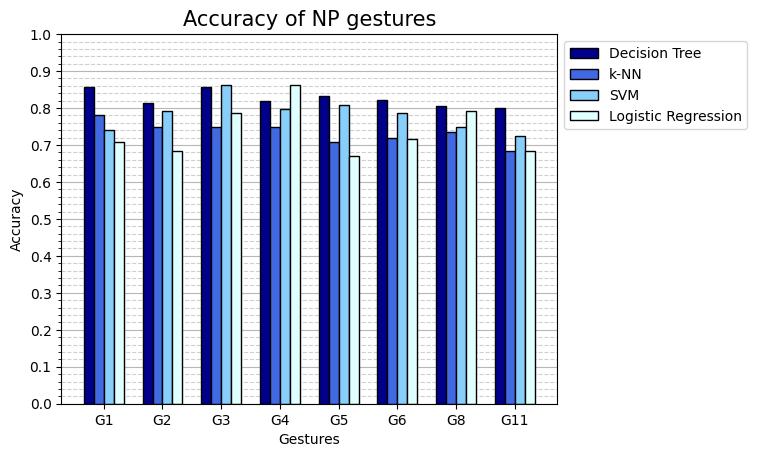

In [200]:
gesture_bar_plot(NP_G_best_list_ApEn, Needle_Passing_gestures, 'Accuracy of NP gestures', colors = ['darkblue', 'royalblue', 'lightskyblue', 'lightcyan'])

In [201]:
KT_G_best_list_ApEn = multiple_G_and_cv(2, 100, Knot_Tying_gestures, KT_gestures_X_ApEn, KT_gestures_Y_ApEn)

G1 gesture:
The specified cv value is too big! The maximum cv value: 7

G11 gesture:
The specified cv value is too big! The maximum cv value: 17

G12 gesture:
The specified cv value is too big! The maximum cv value: 17

G13 gesture:
The specified cv value is too big! The maximum cv value: 17

G14 gesture:
The specified cv value is too big! The maximum cv value: 17

G15 gesture:
The specified cv value is too big! The maximum cv value: 17


In [88]:
for i in range(len(KT_G_best_list_ApEn)):
    KT_G_best_df_ApEn, KT_G_cv_min_ApEn, KT_G_cv_max_ApEn = gesture_best_cv(KT_G_best_list_ApEn[i])
    best_results_display("KT: G" + str(Knot_Tying_gestures[i]) + " gesture (cv = " \
                         + str(KT_G_cv_min_ApEn) + " - " + str(KT_G_cv_max_ApEn) + "):", KT_G_best_df_ApEn)

KT: G1 gesture (cv = 2 - 7):


,model,best_accuracy,best_params,cv
0,decision_tree,0.800000,"{'criterion': 'gini', 'max_depth': None, 'max_features': 0.1, 'random_state': 0, 'splitter': 'best'}",4
0,k-NN,0.900000,"{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}",5
0,SVM,0.805556,"{'C': 1000, 'gamma': 0.001, 'kernel': 'sigmoid', 'random_state': 0}",6
0,logistic_regression,0.805556,"{'C': 1, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",6


KT: G11 gesture (cv = 2 - 17):


,model,best_accuracy,best_params,cv
0,decision_tree,0.811111,"{'criterion': 'entropy', 'max_depth': 4, 'max_features': 0.8, 'random_state': 0, 'splitter': 'random'}",15
0,k-NN,0.800000,"{'metric': 'euclidean', 'n_neighbors': 16, 'weights': 'distance'}",15
0,SVM,0.816667,"{'C': 500, 'gamma': 0.005, 'kernel': 'sigmoid', 'random_state': 0}",10
0,logistic_regression,0.750000,"{'C': 5, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",12


KT: G12 gesture (cv = 2 - 17):


,model,best_accuracy,best_params,cv
0,decision_tree,0.850000,"{'criterion': 'gini', 'max_depth': None, 'max_features': 0.3, 'random_state': 0, 'splitter': 'best'}",10
0,k-NN,0.886364,"{'metric': 'manhattan', 'n_neighbors': 13, 'weights': 'distance'}",3
0,SVM,0.855556,"{'C': 50, 'gamma': 'auto', 'kernel': 'sigmoid', 'random_state': 0}",6
0,logistic_regression,0.843750,"{'C': 1, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'sag'}",8


KT: G13 gesture (cv = 2 - 17):


,model,best_accuracy,best_params,cv
0,decision_tree,0.866667,"{'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'random_state': 0, 'splitter': 'random'}",15
0,k-NN,0.850000,"{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'uniform'}",10
0,SVM,0.885714,"{'C': 1000, 'gamma': 'auto', 'kernel': 'rbf', 'random_state': 0}",7
0,logistic_regression,0.854167,"{'C': 0.5, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'liblinear'}",16


KT: G14 gesture (cv = 2 - 17):


,model,best_accuracy,best_params,cv
0,decision_tree,0.760417,"{'criterion': 'gini', 'max_depth': 1, 'max_features': None, 'random_state': 0, 'splitter': 'random'}",16
0,k-NN,0.812500,"{'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}",16
0,SVM,0.777778,"{'C': 5, 'gamma': 0.5, 'kernel': 'rbf', 'random_state': 0}",9
0,logistic_regression,0.654762,"{'C': 50, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear'}",14


KT: G15 gesture (cv = 2 - 17):


,model,best_accuracy,best_params,cv
0,decision_tree,0.944444,"{'criterion': 'gini', 'max_depth': 3, 'max_features': 0.1, 'random_state': 0, 'splitter': 'best'}",6
0,k-NN,0.900000,"{'metric': 'euclidean', 'n_neighbors': 14, 'weights': 'uniform'}",15
0,SVM,0.882353,"{'C': 50, 'gamma': 'auto', 'kernel': 'sigmoid', 'random_state': 0}",17
0,logistic_regression,0.844444,"{'C': 0.5, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",15


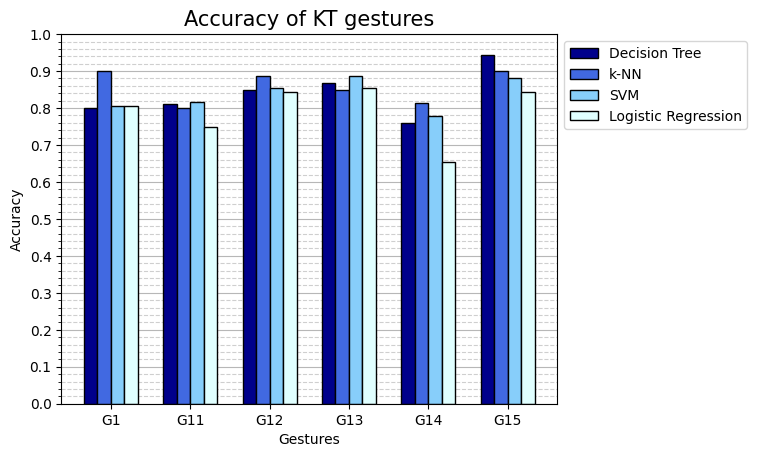

In [202]:
gesture_bar_plot(KT_G_best_list_ApEn, Knot_Tying_gestures, 'Accuracy of KT gestures', colors = ['darkblue', 'royalblue', 'lightskyblue', 'lightcyan'])

In [203]:
SU_G_best_list_ApEn = multiple_G_and_cv(2, 100, Suturing_gestures, SU_gestures_X_ApEn, SU_gestures_Y_ApEn)

G1 gesture:
The specified cv value is too big! The maximum cv value: 9

G2 gesture:
The specified cv value is too big! The maximum cv value: 11

G3 gesture:
The specified cv value is too big! The maximum cv value: 11

G4 gesture:
The specified cv value is too big! The maximum cv value: 11

G5 gesture:
The specified cv value is too big! The maximum cv value: 9

G6 gesture:
The specified cv value is too big! The maximum cv value: 11

G8 gesture:
The specified cv value is too big! The maximum cv value: 10

G9 gesture:
The specified cv value is too big! The maximum cv value: 4

G11 gesture:
The specified cv value is too big! The maximum cv value: 11


In [91]:
for i in range(len(SU_G_best_list_ApEn)):
    SU_G_best_df_ApEn, SU_G_cv_min_ApEn, SU_G_cv_max_ApEn = gesture_best_cv(SU_G_best_list_ApEn[i])
    best_results_display("SU: G" + str(Suturing_gestures[i]) + " gesture (cv = " \
                         + str(SU_G_cv_min_ApEn) + " - " + str(SU_G_cv_max_ApEn) + "):", SU_G_best_df_ApEn)

SU: G1 gesture (cv = 2 - 9):


,model,best_accuracy,best_params,cv
0,decision_tree,0.802083,"{'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2', 'random_state': 0, 'splitter': 'random'}",8
0,k-NN,0.760417,"{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}",8
0,SVM,0.799107,"{'C': 500, 'gamma': 1, 'kernel': 'sigmoid', 'random_state': 0}",4
0,logistic_regression,0.693333,"{'C': 0.1, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",5


SU: G2 gesture (cv = 2 - 11):


,model,best_accuracy,best_params,cv
0,decision_tree,0.877778,"{'criterion': 'entropy', 'max_depth': None, 'max_features': 0.2, 'random_state': 0, 'splitter': 'best'}",9
0,k-NN,0.868750,"{'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}",8
0,SVM,0.871212,"{'C': 1000, 'gamma': 1, 'kernel': 'rbf', 'random_state': 0}",11
0,logistic_regression,0.846429,"{'C': 50, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",5


SU: G3 gesture (cv = 2 - 11):


,model,best_accuracy,best_params,cv
0,decision_tree,0.975000,"{'criterion': 'gini', 'max_depth': 2, 'max_features': 0.9, 'random_state': 0, 'splitter': 'random'}",4
0,k-NN,0.819444,"{'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'distance'}",4
0,SVM,0.871053,"{'C': 1000, 'gamma': 'auto', 'kernel': 'sigmoid', 'random_state': 0}",2
0,logistic_regression,0.846053,"{'C': 50, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",2


SU: G4 gesture (cv = 2 - 11):


,model,best_accuracy,best_params,cv
0,decision_tree,0.875000,"{'criterion': 'entropy', 'max_depth': 2, 'max_features': 0.2, 'random_state': 0, 'splitter': 'best'}",10
0,k-NN,0.840909,"{'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}",11
0,SVM,0.819737,"{'C': 1000, 'gamma': 0.5, 'kernel': 'rbf', 'random_state': 0}",2
0,logistic_regression,0.755556,"{'C': 50, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'saga'}",9


SU: G5 gesture (cv = 2 - 9):


,model,best_accuracy,best_params,cv
0,decision_tree,0.861111,"{'criterion': 'gini', 'max_depth': None, 'max_features': 0.7, 'random_state': 0, 'splitter': 'random'}",9
0,k-NN,0.752381,"{'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'distance'}",7
0,SVM,0.777778,"{'C': 500, 'gamma': 0.5, 'kernel': 'sigmoid', 'random_state': 0}",3
0,logistic_regression,0.752381,"{'C': 0.1, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",7


SU: G6 gesture (cv = 2 - 11):


,model,best_accuracy,best_params,cv
0,decision_tree,0.878788,"{'criterion': 'entropy', 'max_depth': 4, 'max_features': 0.2, 'random_state': 0, 'splitter': 'random'}",11
0,k-NN,0.818421,"{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'uniform'}",2
0,SVM,0.810606,"{'C': 10, 'gamma': 0.5, 'kernel': 'rbf', 'random_state': 0}",11
0,logistic_regression,0.750000,"{'C': 5, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'sag'}",8


SU: G8 gesture (cv = 2 - 10):


,model,best_accuracy,best_params,cv
0,decision_tree,0.842593,"{'criterion': 'entropy', 'max_depth': 3, 'max_features': 'log2', 'random_state': 0, 'splitter': 'best'}",9
0,k-NN,0.851852,"{'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}",9
0,SVM,0.794444,"{'C': 1000, 'gamma': 0.01, 'kernel': 'poly', 'random_state': 0}",6
0,logistic_regression,0.768519,"{'C': 5, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'saga'}",9


SU: G9 gesture (cv = 2 - 4):


,model,best_accuracy,best_params,cv
0,decision_tree,0.675,"{'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'random_state': 0, 'splitter': 'random'}",2
0,k-NN,0.800,"{'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}",2
0,SVM,0.900,"{'C': 5, 'gamma': 'scale', 'kernel': 'rbf', 'random_state': 0}",2
0,logistic_regression,0.900,"{'C': 5, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",2


SU: G11 gesture (cv = 2 - 11):


,model,best_accuracy,best_params,cv
0,decision_tree,0.875000,"{'criterion': 'entropy', 'max_depth': 3, 'max_features': 'log2', 'random_state': 0, 'splitter': 'random'}",10
0,k-NN,0.827778,"{'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'uniform'}",9
0,SVM,0.787879,"{'C': 50, 'gamma': 0.1, 'kernel': 'sigmoid', 'random_state': 0}",11
0,logistic_regression,0.750000,"{'C': 5, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear'}",9


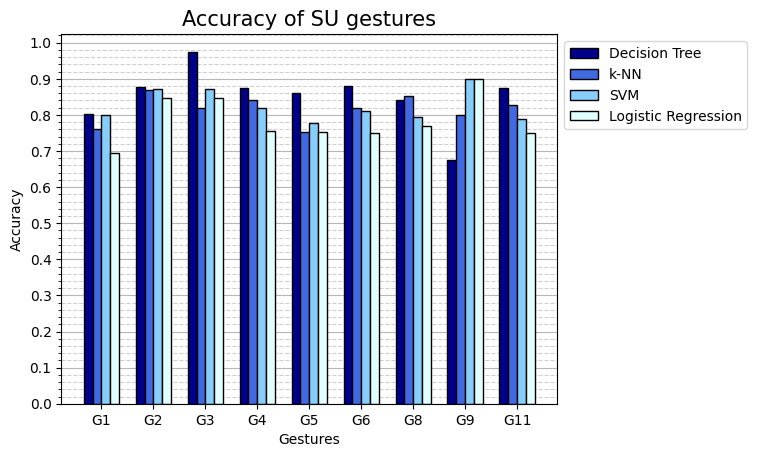

In [204]:
gesture_bar_plot(SU_G_best_list_ApEn, Suturing_gestures, 'Accuracy of SU gestures', colors = ['darkblue', 'royalblue', 'lightskyblue', 'lightcyan'])

In [205]:
def standardized_gesture_features_target(gestures_X, gestures_Y):
    temp_gestures_X = gestures_X
    standardized_gestures_X = [None] * len(temp_gestures_X)
    
    for i in range(len(temp_gestures_X)):
        standardized_gestures_X[i] = StandardScaler().fit_transform(temp_gestures_X[i])
    
    return standardized_gestures_X, gestures_Y

In [206]:
KT_gestures_standardized_X_ApEn, KT_gestures_standardized_Y_ApEn = standardized_gesture_features_target(KT_gestures_X_ApEn, KT_gestures_Y_ApEn)
NP_gestures_standardized_X_ApEn, NP_gestures_standardized_Y_ApEn = standardized_gesture_features_target(NP_gestures_X_ApEn, NP_gestures_Y_ApEn)
SU_gestures_standardized_X_ApEn, SU_gestures_standardized_Y_ApEn = standardized_gesture_features_target(SU_gestures_X_ApEn, SU_gestures_Y_ApEn)

In [207]:
NP_G_LOOCV_standardized_best_list_ApEn = []

for i in range(len(NP_gestures_standardized_X_ApEn)):
    NP_G_LOOCV_standardized_best_ApEn = \
        best_results(NP_gestures_standardized_X_ApEn[i], NP_gestures_standardized_Y_ApEn[i], LeaveOneOut())
    
    NP_G_LOOCV_standardized_best_list_ApEn.append(NP_G_LOOCV_standardized_best_ApEn)

In [75]:
for i in range(len(NP_G_LOOCV_standardized_best_list_ApEn)):
    best_results_display("Standardized NP: G" + str(Needle_Passing_gestures[i]) + " gesture (LOOCV):", \
                         NP_G_LOOCV_standardized_best_list_ApEn[i])

Standardized NP: G1 gesture (LOOCV):


,model,best_accuracy,best_params,cv
0,decision_tree,0.814815,"{'criterion': 'entropy', 'max_depth': None, 'max_features': 0.3, 'random_state': 0, 'splitter': 'best'}",LOOCV
1,k-NN,0.740741,"{'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'uniform'}",LOOCV
2,SVM,0.703704,"{'C': 1000, 'gamma': 1, 'kernel': 'rbf', 'random_state': 0}",LOOCV
3,logistic_regression,0.703704,"{'C': 0.1, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear'}",LOOCV


Standardized NP: G2 gesture (LOOCV):


,model,best_accuracy,best_params,cv
0,decision_tree,0.785714,"{'criterion': 'gini', 'max_depth': None, 'max_features': 0.5, 'random_state': 0, 'splitter': 'best'}",LOOCV
1,k-NN,0.678571,"{'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}",LOOCV
2,SVM,0.857143,"{'C': 50, 'gamma': 'auto', 'kernel': 'sigmoid', 'random_state': 0}",LOOCV
3,logistic_regression,0.785714,"{'C': 0.1, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",LOOCV


Standardized NP: G3 gesture (LOOCV):


,model,best_accuracy,best_params,cv
0,decision_tree,0.821429,"{'criterion': 'gini', 'max_depth': 1, 'max_features': None, 'random_state': 0, 'splitter': 'best'}",LOOCV
1,k-NN,0.750000,"{'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'uniform'}",LOOCV
2,SVM,0.750000,"{'C': 500, 'gamma': 0.0001, 'kernel': 'sigmoid', 'random_state': 0}",LOOCV
3,logistic_regression,0.714286,"{'C': 1, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",LOOCV


Standardized NP: G4 gesture (LOOCV):


,model,best_accuracy,best_params,cv
0,decision_tree,0.821429,"{'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'random_state': 0, 'splitter': 'best'}",LOOCV
1,k-NN,0.678571,"{'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}",LOOCV
2,SVM,0.750000,"{'C': 1000, 'gamma': 0.01, 'kernel': 'sigmoid', 'random_state': 0}",LOOCV
3,logistic_regression,0.821429,"{'C': 50, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear'}",LOOCV


Standardized NP: G5 gesture (LOOCV):


,model,best_accuracy,best_params,cv
0,decision_tree,0.916667,"{'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'random_state': 0, 'splitter': 'random'}",LOOCV
1,k-NN,0.708333,"{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}",LOOCV
2,SVM,0.833333,"{'C': 10, 'gamma': 0.01, 'kernel': 'sigmoid', 'random_state': 0}",LOOCV
3,logistic_regression,0.833333,"{'C': 50, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'saga'}",LOOCV


Standardized NP: G6 gesture (LOOCV):


,model,best_accuracy,best_params,cv
0,decision_tree,0.821429,"{'criterion': 'gini', 'max_depth': 3, 'max_features': 0.1, 'random_state': 0, 'splitter': 'best'}",LOOCV
1,k-NN,0.750000,"{'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}",LOOCV
2,SVM,0.785714,"{'C': 500, 'gamma': 1, 'kernel': 'sigmoid', 'random_state': 0}",LOOCV
3,logistic_regression,0.678571,"{'C': 0.1, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear'}",LOOCV


Standardized NP: G8 gesture (LOOCV):


,model,best_accuracy,best_params,cv
0,decision_tree,0.90,"{'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'random_state': 0, 'splitter': 'random'}",LOOCV
1,k-NN,0.75,"{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}",LOOCV
2,SVM,0.80,"{'C': 1000, 'gamma': 'auto', 'kernel': 'rbf', 'random_state': 0}",LOOCV
3,logistic_regression,0.70,"{'C': 0.1, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",LOOCV


Standardized NP: G11 gesture (LOOCV):


,model,best_accuracy,best_params,cv
0,decision_tree,0.84,"{'criterion': 'entropy', 'max_depth': 4, 'max_features': 0.3, 'random_state': 0, 'splitter': 'random'}",LOOCV
1,k-NN,0.68,"{'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}",LOOCV
2,SVM,0.84,"{'C': 1000, 'gamma': 0.05, 'kernel': 'sigmoid', 'random_state': 0}",LOOCV
3,logistic_regression,0.68,"{'C': 0.1, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear'}",LOOCV


In [209]:
KT_G_LOOCV_standardized_best_list_ApEn = []

for i in range(len(KT_gestures_standardized_X_ApEn)):
    KT_G_LOOCV_standardized_best_ApEn = \
        best_results(KT_gestures_standardized_X_ApEn[i], KT_gestures_standardized_Y_ApEn[i], LeaveOneOut())
    
    KT_G_LOOCV_standardized_best_list_ApEn.append(KT_G_LOOCV_standardized_best_ApEn)

In [77]:
for i in range(len(KT_G_LOOCV_standardized_best_list_ApEn)):
    best_results_display("Standardized KT: G" + str(Knot_Tying_gestures[i]) + " gesture (LOOCV):", \
                         KT_G_LOOCV_standardized_best_list_ApEn[i])

Standardized KT: G1 gesture (LOOCV):


,model,best_accuracy,best_params,cv
0,decision_tree,0.736842,"{'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'random_state': 0, 'splitter': 'best'}",LOOCV
1,k-NN,0.789474,"{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}",LOOCV
2,SVM,0.842105,"{'C': 1000, 'gamma': 0.05, 'kernel': 'sigmoid', 'random_state': 0}",LOOCV
3,logistic_regression,0.684211,"{'C': 0.1, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",LOOCV


Standardized KT: G11 gesture (LOOCV):


,model,best_accuracy,best_params,cv
0,decision_tree,0.750000,"{'criterion': 'entropy', 'max_depth': 4, 'max_features': 0.8, 'random_state': 0, 'splitter': 'random'}",LOOCV
1,k-NN,0.722222,"{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}",LOOCV
2,SVM,0.888889,"{'C': 1000, 'gamma': 0.1, 'kernel': 'sigmoid', 'random_state': 0}",LOOCV
3,logistic_regression,0.694444,"{'C': 0.1, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'liblinear'}",LOOCV


Standardized KT: G12 gesture (LOOCV):


,model,best_accuracy,best_params,cv
0,decision_tree,0.828571,"{'criterion': 'gini', 'max_depth': 1, 'max_features': 0.2, 'random_state': 0, 'splitter': 'best'}",LOOCV
1,k-NN,0.857143,"{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}",LOOCV
2,SVM,0.828571,"{'C': 5, 'gamma': 0.0005, 'kernel': 'sigmoid', 'random_state': 0}",LOOCV
3,logistic_regression,0.742857,"{'C': 0.1, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",LOOCV


Standardized KT: G13 gesture (LOOCV):


,model,best_accuracy,best_params,cv
0,decision_tree,0.861111,"{'criterion': 'gini', 'max_depth': 2, 'max_features': 0.5, 'random_state': 0, 'splitter': 'random'}",LOOCV
1,k-NN,0.777778,"{'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'distance'}",LOOCV
2,SVM,0.888889,"{'C': 5, 'gamma': 0.05, 'kernel': 'sigmoid', 'random_state': 0}",LOOCV
3,logistic_regression,0.833333,"{'C': 0.5, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",LOOCV


Standardized KT: G14 gesture (LOOCV):


,model,best_accuracy,best_params,cv
0,decision_tree,0.805556,"{'criterion': 'gini', 'max_depth': 3, 'max_features': 0.6, 'random_state': 0, 'splitter': 'random'}",LOOCV
1,k-NN,0.722222,"{'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}",LOOCV
2,SVM,0.722222,"{'C': 1000, 'gamma': 'auto', 'kernel': 'rbf', 'random_state': 0}",LOOCV
3,logistic_regression,0.722222,"{'C': 1, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear'}",LOOCV


Standardized KT: G15 gesture (LOOCV):


,model,best_accuracy,best_params,cv
0,decision_tree,0.888889,"{'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'random_state': 0, 'splitter': 'best'}",LOOCV
1,k-NN,0.833333,"{'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'uniform'}",LOOCV
2,SVM,0.916667,"{'C': 1000, 'gamma': 'auto', 'kernel': 'linear', 'random_state': 0}",LOOCV
3,logistic_regression,0.888889,"{'C': 500, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",LOOCV


In [210]:
SU_G_LOOCV_standardized_best_list_ApEn = []

for i in range(len(SU_gestures_standardized_X_ApEn)):
    SU_G_LOOCV_standardized_best_ApEn = \
        best_results(SU_gestures_standardized_X_ApEn[i], SU_gestures_standardized_Y_ApEn[i], LeaveOneOut())
    
    SU_G_LOOCV_standardized_best_list_ApEn.append(SU_G_LOOCV_standardized_best_ApEn)

In [79]:
for i in range(len(SU_G_LOOCV_standardized_best_list_ApEn)):
    best_results_display("Standardized SU: G" + str(Suturing_gestures[i]) + " gesture (LOOCV):", \
                         SU_G_LOOCV_standardized_best_list_ApEn[i])

Standardized SU: G1 gesture (LOOCV):


,model,best_accuracy,best_params,cv
0,decision_tree,0.827586,"{'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'random_state': 0, 'splitter': 'random'}",LOOCV
1,k-NN,0.724138,"{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}",LOOCV
2,SVM,0.724138,"{'C': 1000, 'gamma': 'auto', 'kernel': 'rbf', 'random_state': 0}",LOOCV
3,logistic_regression,0.689655,"{'C': 0.1, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'saga'}",LOOCV


Standardized SU: G2 gesture (LOOCV):


,model,best_accuracy,best_params,cv
0,decision_tree,0.871795,"{'criterion': 'entropy', 'max_depth': 2, 'max_features': 0.2, 'random_state': 0, 'splitter': 'best'}",LOOCV
1,k-NN,0.820513,"{'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'uniform'}",LOOCV
2,SVM,0.871795,"{'C': 50, 'gamma': 0.0005, 'kernel': 'rbf', 'random_state': 0}",LOOCV
3,logistic_regression,0.897436,"{'C': 5, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear'}",LOOCV


Standardized SU: G3 gesture (LOOCV):


,model,best_accuracy,best_params,cv
0,decision_tree,0.948718,"{'criterion': 'gini', 'max_depth': None, 'max_features': None, 'random_state': 0, 'splitter': 'random'}",LOOCV
1,k-NN,0.871795,"{'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'uniform'}",LOOCV
2,SVM,0.871795,"{'C': 500, 'gamma': 0.0001, 'kernel': 'sigmoid', 'random_state': 0}",LOOCV
3,logistic_regression,0.846154,"{'C': 0.1, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",LOOCV


Standardized SU: G4 gesture (LOOCV):


,model,best_accuracy,best_params,cv
0,decision_tree,0.871795,"{'criterion': 'entropy', 'max_depth': 2, 'max_features': 0.2, 'random_state': 0, 'splitter': 'best'}",LOOCV
1,k-NN,0.820513,"{'metric': 'manhattan', 'n_neighbors': 6, 'weights': 'uniform'}",LOOCV
2,SVM,0.820513,"{'C': 5, 'gamma': 0.005, 'kernel': 'rbf', 'random_state': 0}",LOOCV
3,logistic_regression,0.717949,"{'C': 1, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",LOOCV


Standardized SU: G5 gesture (LOOCV):


,model,best_accuracy,best_params,cv
0,decision_tree,0.916667,"{'criterion': 'gini', 'max_depth': 4, 'max_features': 0.7, 'random_state': 0, 'splitter': 'random'}",LOOCV
1,k-NN,0.750000,"{'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}",LOOCV
2,SVM,0.777778,"{'C': 0.5, 'gamma': 0.1, 'kernel': 'sigmoid', 'random_state': 0}",LOOCV
3,logistic_regression,0.750000,"{'C': 0.1, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'saga'}",LOOCV


Standardized SU: G6 gesture (LOOCV):


,model,best_accuracy,best_params,cv
0,decision_tree,0.846154,"{'criterion': 'gini', 'max_depth': None, 'max_features': 0.5, 'random_state': 0, 'splitter': 'random'}",LOOCV
1,k-NN,0.871795,"{'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}",LOOCV
2,SVM,0.820513,"{'C': 10, 'gamma': 0.005, 'kernel': 'rbf', 'random_state': 0}",LOOCV
3,logistic_regression,0.794872,"{'C': 10, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'saga'}",LOOCV


Standardized SU: G8 gesture (LOOCV):


,model,best_accuracy,best_params,cv
0,decision_tree,0.848485,"{'criterion': 'entropy', 'max_depth': 3, 'max_features': 'log2', 'random_state': 0, 'splitter': 'best'}",LOOCV
1,k-NN,0.757576,"{'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}",LOOCV
2,SVM,0.787879,"{'C': 1000, 'gamma': 'auto', 'kernel': 'rbf', 'random_state': 0}",LOOCV
3,logistic_regression,0.818182,"{'C': 500, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear'}",LOOCV


Standardized SU: G9 gesture (LOOCV):


,model,best_accuracy,best_params,cv
0,decision_tree,0.666667,"{'criterion': 'gini', 'max_depth': None, 'max_features': 0.1, 'random_state': 0, 'splitter': 'best'}",LOOCV
1,k-NN,0.555556,"{'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}",LOOCV
2,SVM,0.888889,"{'C': 50, 'gamma': 0.1, 'kernel': 'sigmoid', 'random_state': 0}",LOOCV
3,logistic_regression,0.777778,"{'C': 0.5, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'liblinear'}",LOOCV


Standardized SU: G11 gesture (LOOCV):


,model,best_accuracy,best_params,cv
0,decision_tree,0.871795,"{'criterion': 'gini', 'max_depth': 1, 'max_features': 0.4, 'random_state': 0, 'splitter': 'best'}",LOOCV
1,k-NN,0.846154,"{'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}",LOOCV
2,SVM,0.743590,"{'C': 10, 'gamma': 0.001, 'kernel': 'rbf', 'random_state': 0}",LOOCV
3,logistic_regression,0.743590,"{'C': 0.5, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear'}",LOOCV


In [211]:
NP_G_standardized_best_list_ApEn = multiple_G_and_cv(2, 100, Needle_Passing_gestures, \
                                                     NP_gestures_standardized_X_ApEn, NP_gestures_standardized_Y_ApEn)

G1 gesture:
The specified cv value is too big! The maximum cv value: 8

G2 gesture:
The specified cv value is too big! The maximum cv value: 9

G3 gesture:
The specified cv value is too big! The maximum cv value: 9

G4 gesture:
The specified cv value is too big! The maximum cv value: 9

G5 gesture:
The specified cv value is too big! The maximum cv value: 8

G6 gesture:
The specified cv value is too big! The maximum cv value: 9

G8 gesture:
The specified cv value is too big! The maximum cv value: 6

G11 gesture:
The specified cv value is too big! The maximum cv value: 8


In [94]:
for i in range(len(NP_G_standardized_best_list_ApEn)):
    NP_G_standardized_best_df_ApEn, NP_G_standardized_cv_min_ApEn, NP_G_standardized_cv_max_ApEn = \
        gesture_best_cv(NP_G_standardized_best_list_ApEn[i])
    
    best_results_display("Standardized NP: G" + str(Needle_Passing_gestures[i]) + " gesture (cv = " \
                         + str(NP_G_standardized_cv_min_ApEn) + " - " + str(NP_G_standardized_cv_max_ApEn) + "):", \
                         NP_G_standardized_best_df_ApEn)

Standardized NP: G1 gesture (cv = 2 - 8):


,model,best_accuracy,best_params,cv
0,decision_tree,0.857143,"{'criterion': 'gini', 'max_depth': None, 'max_features': 1, 'random_state': 0, 'splitter': 'random'}",7
0,k-NN,0.821429,"{'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'uniform'}",7
0,SVM,0.741758,"{'C': 50, 'gamma': 0.005, 'kernel': 'poly', 'random_state': 0}",2
0,logistic_regression,0.744048,"{'C': 0.5, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'saga'}",4


Standardized NP: G2 gesture (cv = 2 - 9):


,model,best_accuracy,best_params,cv
0,decision_tree,0.812500,"{'criterion': 'gini', 'max_depth': None, 'max_features': 0.5, 'random_state': 0, 'splitter': 'best'}",8
0,k-NN,0.683333,"{'metric': 'euclidean', 'n_neighbors': 6, 'weights': 'uniform'}",6
0,SVM,0.787037,"{'C': 10, 'gamma': 'auto', 'kernel': 'poly', 'random_state': 0}",9
0,logistic_regression,0.781250,"{'C': 0.1, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",8


Standardized NP: G3 gesture (cv = 2 - 9):


,model,best_accuracy,best_params,cv
0,decision_tree,0.857143,"{'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'random_state': 0, 'splitter': 'random'}",2
0,k-NN,0.787037,"{'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'uniform'}",9
0,SVM,0.785714,"{'C': 500, 'gamma': 0.0001, 'kernel': 'rbf', 'random_state': 0}",7
0,logistic_regression,0.759259,"{'C': 5, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'liblinear'}",9


Standardized NP: G4 gesture (cv = 2 - 9):


,model,best_accuracy,best_params,cv
0,decision_tree,0.820000,"{'criterion': 'gini', 'max_depth': 2, 'max_features': 0.3, 'random_state': 0, 'splitter': 'best'}",5
0,k-NN,0.714286,"{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'uniform'}",7
0,SVM,0.822222,"{'C': 1000, 'gamma': 0.005, 'kernel': 'sigmoid', 'random_state': 0}",3
0,logistic_regression,0.791667,"{'C': 0.5, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'saga'}",8


Standardized NP: G5 gesture (cv = 2 - 8):


,model,best_accuracy,best_params,cv
0,decision_tree,0.833333,"{'criterion': 'gini', 'max_depth': 2, 'max_features': 0.6, 'random_state': 0, 'splitter': 'random'}",2
0,k-NN,0.791667,"{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}",3
0,SVM,0.875000,"{'C': 10, 'gamma': 0.01, 'kernel': 'sigmoid', 'random_state': 0}",6
0,logistic_regression,0.833333,"{'C': 0.5, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'saga'}",2


Standardized NP: G6 gesture (cv = 2 - 9):


,model,best_accuracy,best_params,cv
0,decision_tree,0.822917,"{'criterion': 'entropy', 'max_depth': 4, 'max_features': 0.2, 'random_state': 0, 'splitter': 'random'}",8
0,k-NN,0.791667,"{'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}",8
0,SVM,0.854167,"{'C': 10, 'gamma': 0.05, 'kernel': 'sigmoid', 'random_state': 0}",8
0,logistic_regression,0.683333,"{'C': 0.1, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear'}",6


Standardized NP: G8 gesture (cv = 2 - 6):


,model,best_accuracy,best_params,cv
0,decision_tree,0.805556,"{'criterion': 'entropy', 'max_depth': 2, 'max_features': 0.6, 'random_state': 0, 'splitter': 'random'}",6
0,k-NN,0.700000,"{'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'uniform'}",4
0,SVM,0.805556,"{'C': 1000, 'gamma': 'auto', 'kernel': 'rbf', 'random_state': 0}",6
0,logistic_regression,0.791667,"{'C': 1000, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear'}",6


Standardized NP: G11 gesture (cv = 2 - 8):


,model,best_accuracy,best_params,cv
0,decision_tree,0.800000,"{'criterion': 'gini', 'max_depth': 1, 'max_features': 1, 'random_state': 0, 'splitter': 'best'}",5
0,k-NN,0.716667,"{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'distance'}",6
0,SVM,0.833333,"{'C': 5, 'gamma': 0.1, 'kernel': 'sigmoid', 'random_state': 0}",8
0,logistic_regression,0.683333,"{'C': 0.1, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear'}",6


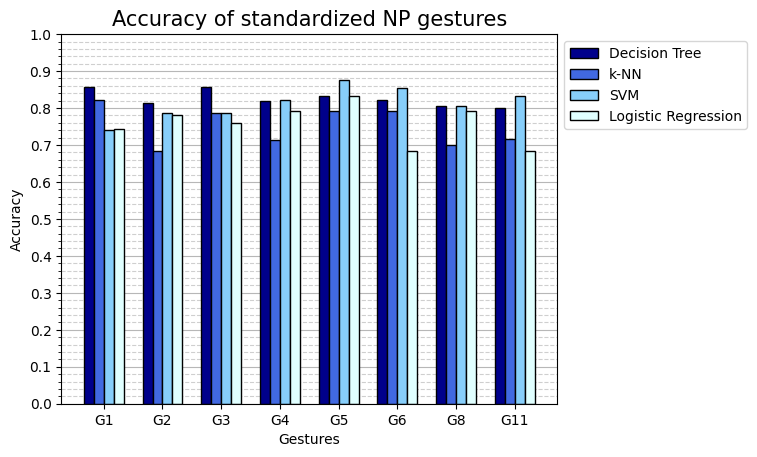

In [213]:
gesture_bar_plot(NP_G_standardized_best_list_ApEn, Needle_Passing_gestures, 'Accuracy of standardized NP gestures', colors = ['darkblue', 'royalblue', 'lightskyblue', 'lightcyan'])

In [214]:
KT_G_standardized_best_list_ApEn = multiple_G_and_cv(2, 100, Knot_Tying_gestures, \
                                                     KT_gestures_standardized_X_ApEn, KT_gestures_standardized_Y_ApEn)

G1 gesture:
The specified cv value is too big! The maximum cv value: 7

G11 gesture:
The specified cv value is too big! The maximum cv value: 17

G12 gesture:
The specified cv value is too big! The maximum cv value: 17

G13 gesture:
The specified cv value is too big! The maximum cv value: 17

G14 gesture:
The specified cv value is too big! The maximum cv value: 17

G15 gesture:
The specified cv value is too big! The maximum cv value: 17


In [97]:
for i in range(len(KT_G_standardized_best_list_ApEn)):
    KT_G_standardized_best_df_ApEn, KT_G_standardized_cv_min_ApEn, KT_G_standardized_cv_max_ApEn = \
        gesture_best_cv(KT_G_standardized_best_list_ApEn[i])
    
    best_results_display("Standardized KT: G" + str(Knot_Tying_gestures[i]) + " gesture (cv = " \
                         + str(KT_G_standardized_cv_min_ApEn) + " - " + str(KT_G_standardized_cv_max_ApEn) + "):", \
                         KT_G_standardized_best_df_ApEn)

Standardized KT: G1 gesture (cv = 2 - 7):


,model,best_accuracy,best_params,cv
0,decision_tree,0.800000,"{'criterion': 'gini', 'max_depth': None, 'max_features': 0.1, 'random_state': 0, 'splitter': 'best'}",4
0,k-NN,0.861111,"{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}",6
0,SVM,0.833333,"{'C': 0.5, 'gamma': 0.1, 'kernel': 'sigmoid', 'random_state': 0}",7
0,logistic_regression,0.793651,"{'C': 0.1, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",3


Standardized KT: G11 gesture (cv = 2 - 17):


,model,best_accuracy,best_params,cv
0,decision_tree,0.811111,"{'criterion': 'entropy', 'max_depth': 4, 'max_features': 0.8, 'random_state': 0, 'splitter': 'random'}",15
0,k-NN,0.781250,"{'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'uniform'}",16
0,SVM,0.825000,"{'C': 50, 'gamma': 0.0005, 'kernel': 'sigmoid', 'random_state': 0}",10
0,logistic_regression,0.758333,"{'C': 0.1, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'liblinear'}",10


Standardized KT: G12 gesture (cv = 2 - 17):


,model,best_accuracy,best_params,cv
0,decision_tree,0.850000,"{'criterion': 'gini', 'max_depth': None, 'max_features': 0.3, 'random_state': 0, 'splitter': 'best'}",10
0,k-NN,0.892857,"{'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}",14
0,SVM,0.844444,"{'C': 100, 'gamma': 0.005, 'kernel': 'poly', 'random_state': 0}",15
0,logistic_regression,0.825758,"{'C': 0.1, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",3


Standardized KT: G13 gesture (cv = 2 - 17):


,model,best_accuracy,best_params,cv
0,decision_tree,0.866667,"{'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2', 'random_state': 0, 'splitter': 'random'}",15
0,k-NN,0.809524,"{'metric': 'manhattan', 'n_neighbors': 8, 'weights': 'distance'}",14
0,SVM,0.923077,"{'C': 10, 'gamma': 0.05, 'kernel': 'sigmoid', 'random_state': 0}",13
0,logistic_regression,0.861111,"{'C': 50, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'liblinear'}",2


Standardized KT: G14 gesture (cv = 2 - 17):


,model,best_accuracy,best_params,cv
0,decision_tree,0.760417,"{'criterion': 'gini', 'max_depth': 1, 'max_features': None, 'random_state': 0, 'splitter': 'random'}",16
0,k-NN,0.781250,"{'metric': 'manhattan', 'n_neighbors': 26, 'weights': 'uniform'}",8
0,SVM,0.776190,"{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf', 'random_state': 0}",7
0,logistic_regression,0.695238,"{'C': 1000, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",7


Standardized KT: G15 gesture (cv = 2 - 17):


,model,best_accuracy,best_params,cv
0,decision_tree,0.944444,"{'criterion': 'gini', 'max_depth': 3, 'max_features': 0.1, 'random_state': 0, 'splitter': 'best'}",6
0,k-NN,0.900000,"{'metric': 'euclidean', 'n_neighbors': 8, 'weights': 'uniform'}",10
0,SVM,0.944444,"{'C': 1000, 'gamma': 'auto', 'kernel': 'linear', 'random_state': 0}",9
0,logistic_regression,0.916667,"{'C': 1000, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",9


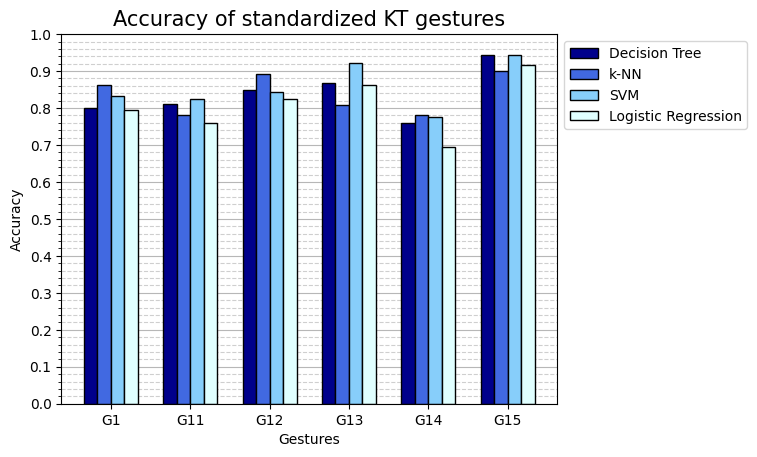

In [215]:
gesture_bar_plot(KT_G_standardized_best_list_ApEn, Knot_Tying_gestures, 'Accuracy of standardized KT gestures', colors = ['darkblue', 'royalblue', 'lightskyblue', 'lightcyan'])

In [216]:
SU_G_standardized_best_list_ApEn = multiple_G_and_cv(2, 100, Suturing_gestures, \
                                                     SU_gestures_standardized_X_ApEn, SU_gestures_standardized_Y_ApEn)

G1 gesture:
The specified cv value is too big! The maximum cv value: 9

G2 gesture:
The specified cv value is too big! The maximum cv value: 11

G3 gesture:
The specified cv value is too big! The maximum cv value: 11

G4 gesture:
The specified cv value is too big! The maximum cv value: 11

G5 gesture:
The specified cv value is too big! The maximum cv value: 9

G6 gesture:
The specified cv value is too big! The maximum cv value: 11

G8 gesture:
The specified cv value is too big! The maximum cv value: 10

G9 gesture:
The specified cv value is too big! The maximum cv value: 4

G11 gesture:
The specified cv value is too big! The maximum cv value: 11


In [100]:
for i in range(len(SU_G_standardized_best_list_ApEn)):
    SU_G_standardized_best_df_ApEn, SU_G_standardized_cv_min_ApEn, SU_G_standardized_cv_max_ApEn = \
        gesture_best_cv(SU_G_standardized_best_list_ApEn[i])
    
    best_results_display("Standardized SU: G" + str(Suturing_gestures[i]) + " gesture (cv = " \
                         + str(SU_G_standardized_cv_min_ApEn) + " - " + str(SU_G_standardized_cv_max_ApEn) + "):", \
                         SU_G_standardized_best_df_ApEn)

Standardized SU: G1 gesture (cv = 2 - 9):


,model,best_accuracy,best_params,cv
0,decision_tree,0.802083,"{'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2', 'random_state': 0, 'splitter': 'random'}",8
0,k-NN,0.729167,"{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}",8
0,SVM,0.728571,"{'C': 1000, 'gamma': 'auto', 'kernel': 'poly', 'random_state': 0}",7
0,logistic_regression,0.693333,"{'C': 0.1, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'saga'}",5


Standardized SU: G2 gesture (cv = 2 - 11):


,model,best_accuracy,best_params,cv
0,decision_tree,0.877778,"{'criterion': 'entropy', 'max_depth': None, 'max_features': 0.2, 'random_state': 0, 'splitter': 'best'}",9
0,k-NN,0.819737,"{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}",2
0,SVM,0.898684,"{'C': 1000, 'gamma': 'auto', 'kernel': 'linear', 'random_state': 0}",2
0,logistic_regression,0.916667,"{'C': 50, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'liblinear'}",10


Standardized SU: G3 gesture (cv = 2 - 11):


,model,best_accuracy,best_params,cv
0,decision_tree,0.975000,"{'criterion': 'gini', 'max_depth': 2, 'max_features': 0.9, 'random_state': 0, 'splitter': 'random'}",4
0,k-NN,0.873684,"{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}",2
0,SVM,0.893939,"{'C': 500, 'gamma': 0.0001, 'kernel': 'sigmoid', 'random_state': 0}",11
0,logistic_regression,0.863636,"{'C': 0.1, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",11


Standardized SU: G4 gesture (cv = 2 - 11):


,model,best_accuracy,best_params,cv
0,decision_tree,0.875000,"{'criterion': 'entropy', 'max_depth': 2, 'max_features': 0.2, 'random_state': 0, 'splitter': 'best'}",10
0,k-NN,0.819048,"{'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'uniform'}",7
0,SVM,0.805556,"{'C': 5, 'gamma': 0.005, 'kernel': 'rbf', 'random_state': 0}",9
0,logistic_regression,0.750000,"{'C': 1, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'saga'}",9


Standardized SU: G5 gesture (cv = 2 - 9):


,model,best_accuracy,best_params,cv
0,decision_tree,0.861111,"{'criterion': 'gini', 'max_depth': None, 'max_features': 0.7, 'random_state': 0, 'splitter': 'random'}",9
0,k-NN,0.780952,"{'metric': 'euclidean', 'n_neighbors': 12, 'weights': 'uniform'}",7
0,SVM,0.752381,"{'C': 1000, 'gamma': 1, 'kernel': 'rbf', 'random_state': 0}",7
0,logistic_regression,0.752381,"{'C': 0.1, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'saga'}",7


Standardized SU: G6 gesture (cv = 2 - 11):


,model,best_accuracy,best_params,cv
0,decision_tree,0.878788,"{'criterion': 'entropy', 'max_depth': 4, 'max_features': 0.2, 'random_state': 0, 'splitter': 'random'}",11
0,k-NN,0.840909,"{'metric': 'euclidean', 'n_neighbors': 4, 'weights': 'distance'}",11
0,SVM,0.821053,"{'C': 5, 'gamma': 0.01, 'kernel': 'rbf', 'random_state': 0}",2
0,logistic_regression,0.723810,"{'C': 0.1, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'saga'}",7


Standardized SU: G8 gesture (cv = 2 - 10):


,model,best_accuracy,best_params,cv
0,decision_tree,0.842593,"{'criterion': 'entropy', 'max_depth': 3, 'max_features': 'log2', 'random_state': 0, 'splitter': 'best'}",9
0,k-NN,0.788889,"{'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}",6
0,SVM,0.851103,"{'C': 1000, 'gamma': 0.005, 'kernel': 'rbf', 'random_state': 0}",2
0,logistic_regression,0.880515,"{'C': 0.1, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'newton-cg'}",2


Standardized SU: G9 gesture (cv = 2 - 4):


,model,best_accuracy,best_params,cv
0,decision_tree,0.675000,"{'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt', 'random_state': 0, 'splitter': 'random'}",2
0,k-NN,0.777778,"{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}",3
0,SVM,0.875000,"{'C': 1000, 'gamma': 0.05, 'kernel': 'sigmoid', 'random_state': 0}",4
0,logistic_regression,0.777778,"{'C': 5, 'max_iter': 10000, 'penalty': 'l2', 'random_state': 0, 'solver': 'liblinear'}",3


Standardized SU: G11 gesture (cv = 2 - 11):


,model,best_accuracy,best_params,cv
0,decision_tree,0.875000,"{'criterion': 'entropy', 'max_depth': 3, 'max_features': 'log2', 'random_state': 0, 'splitter': 'random'}",10
0,k-NN,0.848485,"{'metric': 'euclidean', 'n_neighbors': 2, 'weights': 'uniform'}",11
0,SVM,0.768750,"{'C': 1, 'gamma': 'auto', 'kernel': 'sigmoid', 'random_state': 0}",8
0,logistic_regression,0.750000,"{'C': 0.5, 'max_iter': 10000, 'penalty': 'l1', 'random_state': 0, 'solver': 'saga'}",9


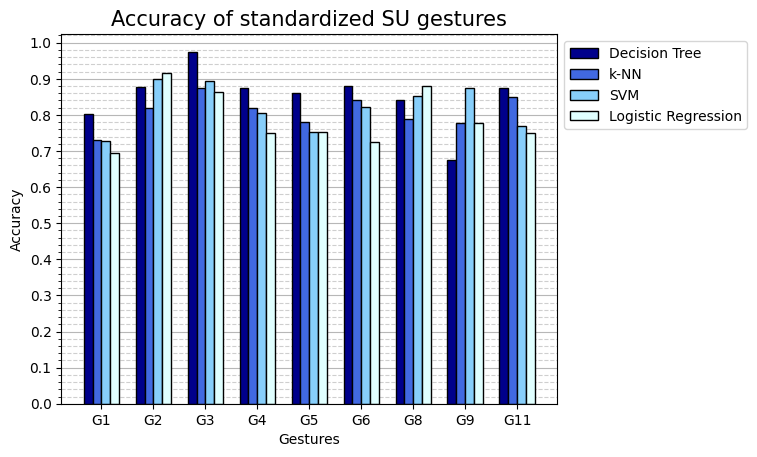

In [217]:
gesture_bar_plot(SU_G_standardized_best_list_ApEn, Suturing_gestures, 'Accuracy of standardized SU gestures', colors = ['darkblue', 'royalblue', 'lightskyblue', 'lightcyan'])

In [ ]:
################################################ Dimension Reduction #######################################################

In [218]:
NP_G_LOOCV_best_list_ApEn_dimRed = []

for i in range(len(NP_gestures_X_ApEn)):
    NP_G_LOOCV_best_ApEn_dimRed = Best_result_dimRed(NP_gestures_X_ApEn[i], NP_gestures_Y_ApEn[i], 'DT', LeaveOneOut())
    
    NP_G_LOOCV_best_list_ApEn_dimRed.append(NP_G_LOOCV_best_ApEn_dimRed)

In [219]:
for i in range(len(NP_G_LOOCV_best_list_ApEn_dimRed)):
    best_results_display("NP (dimRed): G" + str(Needle_Passing_gestures[i]) + " gesture (LOOCV):", \
                         NP_G_LOOCV_best_list_ApEn_dimRed[i])

NP (dimRed): G1 gesture (LOOCV):


,model,best_accuracy,best_params,cv,used_features,mi_score
0,decision_tree,0.925926,"{'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'random_state': 0, 'splitter': 'random'}",LOOCV,"[8, 52, 65]",0.22


NP (dimRed): G2 gesture (LOOCV):


,model,best_accuracy,best_params,cv,used_features,mi_score
0,decision_tree,0.892857,"{'criterion': 'gini', 'max_depth': None, 'max_features': 0.3, 'random_state': 0, 'splitter': 'random'}",LOOCV,"[1, 2, 4, 7, 8, 13, 14, 21, 24, 26, 28, 30, 36, 40, 43, 47, 49, 59, 61, 62, 63, 65, 70, 74]",0.02


NP (dimRed): G3 gesture (LOOCV):


,model,best_accuracy,best_params,cv,used_features,mi_score
0,decision_tree,0.892857,"{'criterion': 'gini', 'max_depth': 2, 'max_features': 0.8, 'random_state': 0, 'splitter': 'random'}",LOOCV,"[1, 5, 8, 9, 10, 12, 15, 17, 18, 22, 28, 29, 30, 31, 35, 36, 37, 41, 45, 46, 47, 49, 54, 56, 58, 62, 65, 67, 70, 72, 74, 75]",0.01


NP (dimRed): G4 gesture (LOOCV):


,model,best_accuracy,best_params,cv,used_features,mi_score
0,decision_tree,0.964286,"{'criterion': 'gini', 'max_depth': None, 'max_features': None, 'random_state': 0, 'splitter': 'best'}",LOOCV,[66],0.23


NP (dimRed): G5 gesture (LOOCV):


,model,best_accuracy,best_params,cv,used_features,mi_score
0,decision_tree,0.958333,"{'criterion': 'gini', 'max_depth': None, 'max_features': 0.6, 'random_state': 0, 'splitter': 'random'}",LOOCV,"[0, 2, 3, 4, 5, 8, 10, 12, 16, 19, 20, 22, 28, 33, 36, 37, 38, 39, 41, 42, 43, 47, 49, 50, 51, 54, 57, 58, 59, 60, 61, 62, 64, 65, 66, 69, 72, 73, 74, 75]",0.0


NP (dimRed): G6 gesture (LOOCV):


,model,best_accuracy,best_params,cv,used_features,mi_score
0,decision_tree,0.928571,"{'criterion': 'gini', 'max_depth': None, 'max_features': 0.9, 'random_state': 0, 'splitter': 'random'}",LOOCV,"[1, 11, 12, 15, 23, 33, 36, 42, 55, 58, 68, 71, 73]",0.05


NP (dimRed): G8 gesture (LOOCV):


,model,best_accuracy,best_params,cv,used_features,mi_score
0,decision_tree,0.95,"{'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'random_state': 0, 'splitter': 'random'}",LOOCV,"[22, 23, 37, 41, 43]",0.14


NP (dimRed): G11 gesture (LOOCV):


,model,best_accuracy,best_params,cv,used_features,mi_score
0,decision_tree,0.92,"{'criterion': 'gini', 'max_depth': 2, 'max_features': 0.8, 'random_state': 0, 'splitter': 'random'}",LOOCV,"[0, 4, 19, 21, 27, 36, 38, 43, 44, 45, 46, 48, 56, 57, 70]",0.05


In [220]:
NP_G_LOOCV_best_list_ApEn_dimRed = []

for i in range(len(NP_gestures_X_ApEn)):
    NP_G_LOOCV_best_ApEn_dimRed = Best_result_dimRed(NP_gestures_X_ApEn[i], NP_gestures_Y_ApEn[i], 'DT', 2)
    
    NP_G_LOOCV_best_list_ApEn_dimRed.append(NP_G_LOOCV_best_ApEn_dimRed)

In [221]:
for i in range(len(NP_G_LOOCV_best_list_ApEn_dimRed)):
    best_results_display("NP (dimRed): G" + str(Needle_Passing_gestures[i]) + " gesture:", \
                         NP_G_LOOCV_best_list_ApEn_dimRed[i])

NP (dimRed): G1 gesture:


,model,best_accuracy,best_params,cv,used_features,mi_score
0,decision_tree,0.925824,"{'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'random_state': 0, 'splitter': 'random'}",2,"[8, 65]",0.28


NP (dimRed): G2 gesture:


,model,best_accuracy,best_params,cv,used_features,mi_score
0,decision_tree,0.821429,"{'criterion': 'gini', 'max_depth': 4, 'max_features': None, 'random_state': 0, 'splitter': 'random'}",2,"[24, 26, 30, 36]",0.12


NP (dimRed): G3 gesture:


,model,best_accuracy,best_params,cv,used_features,mi_score
0,decision_tree,0.857143,"{'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt', 'random_state': 0, 'splitter': 'best'}",2,"[36, 47, 75]",0.13


NP (dimRed): G4 gesture:


,model,best_accuracy,best_params,cv,used_features,mi_score
0,decision_tree,0.857143,"{'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'random_state': 0, 'splitter': 'best'}",2,"[9, 66]",0.19


NP (dimRed): G5 gesture:


,model,best_accuracy,best_params,cv,used_features,mi_score
0,decision_tree,0.958333,"{'criterion': 'gini', 'max_depth': None, 'max_features': 0.7, 'random_state': 0, 'splitter': 'random'}",2,"[20, 28, 60]",0.29


NP (dimRed): G6 gesture:


,model,best_accuracy,best_params,cv,used_features,mi_score
0,decision_tree,0.892857,"{'criterion': 'gini', 'max_depth': 3, 'max_features': 0.1, 'random_state': 0, 'splitter': 'random'}",2,"[1, 11, 12, 15, 23, 33, 36, 42, 55, 58, 68, 71, 73]",0.05


NP (dimRed): G8 gesture:


,model,best_accuracy,best_params,cv,used_features,mi_score
0,decision_tree,0.85,"{'criterion': 'gini', 'max_depth': None, 'max_features': None, 'random_state': 0, 'splitter': 'best'}",2,"[1, 16, 17, 18, 22, 23, 26, 30, 35, 37, 41, 43, 50, 52, 54]",0.04


NP (dimRed): G11 gesture:


,model,best_accuracy,best_params,cv,used_features,mi_score
0,decision_tree,0.878205,"{'criterion': 'gini', 'max_depth': None, 'max_features': 0.3, 'random_state': 0, 'splitter': 'random'}",2,"[0, 19, 27, 36, 38, 45, 48, 56, 57]",0.07


In [222]:
#Test
mi_score = MIC(SU_gestures_X_ApEn[6], SU_gestures_Y_ApEn[6], random_state = 0)
mi_score_selected_index = np.where(mi_score > 0.0)[0]
X_2 = (SU_gestures_X_ApEn[6][:, mi_score_selected_index])

model_4 = DecisionTreeClassifier(criterion='gini', max_depth=2, max_features=None, random_state= 0, splitter='random')

kf_score = cross_val_score(model_4, X_2, SU_gestures_Y_ApEn[6], cv = LeaveOneOut())
kf_score_mean = kf_score.mean()
kf_score_mean

0.9393939393939394

In [ ]:
['darkblue', 'royalblue', 'lightskyblue', 'lightcyan']

In [225]:
#Barplots
def gesture_MI_barplots(G_lists, gestures, title):
    label_gestures = []
    for i in gestures:
        label_gestures.append('G' + str(i))
        
    x = np.arange(len(label_gestures))
    width = 0.17
    labels = ['Decision Tree', 'k-NN', 'SVM', 'Logistic Regression']
    
    plt.grid(which='major', linestyle='-', alpha = 0.9, axis = 'y')
    plt.grid(which='minor', linestyle='--', alpha = 0.6, axis = 'y')
    plt.minorticks_on()
    #minor turn off on x
    plt.tick_params('x', which='minor', bottom=False, top=False)
    
    plt.bar(x - width /2 - width, G_lists[0], width, color = 'darkblue', edgecolor = 'black',  zorder = 2)
    plt.bar(x - width /2, G_lists[1], width, color = 'royalblue', edgecolor = 'black',  zorder = 2)
    plt.bar(x + width /2, G_lists[2], width, color = 'lightskyblue', edgecolor = 'black',  zorder = 2)
    plt.bar(x + width /2 + width, G_lists[3], width, color = 'lightcyan', edgecolor = 'black',  zorder = 2)
    
    plt.xticks(x, label_gestures)
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.ylabel('Accuracy')
    plt.xlabel('Gestures')
    plt.title(title, fontsize = 15)
    
    plt.legend(labels, bbox_to_anchor = (1,1))
    plt.show()

In [224]:
#rows: DT, k-NN, SVM, LR
#columns: gestures
NP_best_G_accuracies_lists = [
    [0.9375, 0.928571, 0.907407, 0.96875, 1.0, 0.928571, 1.0, 0.92],
    [0.966667, 0.885417, 0.898148, 0.96875, 0.964286, 0.866667, 0.952381, 0.883333],
    [0.933333, 0.935185, 0.928571, 0.964286, 0.88, 0.9, 0.904762, 0.883333],
    [0.741758, 0.935185, 0.861111, 0.964286, 0.916667, 0.857143, 0.902778, 0.842593]
]

KT_best_G_accuracies_lists = [
    [0.952381, 0.916667, 0.947917, 0.89375, 0.916667, 1.0],
    [0.958333, 0.897436, 0.922222, 0.916667, 0.861111, 0.977778],
    [1.0, 0.880952, 0.914141, 0.948718, 0.846154, 0.952381],
    [0.95, 0.840909, 0.914141, 0.941176, 0.75, 0.916667]
]

SU_best_G_accuracies_lists = [
    [0.931034, 1.0, 0.95, 0.948718, 0.916667, 0.927778, 0.939394, 0.916667, 0.95],
    [0.9, 0.924603, 0.925, 0.905556, 0.888889, 0.922368, 0.89375, 1.0, 0.925],
    [0.925926, 0.95, 0.924603, 0.897436, 0.833333, 0.897436, 0.916667, 1.0, 0.923077],
    [0.833333, 0.95, 0.924242, 0.84375, 0.752381, 0.820513, 0.852381, 1.0, 0.923077]
]

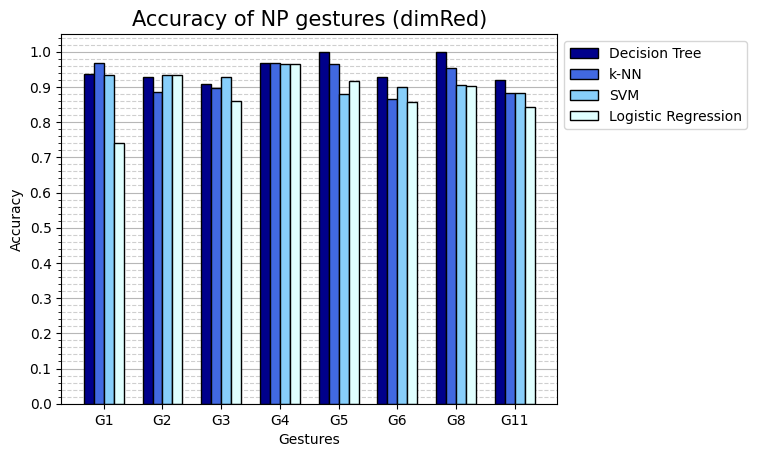

In [226]:
gesture_MI_barplots(NP_best_G_accuracies_lists, Needle_Passing_gestures, "Accuracy of NP gestures (dimRed)")

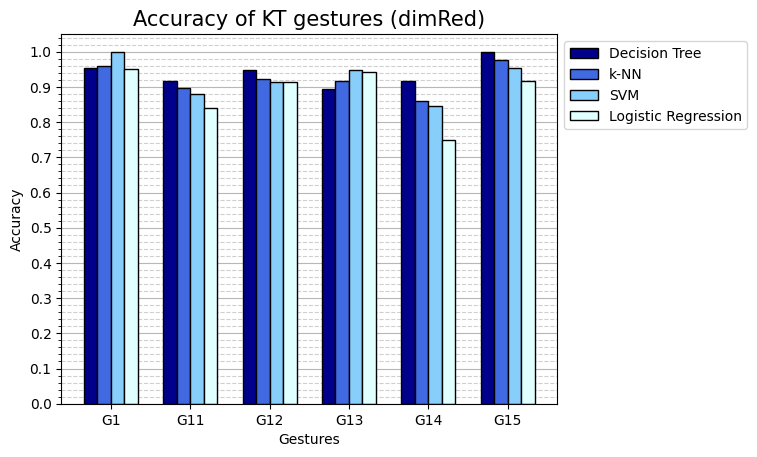

In [227]:
gesture_MI_barplots(KT_best_G_accuracies_lists, Knot_Tying_gestures, "Accuracy of KT gestures (dimRed)")

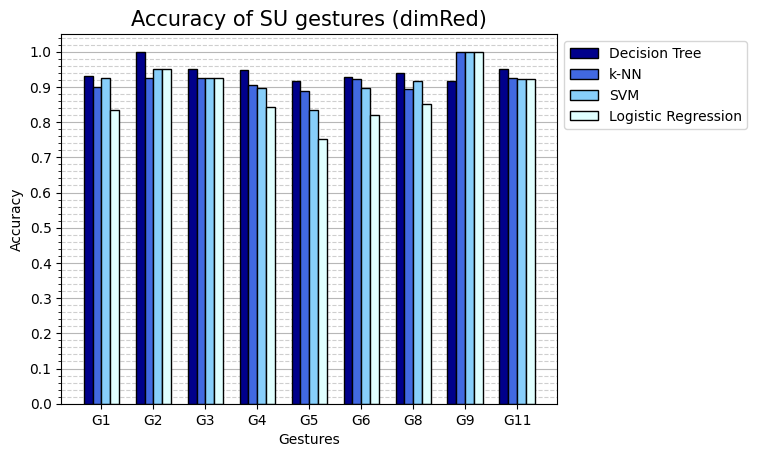

In [228]:
gesture_MI_barplots(SU_best_G_accuracies_lists, Suturing_gestures, "Accuracy of SU gestures (dimRed)")

In [229]:
#rows: DT, k-NN, SVM, LR
#columns: gestures
NP_best_G_standardized_accuracies_lists = [
    [0.9375, 0.928571, 0.907407, 0.96875, 1.0, 0.928571, 1.0, 0.92],
    [0.96875, 0.9, 0.87037, 0.96875, 0.964286, 0.866667, 0.958333, 0.916667],
    [0.966667, 0.964286, 0.892857, 0.964286, 0.958333, 1.0, 0.952381, 0.891667],
    [0.770833, 0.935185, 0.857143, 1.0, 0.92, 0.821429, 0.904762, 0.842593]
]

KT_best_G_standardized_accuracies_lists = [
    [0.952381, 0.916667, 0.947917, 0.89375, 0.916667, 1.0],
    [0.958333, 0.901515, 0.909091, 0.941176, 0.875, 0.977778],
    [0.952381, 0.933333, 0.916667, 0.972222, 0.833333, 1.0],
    [0.95, 0.85, 0.857843, 0.948718, 0.777778, 0.916667]
]

SU_best_G_standardized_accuracies_lists = [
    [0.931034, 1.0, 0.95, 0.948718, 0.916667, 0.927778, 0.939394, 0.916667, 0.95],
    [0.896296, 0.946429, 0.952381, 0.95, 0.861111, 0.9, 0.925, 1.0, 0.927778],
    [0.90625, 0.974359, 0.955556, 0.972222, 0.861111, 0.897436, 0.891667, 1.0, 0.925],
    [0.825893, 0.95, 0.95, 0.872222, 0.753571, 0.820513, 0.852381, 1.0, 0.923077]
]

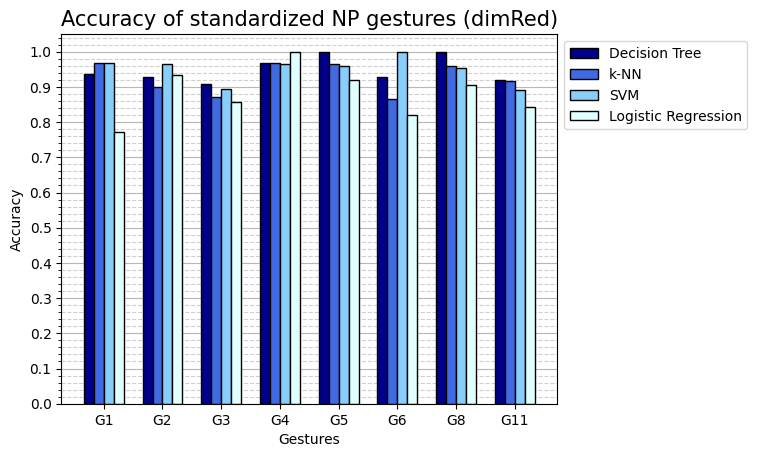

In [230]:
gesture_MI_barplots(NP_best_G_standardized_accuracies_lists, Needle_Passing_gestures, "Accuracy of standardized NP gestures (dimRed)")

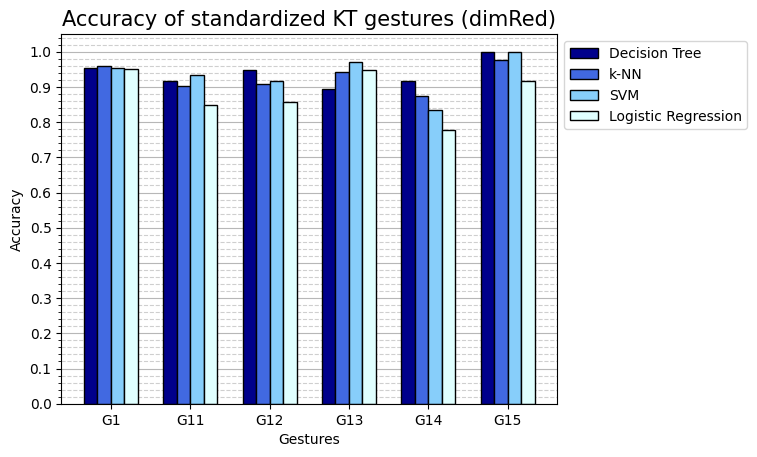

In [231]:
gesture_MI_barplots(KT_best_G_standardized_accuracies_lists, Knot_Tying_gestures, "Accuracy of standardized KT gestures (dimRed)")

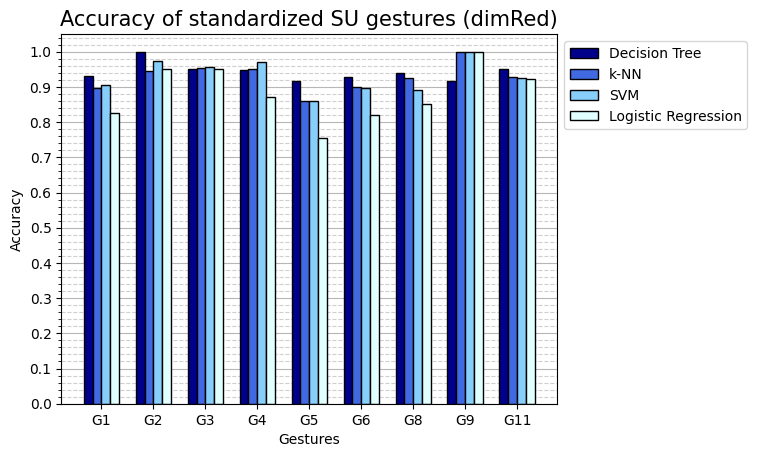

In [232]:
gesture_MI_barplots(SU_best_G_standardized_accuracies_lists, Suturing_gestures, "Accuracy of standardized SU gestures (dimRed)")

In [ ]:
#################################################### Time series classification ###################################################

In [233]:
NP_df_list[0]

,Left_MTM_pos_x,Left_MTM_pos_y,Left_MTM_pos_z,Left_MTM_rotM_1,Left_MTM_rotM_2,Left_MTM_rotM_3,Left_MTM_rotM_4,Left_MTM_rotM_5,Left_MTM_rotM_6,Left_MTM_rotM_7,...,PSM2_rotM_7,PSM2_rotM_8,PSM2_rotM_9,PSM2_linV_x,PSM2_linV_y,PSM2_linV_z,PSM2_rotV_alpha,PSM2_rotV_beta,PSM2_rotV_gamma,PSM2_gripper_angleV
0,0.118529,-0.015860,0.367277,0.482652,-0.326916,-0.812538,0.642312,0.762788,0.074571,0.594823,...,-0.583559,0.578939,0.569462,-0.013975,-0.002687,0.006508,-0.021289,-0.230186,0.452584,-1.198475
1,0.117837,-0.016283,0.367878,0.470070,-0.331100,-0.818200,0.649242,0.757665,0.066332,0.597381,...,-0.585849,0.583027,0.562902,-0.006929,-0.003082,0.006237,-0.019702,-0.142757,0.343896,-1.202884
2,0.117591,-0.016579,0.368282,0.464992,-0.333945,-0.819944,0.652489,0.755208,0.062384,0.597824,...,-0.586203,0.584588,0.560911,-0.007013,-0.007571,0.011385,-0.058685,-0.138019,0.321906,-1.201741
3,0.117164,-0.017204,0.369130,0.457999,-0.337982,-0.822223,0.657503,0.751245,0.057376,0.597736,...,-0.586036,0.587470,0.558068,-0.000156,-0.008891,0.010383,-0.064197,-0.068266,0.171226,-1.198312
4,0.116830,-0.017850,0.369779,0.457318,-0.342555,-0.820707,0.656666,0.752381,0.051810,0.599175,...,-0.587479,0.583116,0.561108,-0.000627,-0.011057,0.008655,-0.058588,0.077483,-0.011222,-1.195536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3433,0.142431,-0.019635,0.426738,0.857629,-0.247396,-0.450902,0.299046,0.953128,0.045724,0.417392,...,-0.417144,0.192595,0.888198,-0.000274,-0.002466,-0.001380,-2.250799,1.036829,4.962650,-0.540414
3434,0.142378,-0.019676,0.426621,0.861480,-0.264215,-0.433691,0.312973,0.948748,0.043565,0.398884,...,-0.397702,0.195262,0.896495,-0.000363,0.001951,-0.006721,0.063972,0.508576,-0.221638,-0.391330
3435,0.142191,-0.019512,0.425955,0.863868,-0.297715,-0.406378,0.342397,0.938687,0.040040,0.368470,...,-0.365923,0.194084,0.910181,-0.000650,-0.000191,-0.007957,0.166514,0.675894,-0.078584,-0.081241
3436,0.142137,-0.019330,0.425178,0.871721,-0.299333,-0.388004,0.338906,0.940116,0.036006,0.352910,...,-0.350691,0.183105,0.918415,-0.000539,0.005146,-0.012726,0.200262,0.397835,-0.071289,0.174962


In [234]:
def TS_df_append_to_max_len(df_list):
    #Creating a new DataFrame to avoid overwriting the original one
    df_list_max_len = df_list.copy()
    
    max_len = 0
    
    for i in range(len(df_list_max_len)):
        if(max_len < len(df_list_max_len[i])):
            max_len = len(df_list_max_len[i])
            
    print("The maximum length: " + str(max_len))
    
    #shape[1]: number of columns
    #Row containing 76 zeros
    row = [0] * df_list_max_len[0].shape[1]
    series = pd.Series(row, index = header)
    
    for j in range(len(df_list_max_len)):
        if(max_len > len(df_list_max_len[j])):
            while(max_len > len(df_list_max_len[j])):
                df_list_max_len[j] = df_list_max_len[j].append(series, ignore_index=True)
    
    return df_list_max_len

In [235]:
def TS_df_append_truncate_to_avg_len(df_list):
    df_list_avg_len = df_list.copy()
    
    lengths = []
    for i in range(len(df_list_avg_len)):
        lengths.append(len(df_list_avg_len[i]))
        
    avg_len = round(sum(lengths)/len(lengths))
    print("The average length: " + str(avg_len))
    
    row = [0] * df_list_avg_len[0].shape[1]
    series = pd.Series(row, index = header)
    
    for j in range(len(df_list_avg_len)):
        if(avg_len > len(df_list_avg_len[j])):
            while(avg_len > len(df_list_avg_len[j])):
                df_list_avg_len[j] = df_list_avg_len[j].append(series, ignore_index=True)
        else:
            #-1: DataFrame indexed from 0
            df_list_avg_len[j] = df_list_avg_len[j].truncate(after = avg_len - 1)
    
    return df_list_avg_len

In [236]:
import sys

In [237]:
def TS_df_truncate_to_min_len(df_list):
    df_list_min_len = df_list.copy()
        
    min_len = sys.maxsize
    
    for i in range(len(df_list_min_len)):
        if(min_len > len(df_list_min_len[i])):
            min_len = len(df_list_min_len[i])
    
    print("The minimum length: " + str(min_len))
    
    for j in range(len(df_list_min_len)):
        if(min_len < len(df_list_min_len[j])):
            df_list_min_len[j] = df_list_min_len[j].truncate(after = min_len - 1)
            
    return df_list_min_len

In [238]:
TS_NP_df_list_max_len = TS_df_append_to_max_len(NP_df_list)
TS_KT_df_list_max_len = TS_df_append_to_max_len(KT_df_list)
TS_SU_df_list_max_len = TS_df_append_to_max_len(SU_df_list)

The maximum length: 4761
The maximum length: 3853
The maximum length: 9012


In [239]:
#NP: index of the maximum length: 25
TS_NP_df_list_max_len[0]

,Left_MTM_pos_x,Left_MTM_pos_y,Left_MTM_pos_z,Left_MTM_rotM_1,Left_MTM_rotM_2,Left_MTM_rotM_3,Left_MTM_rotM_4,Left_MTM_rotM_5,Left_MTM_rotM_6,Left_MTM_rotM_7,...,PSM2_rotM_7,PSM2_rotM_8,PSM2_rotM_9,PSM2_linV_x,PSM2_linV_y,PSM2_linV_z,PSM2_rotV_alpha,PSM2_rotV_beta,PSM2_rotV_gamma,PSM2_gripper_angleV
0,0.118529,-0.015860,0.367277,0.482652,-0.326916,-0.812538,0.642312,0.762788,0.074571,0.594823,...,-0.583559,0.578939,0.569462,-0.013975,-0.002687,0.006508,-0.021289,-0.230186,0.452584,-1.198475
1,0.117837,-0.016283,0.367878,0.470070,-0.331100,-0.818200,0.649242,0.757665,0.066332,0.597381,...,-0.585849,0.583027,0.562902,-0.006929,-0.003082,0.006237,-0.019702,-0.142757,0.343896,-1.202884
2,0.117591,-0.016579,0.368282,0.464992,-0.333945,-0.819944,0.652489,0.755208,0.062384,0.597824,...,-0.586203,0.584588,0.560911,-0.007013,-0.007571,0.011385,-0.058685,-0.138019,0.321906,-1.201741
3,0.117164,-0.017204,0.369130,0.457999,-0.337982,-0.822223,0.657503,0.751245,0.057376,0.597736,...,-0.586036,0.587470,0.558068,-0.000156,-0.008891,0.010383,-0.064197,-0.068266,0.171226,-1.198312
4,0.116830,-0.017850,0.369779,0.457318,-0.342555,-0.820707,0.656666,0.752381,0.051810,0.599175,...,-0.587479,0.583116,0.561108,-0.000627,-0.011057,0.008655,-0.058588,0.077483,-0.011222,-1.195536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4756,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4757,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4758,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4759,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [240]:
TS_NP_df_list_avg_len = TS_df_append_truncate_to_avg_len(NP_df_list)
TS_KT_df_list_avg_len = TS_df_append_truncate_to_avg_len(KT_df_list)
TS_SU_df_list_avg_len = TS_df_append_truncate_to_avg_len(SU_df_list)

The average length: 3245
The average length: 1725
The average length: 3369


In [241]:
TS_NP_df_list_avg_len[0]

,Left_MTM_pos_x,Left_MTM_pos_y,Left_MTM_pos_z,Left_MTM_rotM_1,Left_MTM_rotM_2,Left_MTM_rotM_3,Left_MTM_rotM_4,Left_MTM_rotM_5,Left_MTM_rotM_6,Left_MTM_rotM_7,...,PSM2_rotM_7,PSM2_rotM_8,PSM2_rotM_9,PSM2_linV_x,PSM2_linV_y,PSM2_linV_z,PSM2_rotV_alpha,PSM2_rotV_beta,PSM2_rotV_gamma,PSM2_gripper_angleV
0,0.118529,-0.015860,0.367277,0.482652,-0.326916,-0.812538,0.642312,0.762788,0.074571,0.594823,...,-0.583559,0.578939,0.569462,-0.013975,-0.002687,0.006508,-0.021289,-0.230186,0.452584,-1.198475
1,0.117837,-0.016283,0.367878,0.470070,-0.331100,-0.818200,0.649242,0.757665,0.066332,0.597381,...,-0.585849,0.583027,0.562902,-0.006929,-0.003082,0.006237,-0.019702,-0.142757,0.343896,-1.202884
2,0.117591,-0.016579,0.368282,0.464992,-0.333945,-0.819944,0.652489,0.755208,0.062384,0.597824,...,-0.586203,0.584588,0.560911,-0.007013,-0.007571,0.011385,-0.058685,-0.138019,0.321906,-1.201741
3,0.117164,-0.017204,0.369130,0.457999,-0.337982,-0.822223,0.657503,0.751245,0.057376,0.597736,...,-0.586036,0.587470,0.558068,-0.000156,-0.008891,0.010383,-0.064197,-0.068266,0.171226,-1.198312
4,0.116830,-0.017850,0.369779,0.457318,-0.342555,-0.820707,0.656666,0.752381,0.051810,0.599175,...,-0.587479,0.583116,0.561108,-0.000627,-0.011057,0.008655,-0.058588,0.077483,-0.011222,-1.195536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3240,0.135861,-0.013896,0.421095,0.841470,-0.210321,-0.497734,0.277881,0.958420,0.064692,0.462389,...,-0.459582,0.214740,0.861783,-0.000005,-0.000030,-0.000018,-0.000015,0.000042,0.000092,-1.105073
3241,0.135941,-0.013889,0.421097,0.841175,-0.210886,-0.497993,0.278407,0.958291,0.064349,0.462608,...,-0.459809,0.214771,0.861654,0.000001,0.000006,0.000001,-0.000023,0.000007,0.000053,-1.103603
3242,0.136002,-0.013880,0.421101,0.840045,-0.209809,-0.500349,0.278396,0.958216,0.065494,0.464660,...,-0.461991,0.216494,0.860054,0.000057,0.000367,0.000211,0.008404,0.016054,0.001802,-1.103440
3243,0.135995,-0.013864,0.421110,0.840039,-0.209826,-0.500353,0.278411,0.958212,0.065483,0.464663,...,-0.461832,0.216336,0.860179,0.000040,0.000262,0.000151,0.000188,0.000545,0.000218,-1.103603


In [242]:
TS_NP_df_list_min_len = TS_df_truncate_to_min_len(NP_df_list)
TS_KT_df_list_min_len = TS_df_truncate_to_min_len(KT_df_list)
TS_SU_df_list_min_len = TS_df_truncate_to_min_len(SU_df_list)

The minimum length: 1787
The minimum length: 920
The minimum length: 1779


In [243]:
#NP: minimum hossz indexe: 20
TS_NP_df_list_min_len[0]

,Left_MTM_pos_x,Left_MTM_pos_y,Left_MTM_pos_z,Left_MTM_rotM_1,Left_MTM_rotM_2,Left_MTM_rotM_3,Left_MTM_rotM_4,Left_MTM_rotM_5,Left_MTM_rotM_6,Left_MTM_rotM_7,...,PSM2_rotM_7,PSM2_rotM_8,PSM2_rotM_9,PSM2_linV_x,PSM2_linV_y,PSM2_linV_z,PSM2_rotV_alpha,PSM2_rotV_beta,PSM2_rotV_gamma,PSM2_gripper_angleV
0,0.118529,-0.015860,0.367277,0.482652,-0.326916,-0.812538,0.642312,0.762788,0.074571,0.594823,...,-0.583559,0.578939,0.569462,-0.013975,-0.002687,0.006508,-0.021289,-0.230186,0.452584,-1.198475
1,0.117837,-0.016283,0.367878,0.470070,-0.331100,-0.818200,0.649242,0.757665,0.066332,0.597381,...,-0.585849,0.583027,0.562902,-0.006929,-0.003082,0.006237,-0.019702,-0.142757,0.343896,-1.202884
2,0.117591,-0.016579,0.368282,0.464992,-0.333945,-0.819944,0.652489,0.755208,0.062384,0.597824,...,-0.586203,0.584588,0.560911,-0.007013,-0.007571,0.011385,-0.058685,-0.138019,0.321906,-1.201741
3,0.117164,-0.017204,0.369130,0.457999,-0.337982,-0.822223,0.657503,0.751245,0.057376,0.597736,...,-0.586036,0.587470,0.558068,-0.000156,-0.008891,0.010383,-0.064197,-0.068266,0.171226,-1.198312
4,0.116830,-0.017850,0.369779,0.457318,-0.342555,-0.820707,0.656666,0.752381,0.051810,0.599175,...,-0.587479,0.583116,0.561108,-0.000627,-0.011057,0.008655,-0.058588,0.077483,-0.011222,-1.195536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1782,0.043665,0.016416,0.343835,0.675191,-0.673479,-0.300978,0.685839,0.422797,0.592317,-0.272497,...,0.284690,0.610141,0.739377,0.000263,0.007723,-0.011261,0.084754,-0.030775,0.034461,0.471498
1783,0.043771,0.016523,0.343137,0.666254,-0.681361,-0.303146,0.691098,0.411283,0.594309,-0.281086,...,0.292138,0.609575,0.736934,-0.001335,0.000736,-0.008763,-1.632478,3.177223,4.251943,0.505952
1784,0.043899,0.016377,0.342734,0.667758,-0.679424,-0.304185,0.689999,0.411490,0.595440,-0.280214,...,0.292424,0.611041,0.735605,-0.002304,-0.001303,-0.010390,0.011727,-0.057290,-0.048266,0.510687
1785,0.044084,0.015875,0.341937,0.669127,-0.677485,-0.305496,0.689118,0.411619,0.596371,-0.279113,...,0.291224,0.613136,0.734338,0.003767,-0.004554,-0.012807,0.050068,-0.103899,0.161996,0.513790


In [244]:
def Standardization(df_list):
    df_list_standardized = df_list.copy()
    
    for i in range(len(df_list_standardized)):
        df_list_standardized_temp = StandardScaler().fit_transform(df_list_standardized[i])
        df_list_standardized[i] = pd.DataFrame(df_list_standardized_temp, columns = header)
    
    return df_list_standardized

In [245]:
NP_standardized_df_list = Standardization(NP_df_list)
KT_standardized_df_list = Standardization(KT_df_list)
SU_standardized_df_list = Standardization(SU_df_list)

In [246]:
TS_NP_standardized_df_list_max_len = TS_df_append_to_max_len(NP_standardized_df_list)
TS_KT_standardized_df_list_max_len = TS_df_append_to_max_len(KT_standardized_df_list)
TS_SU_standardized_df_list_max_len = TS_df_append_to_max_len(SU_standardized_df_list)

The maximum length: 4761
The maximum length: 3853
The maximum length: 9012


In [247]:
TS_NP_standardized_df_list_max_len[0]

,Left_MTM_pos_x,Left_MTM_pos_y,Left_MTM_pos_z,Left_MTM_rotM_1,Left_MTM_rotM_2,Left_MTM_rotM_3,Left_MTM_rotM_4,Left_MTM_rotM_5,Left_MTM_rotM_6,Left_MTM_rotM_7,...,PSM2_rotM_7,PSM2_rotM_8,PSM2_rotM_9,PSM2_linV_x,PSM2_linV_y,PSM2_linV_z,PSM2_rotV_alpha,PSM2_rotV_beta,PSM2_rotV_gamma,PSM2_gripper_angleV
0,1.068651,-1.181813,0.110136,-0.100720,-0.509098,-0.784508,0.767840,0.108530,-1.163793,0.258629,...,-0.241321,0.799981,-0.043501,-1.640338,-0.525910,0.853927,-0.037461,-0.449791,0.631552,-1.024179
1,1.054547,-1.214493,0.137440,-0.148445,-0.518486,-0.811232,0.784071,0.083931,-1.206326,0.265410,...,-0.247337,0.812071,-0.068904,-0.817540,-0.605079,0.816625,-0.035116,-0.294167,0.475422,-1.032588
2,1.049534,-1.237361,0.155795,-0.167707,-0.524870,-0.819464,0.791675,0.072134,-1.226707,0.266585,...,-0.248268,0.816687,-0.076615,-0.827349,-1.504799,1.525219,-0.092725,-0.285733,0.443834,-1.030408
3,1.040831,-1.285646,0.194320,-0.194232,-0.533928,-0.830221,0.803419,0.053105,-1.252561,0.266352,...,-0.247829,0.825210,-0.087624,-0.026621,-1.769364,1.387300,-0.100871,-0.161573,0.227383,-1.023868
4,1.034024,-1.335554,0.223805,-0.196815,-0.544189,-0.823065,0.801458,0.058560,-1.281294,0.270167,...,-0.251620,0.812334,-0.075852,-0.081622,-2.203491,1.149450,-0.092582,0.097861,-0.034701,-1.018574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4756,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4757,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4758,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4759,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [248]:
TS_NP_standardized_df_list_avg_len = TS_df_append_truncate_to_avg_len(NP_standardized_df_list)
TS_KT_standardized_df_list_avg_len = TS_df_append_truncate_to_avg_len(KT_standardized_df_list)
TS_SU_standardized_df_list_avg_len = TS_df_append_truncate_to_avg_len(SU_standardized_df_list)

The average length: 3245
The average length: 1725
The average length: 3369


In [249]:
TS_NP_standardized_df_list_min_len = TS_df_truncate_to_min_len(NP_standardized_df_list)
TS_KT_standardized_df_list_min_len = TS_df_truncate_to_min_len(KT_standardized_df_list)
TS_SU_standardized_df_list_min_len = TS_df_truncate_to_min_len(SU_standardized_df_list)

The minimum length: 1787
The minimum length: 920
The minimum length: 1779


In [250]:
def TS_dataFrame_transform(df_list, col):
    dataFrame = pd.DataFrame(columns = col)
    columns = []
    
    for i in range(len(df_list)):
        for j in range(len(df_list[i].columns)):
            columns.append(df_list[i].iloc[:,j])
            
        series = pd.Series(columns, index = col)
        dataFrame = dataFrame.append(series, ignore_index=True)
        columns.clear()
    
    return dataFrame

In [251]:
TS_NP_X_max_len = TS_dataFrame_transform(TS_NP_df_list_max_len, header)
TS_KT_X_max_len = TS_dataFrame_transform(TS_KT_df_list_max_len, header)
TS_SU_X_max_len = TS_dataFrame_transform(TS_SU_df_list_max_len, header)

In [252]:
TS_NP_standardized_X_max_len = TS_dataFrame_transform(TS_NP_standardized_df_list_max_len, header)
TS_KT_standardized_X_max_len = TS_dataFrame_transform(TS_KT_standardized_df_list_max_len, header)
TS_SU_standardized_X_max_len = TS_dataFrame_transform(TS_SU_standardized_df_list_max_len, header)

In [253]:
TS_NP_X_max_len

,Left_MTM_pos_x,Left_MTM_pos_y,Left_MTM_pos_z,Left_MTM_rotM_1,Left_MTM_rotM_2,Left_MTM_rotM_3,Left_MTM_rotM_4,Left_MTM_rotM_5,Left_MTM_rotM_6,Left_MTM_rotM_7,...,PSM2_rotM_7,PSM2_rotM_8,PSM2_rotM_9,PSM2_linV_x,PSM2_linV_y,PSM2_linV_z,PSM2_rotV_alpha,PSM2_rotV_beta,PSM2_rotV_gamma,PSM2_gripper_angleV
0,0 0.118529 1 0.117837 2 0.11...,0 -0.015860 1 -0.016283 2 -0.01...,0 0.367277 1 0.367878 2 0.36...,0 0.482652 1 0.470070 2 0.46...,0 -0.326916 1 -0.331100 2 -0.33...,0 -0.812538 1 -0.818200 2 -0.81...,0 0.642312 1 0.649242 2 0.65...,0 0.762788 1 0.757665 2 0.75...,0 0.074571 1 0.066332 2 0.06...,0 0.594823 1 0.597381 2 0.59...,...,0 -0.583559 1 -0.585849 2 -0.58...,0 0.578939 1 0.583027 2 0.58...,0 0.569462 1 0.562902 2 0.56...,0 -0.013975 1 -0.006929 2 -0.00...,0 -0.002687 1 -0.003082 2 -0.00...,0 0.006508 1 0.006237 2 0.01...,0 -0.021289 1 -0.019702 2 -0.05...,0 -0.230186 1 -0.142757 2 -0.13...,0 0.452584 1 0.343896 2 0.32...,0 -1.198475 1 -1.202884 2 -1.20...
1,0 0.108726 1 0.108610 2 0.10...,0 -0.013210 1 -0.013279 2 -0.01...,0 0.347003 1 0.346939 2 0.34...,0 0.676080 1 0.677664 2 0.67...,0 -0.023709 1 -0.026529 2 -0.02...,0 -0.736478 1 -0.734924 2 -0.73...,0 0.294977 1 0.299909 2 0.30...,0 0.924610 1 0.922439 2 0.92...,0 0.240949 1 0.243172 2 0.24...,0 0.674406 1 0.670633 2 0.66...,...,0 -0.740894 1 -0.737497 2 -0.73...,0 0.364717 1 0.369954 2 0.37...,0 0.563965 1 0.565004 2 0.56...,0 -0.000369 1 -0.007464 2 -0.00...,0 -0.005527 1 -0.000601 2 0.00...,0 0.004217 1 -0.000729 2 -0.00...,0 -0.034165 1 -0.000833 2 0.00...,0 0.015897 1 0.027741 2 0.01...,0 -0.017410 1 -0.055174 2 -0.02...,0 -0.267556 1 -0.265433 2 -0.26...
2,0 0.135692 1 0.135780 2 0.13...,0 -0.021555 1 -0.021463 2 -0.02...,0 0.419680 1 0.419770 2 0.41...,0 0.646337 1 0.644867 2 0.64...,0 -0.662255 1 -0.663155 2 -0.66...,0 -0.379092 1 -0.380023 2 -0.38...,0 0.754246 1 0.755438 2 0.75...,0 0.629787 1 0.628567 2 0.62...,0 0.185613 1 0.184902 2 0.18...,0 0.115026 1 0.115454 2 0.11...,...,0 -0.235667 1 -0.236089 2 -0.23...,0 0.399842 1 0.400250 2 0.40...,0 0.885768 1 0.885472 2 0.88...,0 0.000250 1 0.000259 2 0.00...,0 0.001613 1 0.001672 2 0.00...,0 0.000981 1 0.001016 2 0.00...,0 0.001482 1 0.009498 2 0.00...,0 -0.009738 1 -0.064638 2 -0.00...,0 0.026541 1 0.187467 2 -0.00...,0 -1.100338 1 -1.099848 2 -1.10...
3,0 0.128358 1 0.128357 2 0.12...,0 -0.017169 1 -0.017212 2 -0.01...,0 0.407721 1 0.407766 2 0.40...,0 0.722859 1 0.722929 2 0.72...,0 -0.396109 1 -0.396076 2 -0.39...,0 -0.566231 1 -0.566166 2 -0.56...,0 0.612172 1 0.612163 2 0.61...,0 0.747181 1 0.747129 2 0.74...,0 0.258722 1 0.258896 2 0.25...,0 0.319701 1 0.319562 2 0.31...,...,0 -0.472348 1 -0.472348 2 -0.47...,0 0.499542 1 0.499542 2 0.49...,0 0.726184 1 0.726184 2 0.72...,0 -0.000174 1 -0.000174 2 -0.00...,0 -0.000993 1 -0.000993 2 -0.00...,0 -0.000635 1 -0.000635 2 -0.00...,0 0.00064 1 0.00064 2 0.0006...,0 -0.000533 1 -0.000533 2 -0.00...,0 0.000731 1 0.000731 2 0.00...,0 -0.325524 1 -0.325524 2 -0.32...
4,0 0.224910 1 0.224899 2 0.22...,0 -0.051508 1 -0.051509 2 -0.05...,0 0.321218 1 0.321218 2 0.32...,0 -0.424744 1 -0.424766 2 -0.42...,0 0.648548 1 0.648544 2 0.64...,0 -0.631682 1 -0.631672 2 -0.63...,0 -0.874280 1 -0.874271 2 -0.87...,0 -0.474947 1 -0.474961 2 -0.47...,0 0.100156 1 0.100170 2 0.10...,0 -0.234539 1 -0.234534 2 -0.23...,...,0 0.241918 1 0.241913 2 0.24...,0 -0.541861 1 -0.541854 2 -0.54...,0 0.804898 1 0.804904 2 0.80...,0 0.000002 1 0.000006 2 0.00...,0 -0.000020 1 -0.000011 2 -0.00...,0 -0.000021 1 -0.000006 2 -0.00...,0 0.000015 1 0.000040 2 0.00...,0 0.000006 1 0.000063 2 0.00...,0 0.000012 1 0.000036 2 0.00...,0 -0.113506 1 -0.113996 2 -0.11...
5,0 0.239650 1 0.239639 2 0.23...,0 -0.055982 1 -0.055990 2 -0.05...,0 0.356119 1 0.356112 2 0.35...,0 -0.676318 1 -0.676243 2 -0.67...,0 0.514062 1 0.514120 2 0.51...,0 -0.527617 1 -0.527657 2 -0.52...,0 -0.642002 1 -0.642066 2 -0.64...,0 -0.762508 1 -0.762460 2 -0.76...,0 0.079921 1 0.079869 2 0.07...,0 -0.360392 1 -0.360420 2 -0.36...

In [254]:
#Checking individual cells of a DataFrame
#There is no difference in the sum of the elements -> therefore, the index is not included
osszeg = 0
for i in TS_NP_X_max_len.iloc[0,0]:
    osszeg = osszeg + i
    
osszeg_original = 0
for j in TS_NP_df_list_max_len[0].iloc[:, 0]:
    osszeg_original = osszeg_original + j

print(osszeg)
print(osszeg_original)

227.23024300000006
227.23024300000006


In [255]:
TS_NP_X_avg_len = TS_dataFrame_transform(TS_NP_df_list_avg_len, header)
TS_KT_X_avg_len = TS_dataFrame_transform(TS_KT_df_list_avg_len, header)
TS_SU_X_avg_len = TS_dataFrame_transform(TS_SU_df_list_avg_len, header)

In [256]:
TS_NP_standardized_X_avg_len = TS_dataFrame_transform(TS_NP_standardized_df_list_avg_len, header)
TS_KT_standardized_X_avg_len = TS_dataFrame_transform(TS_KT_standardized_df_list_avg_len, header)
TS_SU_standardized_X_avg_len = TS_dataFrame_transform(TS_SU_standardized_df_list_avg_len, header)

In [257]:
TS_NP_X_min_len = TS_dataFrame_transform(TS_NP_df_list_min_len, header)
TS_KT_X_min_len = TS_dataFrame_transform(TS_KT_df_list_min_len, header)
TS_SU_X_min_len = TS_dataFrame_transform(TS_SU_df_list_min_len, header)

In [258]:
TS_NP_standardized_X_min_len = TS_dataFrame_transform(TS_NP_standardized_df_list_min_len, header)
TS_KT_standardized_X_min_len = TS_dataFrame_transform(TS_KT_standardized_df_list_min_len, header)
TS_SU_standardized_X_min_len = TS_dataFrame_transform(TS_SU_standardized_df_list_min_len, header)

In [259]:
def TS_Y(df_class):
    return df_class.iloc[:, 2]

In [260]:
TS_NP_Y_max_len = TS_NP_Y_avg_len = TS_NP_Y_min_len = TS_Y(NP_class)
TS_KT_Y_max_len = TS_KT_Y_avg_len = TS_KT_Y_min_len = TS_Y(KT_class)
TS_SU_Y_max_len = TS_SU_Y_avg_len = TS_SU_Y_min_len = TS_Y(SU_class)

In [266]:
def TS_train_test(Y, X):
    index = range(len(X))
    TS_X_train = pd.DataFrame(columns = header)
    TS_X_test = pd.DataFrame(columns = header)
    
    X_train, X_test, Y_train, Y_test = train_test(index, Y, 0.2)
    
    for i in X_train:
        TS_X_train = TS_X_train.append(X.iloc[i, :])
    
    for j in X_test:
        TS_X_test = TS_X_test.append(X.iloc[j, :])
    
    return TS_X_train, TS_X_test, Y_train, Y_test

In [262]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import LeaveOneOut, cross_val_score

In [267]:
TS_NP_X_train_max_len, TS_NP_X_test_max_len, TS_NP_Y_train_max_len, TS_NP_Y_test_max_len \
                                                                            = TS_train_test(TS_NP_Y_max_len, TS_NP_X_max_len)

TS_KT_X_train_max_len, TS_KT_X_test_max_len, TS_KT_Y_train_max_len, TS_KT_Y_test_max_len \
                                                                            = TS_train_test(TS_KT_Y_max_len, TS_KT_X_max_len)

TS_SU_X_train_max_len, TS_SU_X_test_max_len, TS_SU_Y_train_max_len, TS_SU_Y_test_max_len \
                                                                            = TS_train_test(TS_SU_Y_max_len, TS_SU_X_max_len)

In [268]:
TS_NP_X_train_avg_len, TS_NP_X_test_avg_len, TS_NP_Y_train_avg_len, TS_NP_Y_test_avg_len \
                                                                            = TS_train_test(TS_NP_Y_avg_len, TS_NP_X_avg_len)

TS_KT_X_train_avg_len, TS_KT_X_test_avg_len, TS_KT_Y_train_avg_len, TS_KT_Y_test_avg_len \
                                                                            = TS_train_test(TS_KT_Y_avg_len, TS_KT_X_avg_len)

TS_SU_X_train_avg_len, TS_SU_X_test_avg_len, TS_SU_Y_train_avg_len, TS_SU_Y_test_avg_len \
                                                                            = TS_train_test(TS_SU_Y_avg_len, TS_SU_X_avg_len)

In [269]:
TS_NP_X_train_min_len, TS_NP_X_test_min_len, TS_NP_Y_train_min_len, TS_NP_Y_test_min_len \
                                                                            = TS_train_test(TS_NP_Y_min_len, TS_NP_X_min_len)

TS_KT_X_train_min_len, TS_KT_X_test_min_len, TS_KT_Y_train_min_len, TS_KT_Y_test_min_len \
                                                                            = TS_train_test(TS_KT_Y_min_len, TS_KT_X_min_len)

TS_SU_X_train_min_len, TS_SU_X_test_min_len, TS_SU_Y_train_min_len, TS_SU_Y_test_min_len \
                                                                            = TS_train_test(TS_SU_Y_min_len, TS_SU_X_min_len)

In [ ]:
######################################################### DTW #####################################################################

In [ ]:
pip install sktime --user

In [272]:
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier
import matplotlib.pyplot as plt

In [273]:
def DTW(neighbors, weight, TS_X_train, TS_X_test, TS_Y_train, TS_Y_test):
    TS_DTW = KNeighborsTimeSeriesClassifier(n_neighbors = neighbors, weights = weight, distance="dtw")
    TS_DTW.fit(TS_X_train, TS_Y_train)

    TS_y_pred = TS_DTW.predict(TS_X_test)
    TS_holdout_accuracy = metrics.accuracy_score(TS_Y_test, TS_y_pred)
    
    return TS_holdout_accuracy

In [274]:
n_neighbors = 5

In [275]:
TS_NP_DTW_accuracy_min_len = []

for i in np.arange(1, n_neighbors + 1):
    TS_NP_DTW_accuracy_min_len.append(DTW(i, 'uniform', TS_NP_X_train_min_len, TS_NP_X_test_min_len, \
                                                 TS_NP_Y_train_min_len, TS_NP_Y_test_min_len))

In [89]:
TS_NP_DTW_accuracy_avg_len = []

for i in np.arange(1, n_neighbors + 1):
    TS_NP_DTW_accuracy_avg_len.append(DTW(i, 'uniform', TS_NP_X_train_avg_len, TS_NP_X_test_avg_len, \
                                                 TS_NP_Y_train_avg_len, TS_NP_Y_test_avg_len))

In [90]:
TS_NP_DTW_accuracy_max_len = []

for i in np.arange(1, n_neighbors + 1):
    TS_NP_DTW_accuracy_max_len.append(DTW(i, 'uniform', TS_NP_X_train_max_len, TS_NP_X_test_max_len, \
                                                 TS_NP_Y_train_max_len, TS_NP_Y_test_max_len))

In [277]:
#List rows: NP, KT, SU
#Columns: k = 1, 2, 3, 4, 5
TS_DTW_max_accuracy_lists = [
    [0.6666666666666666, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.6666666666666666],
    [0.625, 0.625, 0.625, 0.5, 0.625],
    [0.875, 0.75, 0.625, 0.75, 0.625]
]

TS_DTW_avg_accuracy_lists = [
    [0.6666666666666666, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.6666666666666666],
    [0.75, 0.625, 0.625, 0.5, 0.625],
    [0.875, 0.75, 0.625, 0.75, 0.875]
]

TS_DTW_min_accuracy_lists = [
    [0.6666666666666666, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334, 0.8333333333333334],
    [0.5, 0.5, 0.625, 0.625, 0.625],
    [0.75, 0.75, 0.625, 0.75, 0.75]
]

In [278]:
def TS_DTW_bar(TS_DTW_max_list, TS_DTW_avg_list, TS_DTW_min_list, title):
    
    labels = ['maximum_length', 'average_length', 'minimum_length']
    
    x = np.arange(len(TS_DTW_max_list))
    width = 0.25
    
    plt.grid(which='major', linestyle='-', alpha = 0.9, axis = 'y')
    plt.grid(which='minor', linestyle='--', alpha = 0.6, axis = 'y')
    plt.minorticks_on()
    #minor turn off on x
    plt.tick_params('x', which='minor', bottom=False, top=False)
    
    plt.bar(x - width, TS_DTW_max_list, width, color='green', edgecolor='black', zorder = 2)
    plt.bar(x, TS_DTW_avg_list, width, color='limegreen', edgecolor='black', zorder = 2)
    plt.bar(x + width, TS_DTW_min_list, width, color='lawngreen', edgecolor='black', zorder = 2)

    plt.xticks(x, ['k = 1',  'k = 2', 'k = 3', 'k = 4', 'k = 5'])
    plt.yticks(np.arange(0, 1.1, 0.1))
    plt.title(title, fontsize = 15)
    plt.ylabel('Accuracy')
    plt.xlabel('Neighbors')

    plt.legend(labels, bbox_to_anchor = (1, 1))
    plt.show()

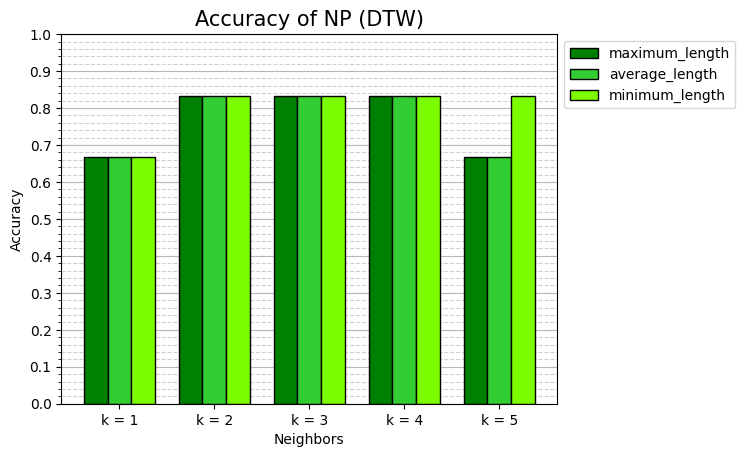

In [282]:
TS_DTW_bar(TS_DTW_max_accuracy_lists[0], TS_DTW_avg_accuracy_lists[0], TS_DTW_min_accuracy_lists[0], 'Accuracy of NP (DTW)')

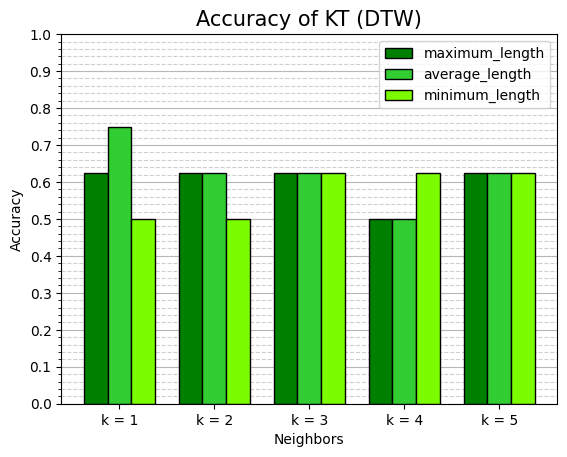

In [283]:
TS_DTW_bar(TS_DTW_max_accuracy_lists[1], TS_DTW_avg_accuracy_lists[1], TS_DTW_min_accuracy_lists[1], 'Accuracy of KT (DTW)')

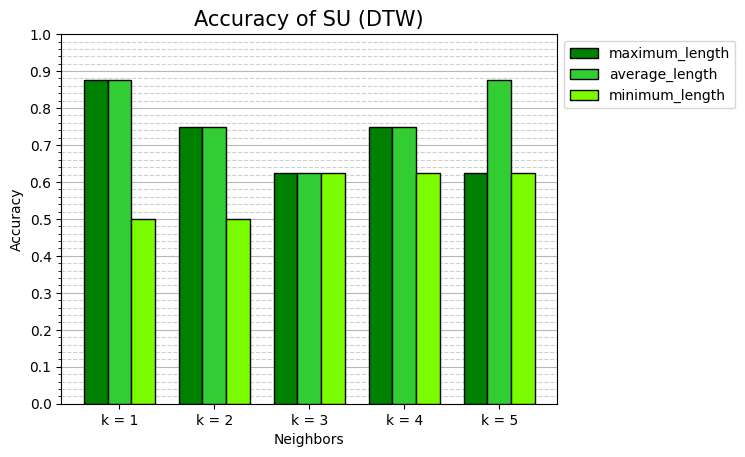

In [284]:
TS_DTW_bar(TS_DTW_max_accuracy_lists[2], TS_DTW_avg_accuracy_lists[2], TS_DTW_min_accuracy_lists[1], 'Accuracy of SU (DTW)')

In [285]:
def DTW_set_model_param(Y, cv):
    if(isinstance(cv, int)):
        if(cv_exeption_handling(cv, Y) != "Ok"):
            return None
        
        length = len(Y)
        max_neighbors_temp = length / cv
    
        if((max_neighbors_temp - int(max_neighbors_temp)) == 0.0):
            max_neighbors = int(length - max_neighbors_temp)
        else:
            max_neighbors = length - (int(max_neighbors_temp) + 1)
            
    else:
        max_neighbors = len(Y) - 1
   
    model = {
        'DTW': {
            'model': KNeighborsTimeSeriesClassifier(distance="dtw"),
            'params': {
                'n_neighbors' : range(1, max_neighbors + 1),
                'weights' : ['uniform', 'distance']
                      }
               }
           }
    
    return model

In [286]:
def TS_gridSearch(printMessage, X, Y, cv):
    model = DTW_set_model_param(Y, cv)

    if model != None:
        TS_df = gridSearch(model, X, Y, cv)

        if(isinstance(printMessage, str) and printMessage != ""):
            print(printMessage)

        with option_context('display.max_colwidth', 200):
            display(TS_df)
    else:
        TS_df = None
        
    return TS_df

In [117]:
TS_DTW_NP_min_len = TS_gridSearch('Best accuracy for NP min_len:', TS_NP_X_min_len, TS_NP_Y_min_len, 2)

Best accuracy for NP min_len:


,model,best_accuracy,best_params,cv
0,DTW,0.785714,"{'n_neighbors': 5, 'weights': 'uniform'}",2


In [150]:
model_4 = KNeighborsTimeSeriesClassifier(distance="dtw", n_neighbors = 3, weights = "distance")

kf_score = cross_val_score(model_4, TS_SU_X_max_len, TS_SU_Y_max_len, cv = 4, n_jobs = -1)
kf_score_mean = kf_score.mean()
kf_score_mean

0.7944444444444444

In [287]:
#Boxplots
def TS_DTW_best_boxplots(lists, title, c):
    plt.grid(which='major', linestyle='-', alpha = 0.7, axis = 'y')
    plt.grid(which='minor', linestyle='--', alpha = 0.4, axis = 'y')
    plt.minorticks_on()
    #minor turn off on x
    plt.tick_params('x', which='minor', bottom=False, top=False)
    
    plt.boxplot(lists, patch_artist=True, boxprops=dict(facecolor='#E4E4E6'), medianprops=dict(color=c))
    plt.xticks([1, 2, 3], ['Minimum', 'Average', 'Maximum'])
    plt.ylabel('Accuracy')
    plt.xlabel('Methods')
    plt.ylim(0.6, 1.0)
    plt.title(title, fontsize = 14)
    
    plt.show()

In [288]:
#List rows: min, avg, max
TS_DTW_NP_best_accuracies_lists = [
    [0.785714, 0.788889, 0.785714, 0.786667, 0.766667, 0.821429, 0.8125, 0.824074],
    [0.821429, 0.788889, 0.75, 0.746667, 0.741667, 0.75, 0.75, 0.768519],
    [0.75, 0.822222, 0.785714, 0.786667, 0.741667, 0.785714, 0.760417, 0.787037]
]

TS_DTW_KT_best_accuracies_lists = [
    [0.888889, 0.833333, 0.861111, 0.828571, 0.861111, 0.857143, 0.825, 0.861111, 0.858333, 0.878788, 0.833333, 0.820513, 0.833333, 0.844444, 0.84375, 0.852941],
    [0.833333, 0.833333, 0.833333, 0.828571, 0.861111, 0.857143, 0.825, 0.861111, 0.858333, 0.856061, 0.833333, 0.858974, 0.845238, 0.855556, 0.864583, 0.852941],
    [0.833333, 0.833333, 0.833333, 0.828571, 0.833333, 0.828571, 0.825, 0.833333, 0.816667, 0.833333, 0.833333, 0.858974, 0.845238, 0.855556, 0.864583, 0.852941]
]

TS_DTW_SU_best_accuracies_lists = [
    [0.718421, 0.717949, 0.794444, 0.746429, 0.793651, 0.761905, 0.76875, 0.844444, 0.766667, 0.810606],
    [0.744737, 0.717949, 0.769444, 0.796429, 0.769841, 0.766667, 0.76875, 0.805556, 0.816667, 0.818182],
    [0.769737, 0.717949, 0.794444, 0.767857, 0.769841, 0.785714, 0.79375, 0.833333, 0.791667, 0.848485]
]

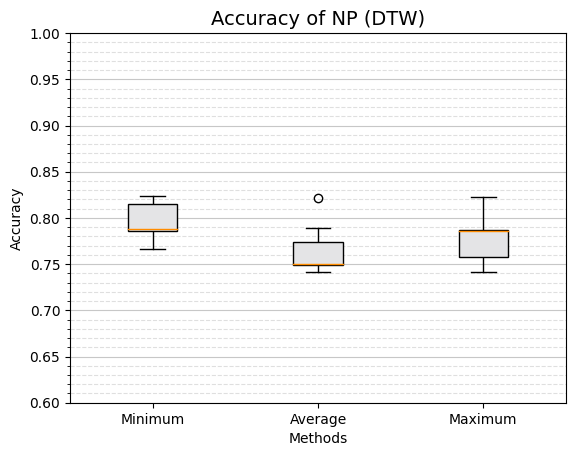

In [289]:
TS_DTW_best_boxplots(TS_DTW_NP_best_accuracies_lists, 'Accuracy of NP (DTW)', 'darkorange')

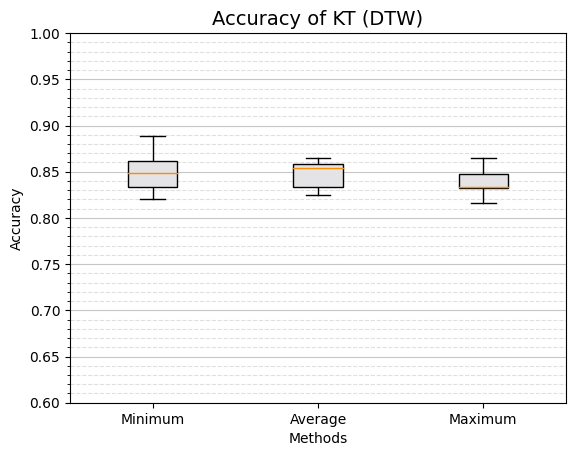

In [290]:
TS_DTW_best_boxplots(TS_DTW_KT_best_accuracies_lists, 'Accuracy of KT (DTW)', 'darkorange')

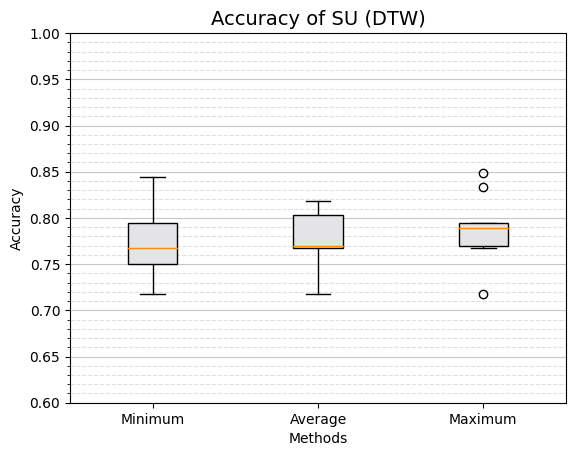

In [291]:
TS_DTW_best_boxplots(TS_DTW_SU_best_accuracies_lists, 'Accuracy of SU (DTW)', 'darkorange')

In [ ]:
################################################## Neural Network #################################################################

In [293]:
%set_env TF_ENABLE_ONEDNN_OPTS=0

env: TF_ENABLE_ONEDNN_OPTS=0


In [294]:
from tensorflow import keras

In [296]:
keras.__version__

'2.9.0'

In [297]:
def TS_NN_transform(df_list, Y):
    num_df = len(df_list) 
    num_rows = len(df_list[0])
    num_columns = len(df_list[0].columns)
    print('Shape: (' + str(num_df) + ', ' + str(num_rows) + ', ' + str(num_columns) + ')')

    df_array = np.array(df_list)
    df_reshaped_array = np.reshape(df_array, (num_df, num_rows, num_columns))
    
    Y_temp = np.array(list(Y))
    
    return df_reshaped_array, Y_temp

In [298]:
TS_NN_NP_X_min_len, TS_NN_NP_Y_min_len = TS_NN_transform(TS_NP_df_list_min_len, TS_NP_Y_min_len)

Shape: (28, 1787, 76)


In [299]:
TS_NN_NP_X_avg_len, TS_NN_NP_Y_avg_len = TS_NN_transform(TS_NP_df_list_avg_len, TS_NP_Y_avg_len)

Shape: (28, 3245, 76)


In [300]:
TS_NN_KT_X_min_len, TS_NN_KT_Y_min_len = TS_NN_transform(TS_KT_df_list_min_len, TS_KT_Y_min_len)

Shape: (36, 920, 76)


In [301]:
TS_NN_KT_X_avg_len, TS_NN_KT_Y_avg_len = TS_NN_transform(TS_KT_df_list_avg_len, TS_KT_Y_avg_len)

Shape: (36, 1725, 76)


In [302]:
TS_NN_SU_X_min_len, TS_NN_SU_Y_min_len = TS_NN_transform(TS_SU_df_list_min_len, TS_SU_Y_min_len)

Shape: (39, 1779, 76)


In [303]:
TS_NN_SU_X_avg_len, TS_NN_SU_Y_avg_len = TS_NN_transform(TS_SU_df_list_avg_len, TS_SU_Y_avg_len)

Shape: (39, 3369, 76)


In [304]:
num_classes = len(np.unique(TS_NN_NP_Y_min_len))
num_classes

2

In [305]:
def TS_NN_make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same", activation="elu")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same", activation="elu")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same", activation="elu")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)

In [306]:
def TS_NN_model(X, Y): 
    epochs = 1000
    batch_size = 32

    for i in range(len(X)):
        X_train_temp = X
        Y_train_temp = Y
        
        X_train_temp = np.delete(X_train_temp, i, 0)
        Y_train_temp = np.delete(Y_train_temp, i, 0)
        
        NN_model = TS_NN_make_model(input_shape = X_train_temp.shape[1:])
        
        callbacks = [
            keras.callbacks.ModelCheckpoint(
                "NN/1/" + str(i) + ".h5", save_best_only=True, monitor="val_loss"
            ),
            keras.callbacks.ReduceLROnPlateau(
                monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
            ),
            keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
        ]
        
        NN_model.compile(
            optimizer="adam",
            loss="sparse_categorical_crossentropy",
            metrics=["sparse_categorical_accuracy"],
        )

        NN_model.fit(
            X_train_temp,
            Y_train_temp,
            batch_size = batch_size,
            epochs = epochs,
            callbacks = callbacks,
            validation_split = 0.2,
            verbose = 0,
        )

In [249]:
TS_NN_model(TS_NN_NP_X_avg_len, TS_NN_NP_Y_avg_len)

Epoch 61: early stopping
Epoch 73: early stopping
Epoch 104: early stopping
Epoch 60: early stopping
Epoch 62: early stopping
Epoch 63: early stopping
Epoch 58: early stopping
Epoch 60: early stopping
Epoch 92: early stopping
Epoch 140: early stopping
Epoch 66: early stopping
Epoch 56: early stopping
Epoch 65: early stopping
Epoch 61: early stopping
Epoch 73: early stopping
Epoch 137: early stopping
Epoch 136: early stopping
Epoch 151: early stopping
Epoch 80: early stopping
Epoch 56: early stopping
Epoch 58: early stopping
Epoch 52: early stopping
Epoch 51: early stopping
Epoch 51: early stopping
Epoch 52: early stopping
Epoch 53: early stopping
Epoch 52: early stopping
Epoch 52: early stopping


In [307]:
def TS_NN_evaluate(X, Y):
    final_avg_list = []
    final_avg = 0
    
    for name_index in range(1, 6):
        file_names = []
        
        for i in range(0, len(X)):
            file_names.append("NN/" + str(name_index) + "/" + str(i) + ".h5")

        index = 0
        test_loss_list = []
        test_acc_list = []

        while(index <= len(X) - 1):
            model = keras.models.load_model(file_names[index])

            Y_test_temp = np.array(Y[index : index + 1])
            X_test_temp = np.array(X[index : index + 1])

            test_loss_temp, test_acc_temp = model.evaluate(X_test_temp, Y_test_temp)

            test_loss_list.append(test_loss_temp)
            test_acc_list.append(test_acc_temp)

            index = index + 1
        
        avg = 0
        for acc in test_acc_list:
            avg = avg + acc
            
        avg = avg / len(test_acc_list)
        final_avg_list.append(avg)
        print('Done: ' + str(name_index))
        
        
    for average in final_avg_list:
        final_avg = final_avg + average
        
    final_avg = final_avg / len(final_avg_list)
    
    return final_avg

In [251]:
TS_NN_NP_min_len_score

0.6214285714285714

In [250]:
TS_NN_NP_min_len_score = TS_NN_evaluate(TS_NN_NP_X_avg_len, TS_NN_NP_Y_avg_len)

1/1 [==============================] - 0s 239ms/step - loss: 0.5541 - sparse_categorical_accuracy: 1.0000
Done: 1
1/1 [==============================] - 0s 183ms/step - loss: 0.6280 - sparse_categorical_accuracy: 1.0000
Done: 2
1/1 [==============================] - 0s 200ms/step - loss: 0.8444 - sparse_categorical_accuracy: 0.0000e+00
Done: 3
1/1 [==============================] - 0s 188ms/step - loss: 0.9443 - sparse_categorical_accuracy: 0.0000e+00
Done: 4
1/1 [==============================] - 0s 217ms/step - loss: 0.6865 - sparse_categorical_accuracy: 1.0000
Done: 5
